# Advanced Data Analytics for Management Support


# Summer Semester 2021


# by Maximilian Suliga,
# Student-ID: 616520
# Mail: suligama@hu-berlin.de

All required data and predictions can be found at: https://drive.google.com/drive/folders/1UZbh9g6aBK23zjzQuhrSwcM4y_yjRIif?usp=sharing

In [1]:
#comment in if installation needed

#!pip install --upgrade pip 
#!pip install opencv-python 
#!pip install deep-translator 
#!pip install num2word 
#!pip install autocorrect 
#!pip install langid 
#!pip install wordcloud 
#!pip install keras 
#!pip install tensorflow 
#!pip install transformers 
#!pip install torch 
#!pip install xgboost 
#!pip install keras_tuner 

In [1]:
#import all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from datetime import datetime
import itertools
import urllib.request
import cv2
import pickle
from deep_translator import GoogleTranslator
from deep_translator import batch_detection
import num2word
import re
import string
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from tqdm import tqdm
import langid
from autocorrect import Speller
import nltk
from nltk.probability import FreqDist
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import torch
import tensorflow as tf
from transformers import DistilBertModel
from transformers import AutoTokenizer
from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
import keras
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense
from xgboost import XGBRegressor
import keras_tuner
from keras_tuner.tuners import RandomSearch
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFECV

In [2]:
tqdm.pandas()
pd.set_option('display.max_columns', None)

# Introduction


With its disprutive new business model, AirBnB has changed the accomodations industry globally. As in many other industries, AirBnB offers a platform where supply meets demand with the key concept of private individuals taking the role of the supplier as well. Corporate suppliers for accomodations of any kind of length have found this new channel for themselves too, making AirBnB a major channel for short- to mid-term stays.

In this assignment, the prices of AirBnBs located in London are supposed to be predicted. This will be done with a dataset from real-world listings scraped directly from the AirBnB website. Although being structured in different sections, certain parts overlap as the coding did not allow a waterfall-like procedure. For example, Exploratory Data Analysis is mainly done in the section of the same name, however some variables and their meaning can only be analyzed if they have been generated, which in turn requires a minimum of EDA in order to understand the variables at hand.

In [3]:
train = pd.read_csv(r"C:\Users\Max\Documents\Master\Advanced Data Analytics for Management Support\Assignment/train.csv",
                index_col = "listing_id")
test = pd.read_csv(r"C:\Users\Max\Documents\Master\Advanced Data Analytics for Management Support\Assignment/test.csv",
                index_col = "listing_id")



# Exploratory Data Analysis

I will focus my presentation mainly on the train dataset, as I have not found any real deviations from the train set and also because the train set is bigger and more informative as it contains the target variable `price`. The datasets contain quite many variables, their names mostly explain what they are about. The first few variables look unstandardized, it seems like the host wrote them herself rather than selecting predefined categories of this variable. `picture_url` contains the url of the listing's picture. From there follows typical tabular data, where only `amenities` is outstanding, as its values seem to be a list. `host_is_superhost`, `host_has_profile_pic` and `host_identity_verified` seem to have only values t and f, probably standing for true and false. The dataset ends with different kinds of reviews.

Personally, I found all variable names self-explanatory, besides `experiences_offered`. According to AirBnB (2021), hosts that are on site can offer their guests different kinds of experiences on top of their hosting, as for example showing the city etc. 

Looking a bit closer, one can see that `review_scores_rating` is not an average of the other reviews and further has different values than the other reviews. Although not an official source, BnB Facts (2020) states that guests are asked to give a rating for each category  and give an overall rating on top, the last rating being `review_scores_rating`.


In [4]:
train.head()

name  \
listing_id                                                      
9Q1RD6H7IO                   Attic Room in historic Greenwich   
6XDPZPGLSR                Lovely Garden Studio Private Access   
SND9OPN6IY  Comfi apartment 2 close to wimbledon tennis court   
SE3B7BXN9G           Luxury room in the heart of London - SW4   
E0C82VK0VF        Excellent city Apartment with Private Patio   

                                                      summary  \
listing_id                                                      
9Q1RD6H7IO  The room does not have a door but its own disc...   
6XDPZPGLSR  Garden studio with private entrance, 5 minutes...   
SND9OPN6IY                                                NaN   
SE3B7BXN9G  Luxury first floor Victorian split level maiso...   
E0C82VK0VF  NEW luxury apartment, with private outside pat...   

                                                        space  \
listing_id                                                      
9Q1RD6H7IO  Double room available in historic royal Greenw...   
6XDPZPGLSR  Beautiful studio with a king size bed, a sofa ...   
SND9OPN6IY                                                NaN   
SE3B7BXN9G  Your room will be fully furnished, and it will...   
E0C82VK0VF  A modern, well-equipped, cosy apartment close ...   

                                                  description  \
listing_id                                                      
9Q1RD6H7IO  The room does not have a door but its own disc...   
6XDPZPGLSR  Garden studio with private entrance, 5 minutes...   
SND9OPN6IY                                                NaN   
SE3B7BXN9G  Luxury first floor Victorian split level maiso...   
E0C82VK0VF  NEW luxury apartment, with private outside pat...   

           experiences_offered  \
listing_id                       
9Q1RD6H7IO            business   
6XDPZPGLSR                none   
SND9OPN6IY                none   
SE3B7BXN9G                none   
E0C82VK0VF                none   

                                        neighborhood_overview  \
listing_id                                                      
9Q1RD6H7IO                                                NaN   
6XDPZPGLSR  Crouch End is a very hip and friendly neighbou...   
SND9OPN6IY                                                NaN   
SE3B7BXN9G  Gail coffee shop, just round the corner as wel...   
E0C82VK0VF                                                NaN   

                                                      transit  \
listing_id                                                      
9Q1RD6H7IO  Parking is restricted in London. Visitors park...   
6XDPZPGLSR  Walk across the street to the W3 bus stop and ...   
SND9OPN6IY                                                NaN   
SE3B7BXN9G  Happy to advise on things to do in London and ...   
E0C82VK0VF                                                NaN   

                                                  house_rules  \
listing_id                                                      
9Q1RD6H7IO  no shoes on carpets no food in attic room no o...   
6XDPZPGLSR  We'd love it if you would remove your shoes at...   
SND9OPN6IY  1- No party or event allowed. 2-No smoking ins...   
SE3B7BXN9G  - Check-in after 18:30pm and no later than 20:...   
E0C82VK0VF  I am very happy for your visit, but please car...   

                                                  picture_url    host_id  \
listing_id                                                                 
9Q1RD6H7IO  https://a0.muscache.com/im/pictures/20045164/7...    2167992   
6XDPZPGLSR  https://a0.muscache.com/im/pictures/8d1ddcdc-f...   16148175   
SND9OPN6IY  https://a0.muscache.com/im/pictures/e7e4a740-d...  272000199   
SE3B7BXN9G  https://a0.muscache.com/im/pictures/7c2b2fcc-e...    3361233   
E0C82VK0VF  https://a0.muscache.com/im/pictures/ca1494da-f...   94317022   

            host_since  host_response_time host_response_rate  \
listing_id                  

In [6]:
test.head()

name  \
listing_id                                                      
0FEMC4VA5U        Ladbroke Grove Stylish Portobello Apartment   
PQ2BYEO0QR                Contemporary Design in Notting Hill   
3FP6WFHUBN                            En-suite double bedroom   
GG0V2KDG90  Double room with balcony in magnificent penthouse   
TZVVK4YSIO                        The Bockery Suite 2 Chelsea   

                                                      summary  \
listing_id                                                      
0FEMC4VA5U  Large, bright and contemporary flat located in...   
PQ2BYEO0QR  Stylish design on a beautiful tree lined stree...   
3FP6WFHUBN  Quiet en-suite double bedroom in our lovely ho...   
GG0V2KDG90  My place is close to Aldgate . You’ll love my ...   
TZVVK4YSIO  This 26m2 Suite comprises of 1 bedroom and 1 b...   

                                                        space  \
listing_id                                                      
0FEMC4VA5U                                                NaN   
PQ2BYEO0QR  The (Phone number hidden by Airbnb) ) is thoug...   
3FP6WFHUBN                                                NaN   
GG0V2KDG90                                                NaN   
TZVVK4YSIO  Whether it's just for you or your family, whet...   

                                                  description  \
listing_id                                                      
0FEMC4VA5U  Large, bright and contemporary flat located in...   
PQ2BYEO0QR  Stylish design on a beautiful tree lined stree...   
3FP6WFHUBN  Quiet en-suite double bedroom in our lovely ho...   
GG0V2KDG90  My place is close to Aldgate . You’ll love my ...   
TZVVK4YSIO  This 26m2 Suite comprises of 1 bedroom and 1 b...   

           experiences_offered  \
listing_id                       
0FEMC4VA5U                none   
PQ2BYEO0QR                none   
3FP6WFHUBN                none   
GG0V2KDG90                none   
TZVVK4YSIO                none   

                                        neighborhood_overview  \
listing_id                                                      
0FEMC4VA5U                                                NaN   
PQ2BYEO0QR  Notting Hill is a trendy, artistic, bohemian n...   
3FP6WFHUBN                                                NaN   
GG0V2KDG90                                                NaN   
TZVVK4YSIO  When you have had your fill of relaxing in the...   

                                                      transit  \
listing_id                                                      
0FEMC4VA5U                                                NaN   
PQ2BYEO0QR  There are 2 underground stations within walkin...   
3FP6WFHUBN                                                NaN   
GG0V2KDG90                                                NaN   
TZVVK4YSIO  Our visitors often tell us that they had no id...   

                                                  house_rules  \
listing_id                                                      
0FEMC4VA5U                                                NaN   
PQ2BYEO0QR                                                NaN   
3FP6WFHUBN                                                NaN   
GG0V2KDG90                     - No parties, events or guests   
TZVVK4YSIO  What you do in the privacy of your own room is...   

                                                  picture_url   host_id  \
listing_id                                                                
0FEMC4VA5U  https://a0.muscache.com/im/pictures/9e15bc56-a...  28086957   
PQ2BYEO0QR  https://a0.muscache.com/im/pictures/c2ea8799-e...  16965290   
3FP6WFHUBN  https://a0.muscache.com/im/pictures/4b86abd0-0...   4363076   
GG0V2KDG90  https://a0.muscache.com/im/pictures/23ea2939-6...   7603738   
TZVVK4YSIO  https://a0.muscache.com/im/pictures/64910777/2...  26586101   

            host_since  host_response_time host_response_rate  \
listing_id                         

In [7]:
print(train['summary'][10])

Premium modern apartment in heart of clapham. Large double room with your own large bathroom. Underfloor heating throughout.  12mins from central London via clapham north underground and overground stations.


In [8]:
print(train['space'][10])

The bedroom is spacious and the modern flat has a big living room and patio. There is a small sofa in the living room which some people may feel comfortable sleeping on as an additional guest.


In [9]:
print(train['description'][10])

Premium modern apartment in heart of clapham. Large double room with your own large bathroom. Underfloor heating throughout.  12mins from central London via clapham north underground and overground stations. The bedroom is spacious and the modern flat has a big living room and patio. There is a small sofa in the living room which some people may feel comfortable sleeping on as an additional guest. Your own double bedroom and bathroom, the kitchen, and patio. Clapham High Street - many bars and restaurants a stone's throw away. Get into central London in 15mins from the nearby Clapham north underground and overground station.


In [10]:
print(train['neighborhood_overview'][10])

Clapham High Street - many bars and restaurants a stone's throw away.


In [11]:
print(train['transit'][10])

Get into central London in 15mins from the nearby Clapham north underground and overground station.


In [12]:
print(train['house_rules'][8])

Guest should clean their dishes. Guest should clean kitchen after they finish cooking. Guest should clean bathroom/toilet after themselves. Guest should keep their rooms and other common areas clean. Should respect other occupants of the house by keeping the noise level low, particularly at night and early morning.  It's a shared kitchen and keeping the kitchen clean and tidy is important.


Some kind of "sentiment" can already be read out, value giving adjectives like *premium* seem to be used. Missing values seem to occur quite often, as I had to try around different randomly selected rows in order to avoid printing missing cells.

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55284 entries, 9Q1RD6H7IO to BKSRYBXCFL
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         55270 non-null  object 
 1   summary                      52330 non-null  object 
 2   space                        38403 non-null  object 
 3   description                  53558 non-null  object 
 4   experiences_offered          55284 non-null  object 
 5   neighborhood_overview        35778 non-null  object 
 6   transit                      35477 non-null  object 
 7   house_rules                  31906 non-null  object 
 8   picture_url                  55284 non-null  object 
 9   host_id                      55284 non-null  int64  
 10  host_since                   55173 non-null  object 
 11  host_response_time           37482 non-null  object 
 12  host_response_rate           37482 non-null  object 
 13  host_is

In [14]:
train.isnull().sum()

name                              14
summary                         2954
space                          16881
description                     1726
experiences_offered                0
neighborhood_overview          19506
transit                        19807
house_rules                    23378
picture_url                        0
host_id                            0
host_since                       111
host_response_time             17802
host_response_rate             17802
host_is_superhost                111
host_total_listings_count        111
host_has_profile_pic             111
host_identity_verified           111
neighbourhood                    147
neighbourhood_cleansed             0
zipcode                         1272
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         70
bedrooms                          62
b

In [15]:
train.describe(include="all")

name                                            summary  \
count         55270                                              52330   
unique        54042                                              49111   
top     Double room  Featured in The New York Times, The Wall Stree...   
freq             28                                                125   
mean            NaN                                                NaN   
std             NaN                                                NaN   
min             NaN                                                NaN   
25%             NaN                                                NaN   
50%             NaN                                                NaN   
75%             NaN                                                NaN   
max             NaN                                                NaN   

                                                    space  \
count                                               38403   
unique                                              35719   
top     Situated in an excellent central location. Tow...   
freq                                                   20   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                              description experiences_offered  \
count                                               53558               55284   
unique                                              51626                   5   
top     My Luxury Two Bedroom apartment is located min...                none   
freq                                                   17               54222   
mean                                                  NaN                 NaN   
std                                                   NaN                 NaN   
min                                                   NaN                 NaN   
25%                                                   NaN                 NaN   
50%                                                   NaN                 NaN   
75%                                                   NaN                 NaN   
max                                                   NaN                 NaN   

                                    neighborhood_overview  \
count                                               35778   
unique                                              30233   
top     Conveniently located in Maida Vale one of Lond...   
freq                                                   40   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                  transit  \
count                                               35477   
unique                                              31098   
top     Transport links are excellent with convenient ...   
freq                                                   47   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max             

Indeed t and f stands for true and false, as no other options are available for the columns that use these. Notibly, `experiences_offered` has 54222 out of 55284 observations = "none", which may explain why I have not heard of this kind before. Self-written variables seem to be not all unique, it could be that they were copy-pasted by the same host. `host_total_listings_count` has a mean of 20.70, but a median of 2, a strong indication for outliers. `amenities` is standing out once again, giving another reason to expect this variable individually in detail later on.

In [16]:
most_frequent_summary = train.loc[train['summary'].isin(train['summary'].mode())]
most_frequent_summary

name  \
listing_id                                                     
DF23XM87VC              Sonder | Jermyn Street | Playful 1BR   
MPM3T86FP9   Sonder | The Arts Council | Sleek 3BR + Terrace   
W5XF3SVBFI             Sonder | The Arts Council | Sunny 2BR   
JEEAF6VAFI          Sonder | Drum Court | Posh 2BR + Balcony   
CWBABZBNQU           Sonder | The Arts Council | Calming 1BR   
...                                                      ...   
H68MYHTXQZ  Sonder | Sloane Square | Luxurious 3BR + Terrace   
6FQ2JWVA6N    Sonder | Maughan Library Apartments | Glam 3BR   
1T1U8786X8    Sonder | Maughan Library Apartments | Bold 2BR   
J4V3HJBNJM  Sonder | Maughan Library Apartments | Bright 2BR   
79KEV01QS6         Sonder | St. John's Garden | Ideal Studio   

                                                      summary  \
listing_id                                                      
DF23XM87VC  Featured in The New York Times, The Wall Stree...   
MPM3T86FP9  Featured in The New York Times, The Wall Stree...   
W5XF3SVBFI  Featured in The New York Times, The Wall Stree...   
JEEAF6VAFI  Featured in The New York Times, The Wall Stree...   
CWBABZBNQU  Featured in The New York Times, The Wall Stree...   
...                                                       ...   
H68MYHTXQZ  Featured in The New York Times, The Wall Stree...   
6FQ2JWVA6N  Featured in The New York Times, The Wall Stree...   
1T1U8786X8  Featured in The New York Times, The Wall Stree...   
J4V3HJBNJM  Featured in The New York Times, The Wall Stree...   
79KEV01QS6  Featured in The New York Times, The Wall Stree...   

                                                        space  \
listing_id                                                      
DF23XM87VC  - In-suite laundry  - Fully-equipped kitchen M...   
MPM3T86FP9  - Terrace - In-suite laundry - Fully-equipped ...   
W5XF3SVBFI  - In-suite laundry - Fully-equipped kitchen We...   
JEEAF6VAFI  - Private balcony - In-suite laundry - Fully-e...   
CWBABZBNQU  - In-suite laundry - Fully-equipped kitchen We...   
...                                                       ...   
H68MYHTXQZ  - Fully-equipped kitchen   - In-suite laundry ...   
6FQ2JWVA6N  - Fully equipped kitchen - In-suite laundry Ci...   
1T1U8786X8  - Fully equipped kitchen - In-suite laundry Ci...   
J4V3HJBNJM  - Fully equipped kitchen - In-suite laundry Ci...   
79KEV01QS6  - Kitchenette - Desk - 14 square meters Clerke...   

                                                  description  \
listing_id                                                      
DF23XM87VC  Featured in The New York Times, The Wall Stree...   
MPM3T86FP9  Featured in The New York Times, The Wall Stree...   
W5XF3SVBFI  Featured in The New York Times, The Wall Stree...   
JEEAF6VAFI  Featured in The New York Times, The Wall Stree...   
CWBABZBNQU  Featured in The New York Times, The Wall Stree...   
...                                                       ...   
H68MYHTXQZ  Featured in The New York Times, The Wall Stree...   
6FQ2JWVA6N  Featured in The New York Times, The Wall Stree...   
1T1U8786X8  Featured in The New York Times, The Wall Stree...   
J4V3HJBNJM  Featured in The New York Times, The Wall Stree...   
79KEV01QS6  Featured in The New York Times, The Wall Stree...   

           experiences_offered  \
listing_id                       
DF23XM87VC                none   
MPM3T86FP9                none   
W5XF3SVBFI                none   
JEEAF6VAFI                none   
CWBABZBNQU                none   
...                        ...   
H68MYHTXQZ                none   
6FQ2JWVA6N                none   
1T1U8786X8                none   
J4V3HJBNJM                none   
79KEV01QS6                none   

                                        neighborhood_overview transit  \
listing_id                                                              
DF23XM87VC  Indulge in the graceful, Georgian-style houses...     NaN   
MPM3T86FP9  Home to Lon

In [17]:
most_frequent_summary.groupby('host_id').count()

name  summary  space  description  experiences_offered  \
host_id                                                             
12243051     32       32     32           32                   32   
224866971    93       93     93           93                   93   

           neighborhood_overview  transit  house_rules  picture_url  \
host_id                                                               
12243051                      32        0           32           32   
224866971                     93        0           93           93   

           host_since  host_response_time  host_response_rate  \
host_id                                                         
12243051           32                  32                  32   
224866971          93                  93                  93   

           host_is_superhost  host_total_listings_count  host_has_profile_pic  \
host_id                                                                         
12243051                  32                         32                    32   
224866971                 93                         93                    93   

           host_identity_verified  neighbourhood  neighbourhood_cleansed  \
host_id                                                                    
12243051                       32             32                      32   
224866971                      93             93                      93   

           zipcode  latitude  longitude  property_type  room_type  \
host_id                                                             
12243051        32        32         32             32         32   
224866971       93        93         93             93         93   

           accommodates  bathrooms  bedrooms  beds  bed_type  amenities  \
host_id                                                                   
12243051             32         32        32    32        32         32   
224866971            93         93        93    93        93         93   

           price  guests_included  review_scores_rating  \
host_id                                                   
12243051      32               32                    32   
224866971     93               93                    76   

           review_scores_accuracy  review_scores_cleanliness  \
host_id                                                        
12243051                       32                         32   
224866971                      76                         76   

           review_scores_checkin  review_scores_communication  \
host_id                                                         
12243051                      32                           32   
224866971                     76                           76   

           review_scores_location  review_scores_value  cancellation_policy  \
host_id                                                                       
12243051                       32                   32                   32   
224866971                      76                   76                   93   

           reviews_per_month  
host_id                       
12243051                  32  
224866971                 76

This is rather odd, the same summary is used by two different hosts multiple times. It is rather unlikely that a host with so many listing has copied the summary of another one and even more unlikely that this occured by pure chance. Therefore I will dig deeper and check out the most frequent description and see whether it used by multiple hosts.

In [18]:
most_frequent_description = train.loc[train['description'].isin(train['description'].mode())]
most_frequent_description


name  \
listing_id                                                      
L6GFCWEW7M                 Luxury 2 bedroom in Central London   
BATM728JM0  Centrally Located Tower Hill/Aldagte East Studios   
V2PEW2707V                 Luxury 2 bedroom in Central London   
J1RPNFPFZ1  Centrally Located Tower Hill/Aldagte East Studios   
LF97U1YVWG                 Luxury 2 bedroom in Central London   
LU8B0AGVUV  Centrally Located Tower Hill/Aldagte East Studios   
EFNFPSNTKI  Centrally Located Tower Hill/Aldagte East Studios   
2K9YXP7J7L  Centrally Located Tower Hill/Aldagte East Studios   
VAVG67FDNV                 Luxury 2 bedroom in Central London   
ZH9P0VDMKA  Centrally Located Tower Hill/Aldagte East Studios   
XD95N1T069          Luxury Two Bedroom Apartment In St Paul's   
98YR2ZLK7Y  Centrally Located Tower Hill/Aldagte East Studios   
AGO343YUXH          Luxury Two Bedroom Apartment In St Paul's   
0O2TH6YLQS                 Luxury 2 bedroom in Central London   
Y30D6OOL43  Centrally Located Tower Hill/Aldagte East Studios   
LFQP3PP4X7  Centrally Located Tower Hill/Aldagte East Studios   
8TJU9O8199  Centrally located Tower Hill/Aldgate East Studios   
NI4FW63F2B                 Luxury 2 bedroom in Central London   
P34SI9FBML  Centrally Located Tower Hill/Aldagte East Studios   
8LB572L66M             Centrally Located Aldgate East Studios   
ZH8YAVNIFQ                 Luxury 2 bedroom in Central London   
BPHTIJSQ7F                 Luxury 2 bedroom in Central London   
F5FVI54K0P             Centrally Located Aldgate East Studios   
97YBKHHREH                 Luxury 2 bedroom in Central London   
U3PR4UVFQK  Centrally Located Tower Hill/Aldagte East Studios   
R5UMZ0IVLT  Centrally Located Tower Hill/Aldagte East Studios   
VPE5VROTGG  Centrally Located Tower Hill/Aldagte East Studios   
AVUE3MCSOX                 Luxury 2 bedroom in Central London   
N57KPNF4CU                 Luxury 2 bedroom in Central London   
VCXEJQNLJB  Centrally Located Tower Hill/Aldagte East Studios   
2X56NW23QC                 Luxury 2 bedroom in Central London   
IIE916DNJ6                 Luxury 2 bedroom in Central London   
D6CQ2852JA                 Luxury 2 bedroom in Central London   
5XU5YAH1LD                 Luxury 2 bedroom in Central London   

                                                      summary  \
listing_id                                                      
L6GFCWEW7M  My Luxury Two Bedroom apartment is located min...   
BATM728JM0  Lovely studios situated in an excellent centra...   
V2PEW2707V  My Luxury Two Bedroom apartment is located min...   
J1RPNFPFZ1  Lovely studios situated in an excellent centra...   
LF97U1YVWG  My Luxury Two Bedroom apartment is located min...   
LU8B0AGVUV  Lovely studios situated in an excellent centra...   
EFNFPSNTKI  Lovely studios situated in an excellent centra...   
2K9YXP7J7L  Lovely studios situated in an excellent centra...   
VAVG67FDNV  My Luxury Two Bedroom apartment is located min...   
ZH9P0VDMKA  Lovely studios situated in an excellent centra...   
XD95N1T069  My Luxury Two Bedroom apartment is located min...   
98YR2ZLK7Y  Lovely studios situated in an excellent centra...   
AGO343YUXH  My Luxury Two Bedroom apartment is located min...   
0O2TH6YLQS  My Luxury Two Bedroom apartment is located min...   
Y30D6OOL43  Lovely studios situated in an excellent centra...   
LFQP3PP4X7  Lovely studios situated in an excellent centra...   
8TJU9O8199  Lovely studios situated in an excellent centra...   
NI4FW63F2B  My Luxury Two Bedroom apartment is located min...   
P34SI9FBML  Lovely studios situated in an excellent centra...   
8LB572L66M  Lovely studios situated in an excellent centra...   
ZH8YAVNIFQ  My Luxury Two Bedroom apartment is located min...   
BPHTIJSQ7F  My Luxury Two Bedroom apartment is located min...   
F5FVI54K0P  Lovely studios situated in an excellent centra...   
97YBKHHREH  My Luxury Two Bedroom apartment is located min...   
U3PR4UVFQK  Lovely studios

In [19]:
most_frequent_description.groupby('host_id').count()

name  summary  space  description  experiences_offered  \
host_id                                                             
2331446       4        4      4            4                    4   
36126550      3        3      3            3                    3   
116397015    15       15     15           15                   15   
207477735     4        4      4            4                    4   
210120236     1        1      1            1                    1   
211806676     1        1      1            1                    1   
248034547     4        4      4            4                    4   
273774310     2        2      2            2                    2   

           neighborhood_overview  transit  house_rules  picture_url  \
host_id                                                               
2331446                        4        4            4            4   
36126550                       3        3            3            3   
116397015                      1       14           14           15   
207477735                      4        4            4            4   
210120236                      1        1            1            1   
211806676                      1        1            1            1   
248034547                      4        4            4            4   
273774310                      0        2            2            2   

           host_since  host_response_time  host_response_rate  \
host_id                                                         
2331446             4                   4                   4   
36126550            3                   3                   3   
116397015          15                  15                  15   
207477735           4                   4                   4   
210120236           1                   1                   1   
211806676           1                   1                   1   
248034547           4                   4                   4   
273774310           2                   2                   2   

           host_is_superhost  host_total_listings_count  host_has_profile_pic  \
host_id                                                                         
2331446                    4                          4                     4   
36126550                   3                          3                     3   
116397015                 15                         15                    15   
207477735                  4                          4                     4   
210120236                  1                          1                     1   
211806676                  1                          1                     1   
248034547                  4                          4                     4   
273774310                  2                          2                     2   

           host_identity_verified  neighbourhood  neighbourhood_cleansed  \
host_id                                                                    
2331446                         4              4                       4   
36126550                        3              3                       3   
116397015                      15             15                      15   
207477735                       4              4                       4   
210120236                       1              1                       1   
211806676                       1              1                       1   
248034547                       4              4                       4   
273774310                       2              2                       2   

           zipcode  latitude  longitude  property_type  room_type  \
host_id                                                             
2331446          4         4          4              4          4   
36126550         3         3          3              3          3   
116397015       15        15         15             15         15   
207477735        4         4          4  

This seems weird, looking more closely these also do not seem to be duplicates (none available). One could speculate that a company is using different profiles to offer multiple listings, but this feels a bit far reaching. As I cannot come up with any usable explanation, I will ignore it.

The data does not contain any duplicates that should be removed.

In [20]:
train.drop_duplicates()

name  \
listing_id                                                      
9Q1RD6H7IO                   Attic Room in historic Greenwich   
6XDPZPGLSR                Lovely Garden Studio Private Access   
SND9OPN6IY  Comfi apartment 2 close to wimbledon tennis court   
SE3B7BXN9G           Luxury room in the heart of London - SW4   
E0C82VK0VF        Excellent city Apartment with Private Patio   
...                                                       ...   
HSY40NEHOI     Brixton/Camberwell DBL bedroom, brand new flat   
XZXB1NS63Y  End suite with private bathroom. Close to the ...   
Z2T8G6D82D                   The place full of a good energy!   
8B1Q8UJWLH  Amazing 1BD apartment right next to Finsbury Park   
BKSRYBXCFL                   Serene Private Room with Ensuite   

                                                      summary  \
listing_id                                                      
9Q1RD6H7IO  The room does not have a door but its own disc...   
6XDPZPGLSR  Garden studio with private entrance, 5 minutes...   
SND9OPN6IY                                                NaN   
SE3B7BXN9G  Luxury first floor Victorian split level maiso...   
E0C82VK0VF  NEW luxury apartment, with private outside pat...   
...                                                       ...   
HSY40NEHOI  Large private double bedroom available in a br...   
XZXB1NS63Y                                                NaN   
Z2T8G6D82D  3 double bedroom APARTMENT for families and fr...   
8B1Q8UJWLH  This amazing 1 bed apartment offers an ideal b...   
BKSRYBXCFL  This spacious bedroom with its beautiful ensui...   

                                                        space  \
listing_id                                                      
9Q1RD6H7IO  Double room available in historic royal Greenw...   
6XDPZPGLSR  Beautiful studio with a king size bed, a sofa ...   
SND9OPN6IY                                                NaN   
SE3B7BXN9G  Your room will be fully furnished, and it will...   
E0C82VK0VF  A modern, well-equipped, cosy apartment close ...   
...                                                       ...   
HSY40NEHOI                                                NaN   
XZXB1NS63Y  Private end suite with smart TV and PlayStatio...   
Z2T8G6D82D  Warm, clean and safe, close to city atractions...   
8B1Q8UJWLH  Welcome to this modern and bright apartment in...   
BKSRYBXCFL  This beautiful bedroom has recently been refur...   

                                                  description  \
listing_id                                                      
9Q1RD6H7IO  The room does not have a door but its own disc...   
6XDPZPGLSR  Garden studio with private entrance, 5 minutes...   
SND9OPN6IY                                                NaN   
SE3B7BXN9G  Luxury first floor Victorian split level maiso...   
E0C82VK0VF  NEW luxury apartment, with private outside pat...   
...                                                       ...   
HSY40NEHOI  Large private double bedroom available in a br...   
XZXB1NS63Y  Private end suite with smart TV and PlayStatio...   
Z2T8G6D82D  3 double bedroom APARTMENT for families and fr...   
8B1Q8UJWLH  This amazing 1 bed apartment offers an ideal b...   
BKSRYBXCFL  This spacious bedroom with its beautiful ensui...   

           experiences_offered  \
listing_id                       
9Q1RD6H7IO            business   
6XDPZPGLSR                none   
SND9OPN6IY                none   
SE3B7BXN9G                none   
E0C82VK0VF                none   
...                        ...   
HSY40NEHOI                none   
XZXB1NS63Y                none   
Z2T8G6D82D                none   
8B1Q8UJWLH                none   
BKSRYBXCFL                none   

                                        neighborhood_overview  \
listing_id                                                      
9Q1RD6H7IO                                                NaN   
6XDPZPGLSR  Crouch End is a very hi

## Visualization

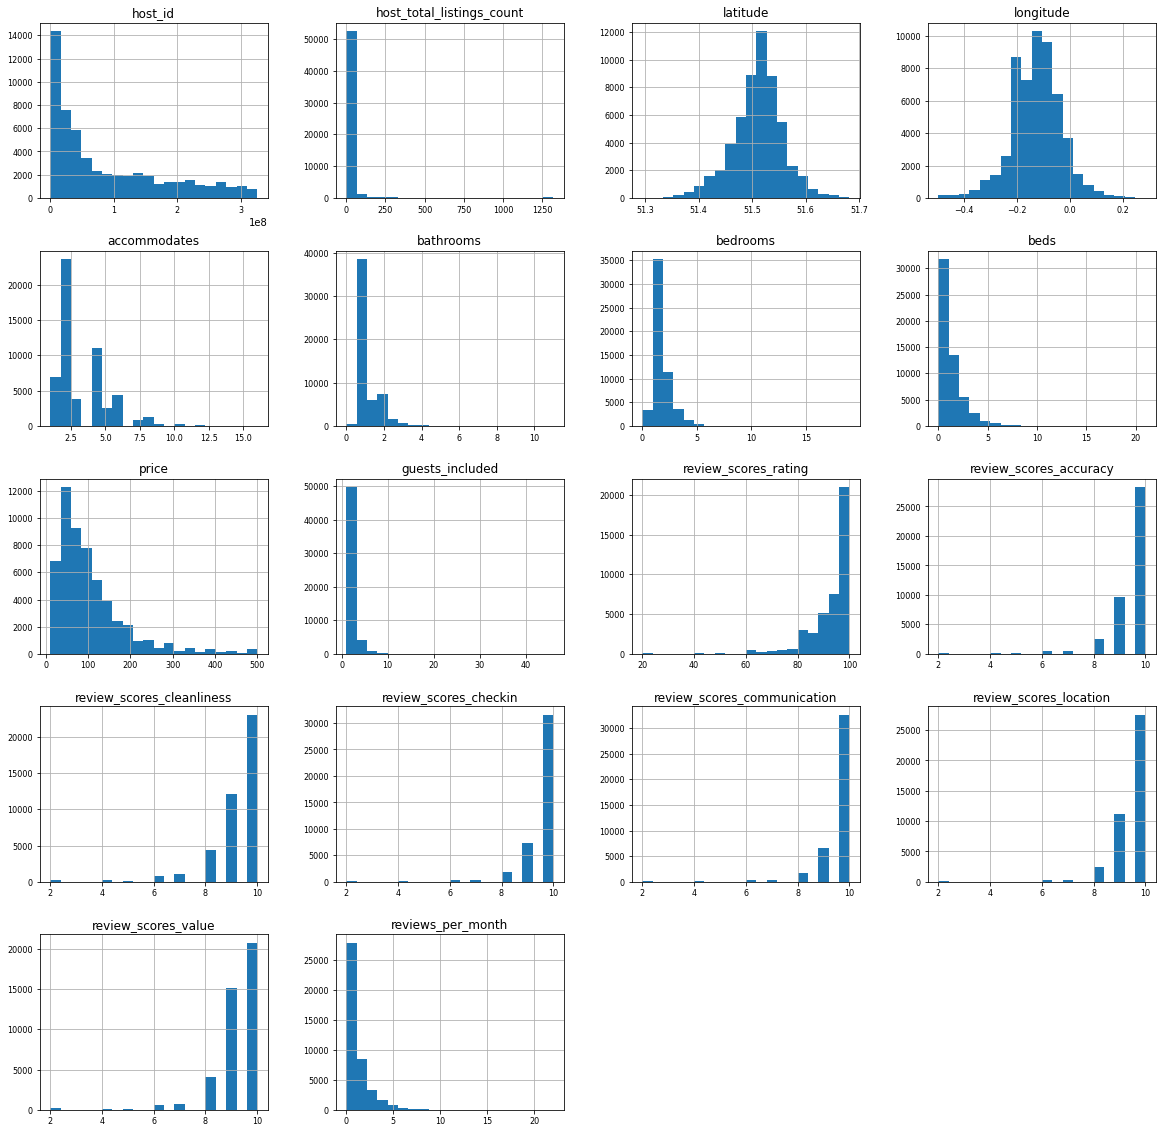

In [21]:
train.hist(figsize=(20, 20), bins=20, xlabelsize=8, ylabelsize=8)
plt.show()

As can be seen a bit better here, `longitude` contains negative values, which does not make any sense if it is assumed to be the longitude of the AirBnB. `accomodates` does also not only contain integers. And portrayed once again: there are many non-numeric variables, worth to check if there are many unique values for dummy variables.

It turned out that `longitude` is not the length of the Airbnb (as I initially thought), but the x-axis for geographic coordinates with `latitude` being the y-axis, as called out by (Xiao, 2020)
Plotting these two features together with `price` indicates the obvious, the closer to the centre, the more expensive the AirBnbs. Other interesting information can be read from it too, for example that AirBnBs are cheaper and less frequent close to the Heathrow Airport (black cross in the plot at 51.47, -0.45) (Längengrad und Breitengrad, 2021). This makes sense and indicates that these two features could be very important when predicting the price of an AirBnB, as their price is expected to depend heavily on their location.


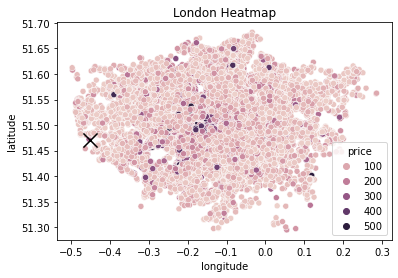

In [23]:

sns.scatterplot(data = train, x = "longitude", y = "latitude", hue = "price").set_title('London Heatmap')
plt.scatter(-0.45, 51.47, color='black',s=200, marker='x', zorder=1) #Heathrow Airport
plt.show()


Next I create different sub-datasets to make plotting easier. In the coming parts of the notebook I will also make use of these sub-samples as text-data needs to be treated seperately from numerical data.

In [22]:
def select_tabular_data_only(df):
    train_copy1 = df.copy()
    
    del train_copy1['host_since'], train_copy1['name'], train_copy1['summary'], train_copy1['space'], train_copy1['description'], train_copy1['neighborhood_overview'], train_copy1['transit'], train_copy1['house_rules'], train_copy1['picture_url'], train_copy1['amenities']
    
    return(train_copy1)

def select_text_data_only(df):
    train_copy1 = df.copy()
    train_text = train_copy1[['name', 'summary', 'space', 'description', 'neighborhood_overview', 'transit', 'house_rules', 'amenities']]
    return(train_text)

train_text = select_text_data_only(train)
train_non_text = select_tabular_data_only(train)
train_tabular = select_tabular_data_only(train)

del  train_tabular['host_id']

train_tabular

experiences_offered  host_response_time host_response_rate  \
listing_id                                                              
9Q1RD6H7IO            business      within an hour               100%   
6XDPZPGLSR                none  within a few hours               100%   
SND9OPN6IY                none      within an hour               100%   
SE3B7BXN9G                none  within a few hours               100%   
E0C82VK0VF                none      within an hour               100%   
...                        ...                 ...                ...   
HSY40NEHOI                none                 NaN                NaN   
XZXB1NS63Y                none                 NaN                NaN   
Z2T8G6D82D                none      within an hour               100%   
8B1Q8UJWLH                none                 NaN                NaN   
BKSRYBXCFL                none      within an hour                90%   

           host_is_superhost  host_total_listings_count host_has_profile_pic  \
listing_id                                                                     
9Q1RD6H7IO                 t                        1.0                    t   
6XDPZPGLSR                 t                        1.0                    t   
SND9OPN6IY                 f                        2.0                    t   
SE3B7BXN9G                 f                        1.0                    t   
E0C82VK0VF                 t                        2.0                    t   
...                      ...                        ...                  ...   
HSY40NEHOI                 f                        2.0                    t   
XZXB1NS63Y                 f                        1.0                    t   
Z2T8G6D82D                 f                        4.0                    t   
8B1Q8UJWLH                 f                        1.0                    t   
BKSRYBXCFL                 f                        2.0                    t   

           host_identity_verified   neighbourhood neighbourhood_cleansed  \
listing_id                                                                 
9Q1RD6H7IO                      f       Greenwich              Greenwich   
6XDPZPGLSR                      t  LB of Haringey               Haringey   
SND9OPN6IY                      f    LB of Merton                 Merton   
SE3B7BXN9G                      f         Clapham                Lambeth   
E0C82VK0VF                      f   LB of Lambeth                Lambeth   
...                           ...             ...                    ...   
HSY40NEHOI                      f       Stockwell                Lambeth   
XZXB1NS63Y                      f    LB of Newham                 Newham   
Z2T8G6D82D                      f  LB of Haringey               Haringey   
8B1Q8UJWLH                      t   LB of Hackney                Hackney   
BKSRYBXCFL                      f  LB of Hounslow               Hounslow   

             zipcode  latitude  longitude property_type        room_type  \
listing_id                                                                 
9Q1RD6H7IO  SE10 8SX  51.47457   -0.01062     Townhouse     Private room   
6XDPZPGLSR    N8 8NR  51.58329   -0.12416    Guesthouse     Private room   
SND9OPN6IY  SW19 1DG  51.41634   -0.18567     Apartment  Entire home/apt   
SE3B7BXN9G   SW4 9EF  51.45622   -0.14137     Apartment     Private room   
E0C82VK0VF  SE11 5TL  51.48114   -0.11219     Apartment  Entire home/apt   
...              ...       ...        ...           ...              ...   
HSY40NEHOI   SE5 9EB  51.47078   -0.10048     Apartment     Private room   
XZXB1NS63Y   E15 2PZ  51.53341   -0.00913     Apartment     Private room   
Z2T8G6D82D    N6 5AX  51.57463   -0.14177     Apartment  Entire home/apt   
8B1Q8UJWLH        N4  51.56586   -0.10193     Apartment  Entire home/apt   
BKSRYBXCFL    W4 3EB  51.48549   -0.26685         House     Private room   

            accommodates  bathrooms  bedro

In [23]:
test_text = select_text_data_only(test)
test_non_text = select_tabular_data_only(test)
test_tabular = select_tabular_data_only(test)

del  test_tabular['host_id']

test_tabular

experiences_offered  host_response_time host_response_rate  \
listing_id                                                              
0FEMC4VA5U                none                 NaN                NaN   
PQ2BYEO0QR                none      within an hour               100%   
3FP6WFHUBN                none                 NaN                NaN   
GG0V2KDG90                none                 NaN                NaN   
TZVVK4YSIO                none  a few days or more                 0%   
...                        ...                 ...                ...   
SCRJ69GZPK                none  within a few hours               100%   
ILZN192SUC                none                 NaN                NaN   
A44OQ7GPYY                none      within an hour                97%   
KZ742YLH4X                none                 NaN                NaN   
YOCQ63ZYYD                none                 NaN                NaN   

           host_is_superhost  host_total_listings_count host_has_profile_pic  \
listing_id                                                                     
0FEMC4VA5U                 f                        1.0                    t   
PQ2BYEO0QR                 t                       14.0                    t   
3FP6WFHUBN                 f                        1.0                    t   
GG0V2KDG90                 f                        1.0                    t   
TZVVK4YSIO                 f                        3.0                    t   
...                      ...                        ...                  ...   
SCRJ69GZPK                 t                        1.0                    t   
ILZN192SUC                 f                        0.0                    t   
A44OQ7GPYY                 f                       22.0                    t   
KZ742YLH4X                 f                        1.0                    t   
YOCQ63ZYYD                 f                        1.0                    t   

           host_identity_verified                 neighbourhood  \
listing_id                                                        
0FEMC4VA5U                      t  RB of Kensington and Chelsea   
PQ2BYEO0QR                      f              Westbourne Green   
3FP6WFHUBN                      t                  LB of Camden   
GG0V2KDG90                      t           LB of Tower Hamlets   
TZVVK4YSIO                      t                       Chelsea   
...                           ...                           ...   
SCRJ69GZPK                      f  RB of Kensington and Chelsea   
ILZN192SUC                      f                 LB of Hackney   
A44OQ7GPYY                      f                  LB of Camden   
KZ742YLH4X                      t                    Shoreditch   
YOCQ63ZYYD                      t                 LB of Hackney   

            neighbourhood_cleansed   zipcode  latitude  longitude  \
listing_id                                                          
0FEMC4VA5U  Kensington and Chelsea   W10 6HJ  51.51837   -0.21065   
PQ2BYEO0QR             Westminster    W2 5DH  51.51734   -0.19712   
3FP6WFHUBN                  Camden   NW1 8DU  51.54288   -0.14720   
GG0V2KDG90           Tower Hamlets        E1  51.51159   -0.06358   
TZVVK4YSIO  Kensington and Chelsea  SW10 0TB  51.48379   -0.18498   
...                            ...       ...       ...        ...   
SCRJ69GZPK  Kensington and Chelsea   W14 8EU  51.50031   -0.21055   
ILZN192SUC                 Hackney    E5 8QN  51.55838   -0.06695   
A44OQ7GPYY                  Camden  WC2H 9HB  51.51378   -0.12772   
KZ742YLH4X                 Hackney    E1 6JN  51.52683   -0.07794   
YOCQ63ZYYD                 Hackney    N1 6BZ  51.52935   -0.08729   

             property_type        room_type  accommodates  bathrooms  \
listing_id                                                             
0FEMC4VA5U       Apartment  Entire home/apt             2        1.0   
PQ2BYEO0QR       Apartment  Entire

In [24]:
train_tabular.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55284 entries, 9Q1RD6H7IO to BKSRYBXCFL
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   experiences_offered          55284 non-null  object 
 1   host_response_time           37482 non-null  object 
 2   host_response_rate           37482 non-null  object 
 3   host_is_superhost            55173 non-null  object 
 4   host_total_listings_count    55173 non-null  float64
 5   host_has_profile_pic         55173 non-null  object 
 6   host_identity_verified       55173 non-null  object 
 7   neighbourhood                55137 non-null  object 
 8   neighbourhood_cleansed       55284 non-null  object 
 9   zipcode                      54012 non-null  object 
 10  latitude                     55284 non-null  float64
 11  longitude                    55284 non-null  float64
 12  property_type                55284 non-null  object 
 13  room_ty

In [25]:
for column in train_tabular.select_dtypes('object').columns:
    del train_tabular[column]

In [26]:
for column in test_tabular.select_dtypes('object').columns:
    del test_tabular[column]

KeyboardInterrupt: 

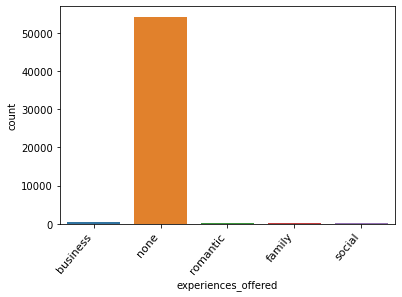

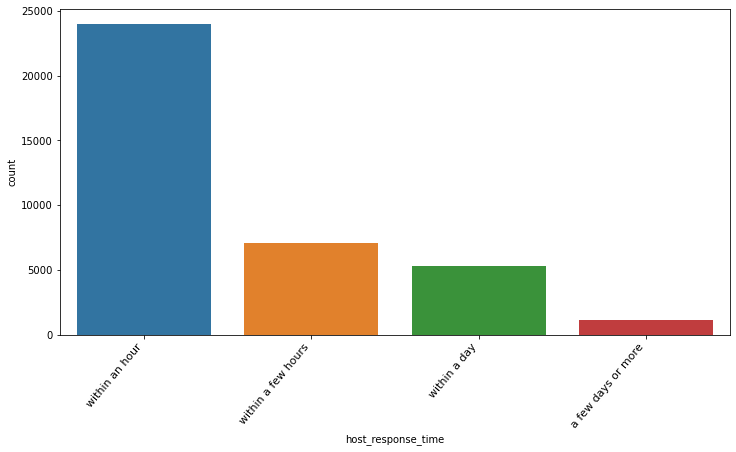

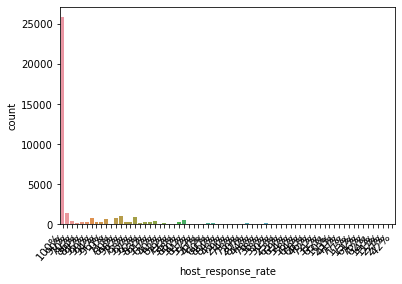

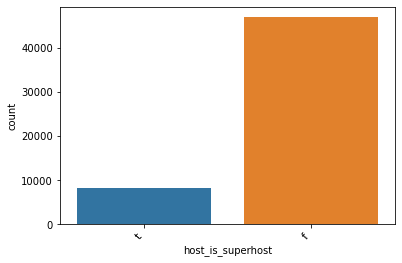

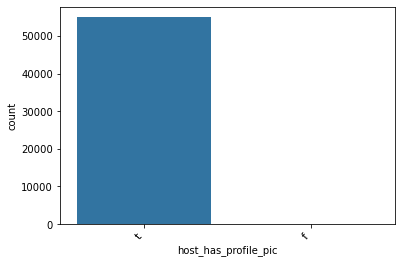

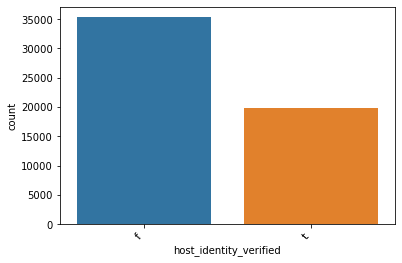

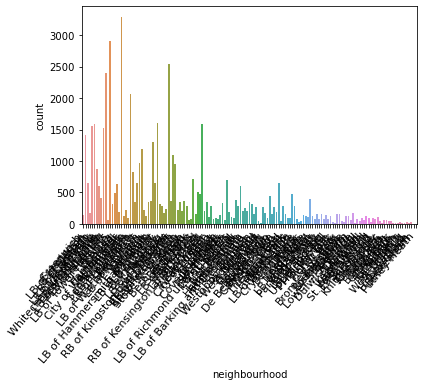

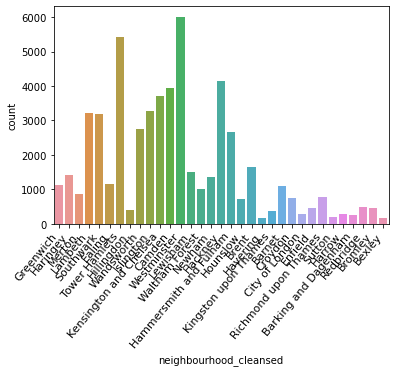

<Figure size 432x288 with 0 Axes>

In [25]:
plt.figure(figsize=(12,6))
for i, col in enumerate(train_non_text.select_dtypes('object').columns):
    plt.figure(i)
    a = sns.countplot(x=col, data=train_non_text)
    a.set_xticklabels(a.get_xticklabels(), rotation=50, ha="right", fontsize=11)  

Many variables consist of mostly one category like eg `bed_type`. `host_response_rate` is of the object type, probably because of the "%" sign. There are also quite a few neighborhoods and zip codes.

In [ ]:
train_text['amenities'].value_counts()

This is rather dirty and needs some cleaning.

It is tempting to claim `neighbourhood_cleansed` is a merged version of `neighbourhood` and `neighbourhood` essentially of `zipcode`. This can be checked using Cramer's V.

Cramer's V measures the statistical relationship between nominally scaled variables. Essentially, it uses the root of the chi-squared-value of two discrete variables and relates it to the product of the observations and the number of categories from the variable with less categories. Formally:

$V = \sqrt{\frac{\chi^2}{n*(M-1)}}$

with $V$ = Cramer's V, $\chi^2$ = Chi-Squared test value, $n$ = size of the population and $M$ = $min(k,m)$, where $k$ = number of rows and $m$ = number of columns of the cross table used for the chi-squared test. The output can be interpreted similarly to Pearson's correlation, with numbers close to 1 indicating a very strong relationship.

In [ ]:
#A function will be defined which uses the Chi-squared test for statistical independence. 
#The higher the computed value, the more does a value deviate from independence and hence the higher its relevance
def CramersV(df, cat_feature, target_feature): 
                                                    


  
  cat_feature    = cat_feature.copy() # Copies to avoid editing the original DataFrame
  target_feature = target_feature.copy()



  
  n_unique = cat_feature.nunique() # Storing of number and values of categories


  ct = pd.crosstab(cat_feature, target_feature)   # Performance of the Chi-squared test
  chi, _, _, _ = chi2_contingency(ct)

  CramersV = np.sqrt( chi / (len(df) * (min (len(cat_feature.unique()), len(target_feature.unique()))-1)))

    
  return CramersV


In [ ]:
print(CramersV(train, train['neighbourhood'], train['neighbourhood_cleansed']))
print(CramersV(train, train['neighbourhood'], train['zipcode']))
print(CramersV(train, train['neighbourhood_cleansed'], train['zipcode']))

As expected, these variables have a very high statistical relationship. If these variables turn out to be similarly predictive, it is probably recommended to keep `zipcode` as it has the most characteristics.

In [26]:
print(len(train['neighbourhood'].unique()))
print(len(train['neighbourhood_cleansed'].unique()))
print(len(train['zipcode'].unique()))

150
33
26557


In [34]:
tqdm.pandas(desc="progress-bar")



In [27]:
train['zipcode'].unique()

array(['SE10 8SX', 'N8 8NR', 'SW19 1DG', ..., 'SE25 6HX', 'Se166bx',
       'EC1R 4TS'], dtype=object)

In [28]:
test['zipcode'].unique()

array(['W10 6HJ', 'W2 5DH', 'NW1 8DU', ..., 'E5 8QN', 'WC2H 9HB',
       'N1 6BZ'], dtype=object)

In [29]:
len(train['zipcode'].unique())

26557

In [30]:
len(test['zipcode'].unique())

17318

In [31]:
train['zipcode'] = [str(word).lower() for word in train['zipcode'] ]


In [32]:
test['zipcode'] = [str(word).lower() for word in test['zipcode'] ]


In [33]:
len(train['zipcode'].unique())

26291

In [34]:
len(test['zipcode'].unique())

17179

In [35]:
def remove_space(series):
    series = series.replace(" ", "")
    return series


In [36]:
train['zipcode'] = train['zipcode'].apply(remove_space)

In [37]:
test['zipcode'] = test['zipcode'].apply(remove_space)

In [38]:
len(train['zipcode'].unique())

25916

In [39]:
len(test['zipcode'].unique())

17030

In [40]:
print(train['zipcode'].unique())

['se108sx' 'n88nr' 'sw191dg' ... 'nw18df' 'se256hx' 'ec1r4ts']


In [41]:
print(test['zipcode'].unique())

['w106hj' 'w25dh' 'nw18du' ... 'e58qn' 'wc2h9hb' 'n16bz']


In [42]:
keep_all_zips = []
[keep_all_zips.append(x) for x in train['zipcode'].unique() if x not in keep_all_zips]
[keep_all_zips.append(x) for x in test['zipcode'].unique() if x not in keep_all_zips]
keep_all_zips

['se108sx',
 'n88nr',
 'sw191dg',
 'sw49ef',
 'se115tl',
 'se85aw',
 'w55ed',
 'e12qz',
 'ub34qy',
 'sw84hj',
 'sw46fe',
 'n7',
 'se22',
 'e18ly',
 'n70nn',
 'se24',
 'sw19',
 'sw34rd',
 'nw61bp',
 'n43jj',
 'sw22qp',
 'e10dn',
 'se156dx',
 'sw1v4rz',
 'wc1n1df',
 'se11yz',
 'sw81dl',
 'n51ge',
 'se15',
 'nw62by',
 'se26',
 'n43hz',
 'se135ag',
 'se50pw',
 'e26dg',
 'sw84bg',
 'e177dn',
 'w1w8nq',
 'n52uu',
 'e14gj',
 'e153ew',
 'e81bz',
 'wc1h8jp',
 'nan',
 'n11pa',
 'se249af',
 'sw59sg',
 'w6',
 'tw74le',
 'nw66ae',
 'n1',
 'se13gn',
 'w104lg',
 'e81ey',
 'nw12hl',
 'rm78aq',
 'w1t4hj',
 'e161yh',
 'n16',
 'kt26lg',
 'nw117hf',
 'se171gg',
 'sw1v3en',
 'nw4',
 'w129dr',
 'e14',
 'e5',
 'tw140nb',
 'se77bz',
 'n167nx',
 'w129hw',
 'w22ye',
 'e16sy',
 'w7',
 'e8',
 'w129sh',
 'ha04uy',
 'e1',
 'w41ex',
 'sw1y4uf',
 'e83ep',
 'e174px',
 'n111eh',
 'sw59rh',
 'n78tp',
 'e79hf',
 'se137tt',
 'nw80ng',
 'e142da',
 'e147hg',
 'n168ap',
 'e20aa',
 'wc1x9ae',
 'n17gs',
 'w92je',
 'se151aj',
 

In [43]:
len(keep_all_zips) - len(train['zipcode'].unique())

7353

In [44]:
sorted(keep_all_zips)

['',
 '1',
 '11430',
 '2010',
 '[noname]',
 'br1',
 'br11hr',
 'br11ht',
 'br11hw',
 'br11jb',
 'br11jy',
 'br11na',
 'br12eq',
 'br12fj',
 'br12hd',
 'br12hn',
 'br12lu',
 'br12pe',
 'br12pj',
 'br12qe',
 'br12qz',
 'br12rg',
 'br13ag',
 'br13ay',
 'br13bf',
 'br13dg',
 'br13dn',
 'br13ej',
 'br13el',
 'br13ha',
 'br13hn',
 'br13hp',
 'br13hw',
 'br13jh',
 'br13jj',
 'br13jn',
 'br13jt',
 'br13ln',
 'br13pa',
 'br13pe',
 'br13pn',
 'br13pr',
 'br13ps',
 'br13py',
 'br13pz',
 'br13qj',
 'br13rd',
 'br13rs',
 'br13wu',
 'br14af',
 'br14ay',
 'br14ba',
 'br14bs',
 'br14ep',
 'br14eu',
 'br14hl',
 'br14je',
 'br14jl',
 'br14jn',
 'br14jq',
 'br14lj',
 'br14ln',
 'br14nq',
 'br14nt',
 'br14nx',
 'br14qh',
 'br14ql',
 'br14qz',
 'br14rd',
 'br14rg',
 'br14ta',
 'br15bq',
 'br15db',
 'br15de',
 'br15ds',
 'br15eh',
 'br15el',
 'br15gn',
 'br15hd',
 'br15hh',
 'br15hw',
 'br15jb',
 'br15jr',
 'br15ju',
 'br15le',
 'br15nx',
 'br15pe',
 'br15pp',
 'br15pz',
 'br15qe',
 'br15qp',
 'br15se',
 'b

# Data Preparation

## Transform the date since hosts are active

Dates are rather hard to digest for machine learning algorithms and the relevant information is in the end the time that has elapsed since the date or between two dates. Hence `host_since` will be transformed in the number of years since a user has been a host.

In [45]:
def generate_in_years(input_df, output_df, input_feature_name):

    #set a fixed date for alignment
    Newyear = datetime(2021, 1, 1) 


    input_df[input_feature_name]= input_df[input_feature_name].astype('datetime64[ns]')

    #generate the lengths
    output_df[input_feature_name + '_in_years'] = Newyear - input_df[input_feature_name]
    
    #convert into number (or proportion) of years
    output_df[input_feature_name + '_in_years'] = output_df[input_feature_name + '_in_years'] / np.timedelta64(1, 'Y') 
    

    
     

In [46]:
 generate_in_years(train, train_tabular, 'host_since')

In [47]:
 generate_in_years(test, test_tabular, 'host_since')

## Clean `host_response_rate`

In [48]:
def transform_host_response_rate(input_df, output_df, feature = 'host_response_rate'):
    output_df[feature] = input_df[feature]
    output_df[feature] = output_df[feature].str.replace('%', '')
    output_df[feature] = output_df[feature].astype('float64')

    output_df[feature] = output_df[feature] / 100
    
    del input_df[feature]



In [49]:
transform_host_response_rate(train_non_text, train_tabular)
transform_host_response_rate(test_non_text, test_tabular)
train_tabular['host_response_rate']

listing_id
9Q1RD6H7IO    1.0
6XDPZPGLSR    1.0
SND9OPN6IY    1.0
SE3B7BXN9G    1.0
E0C82VK0VF    1.0
             ... 
HSY40NEHOI    NaN
XZXB1NS63Y    NaN
Z2T8G6D82D    1.0
8B1Q8UJWLH    NaN
BKSRYBXCFL    0.9
Name: host_response_rate, Length: 55284, dtype: float64

## Fill missing values

In [50]:
bools = ['host_is_superhost','host_has_profile_pic', 'host_identity_verified'] 

for feature in bools:

    print(train.groupby(feature, dropna=False)['price'].mean())

host_is_superhost
f      105.681091
t       96.198511
NaN    121.927928
Name: price, dtype: float64
host_has_profile_pic
f       88.750000
t      104.318452
NaN    121.927928
Name: price, dtype: float64
host_identity_verified
f      105.914050
t      101.348313
NaN    121.927928
Name: price, dtype: float64


The average prices for each possible value of the boolean features do not differ a lot from each other. Most surprisingly, the average price is highest when the value is missing. It is also outstanding that the average price of a listing is the same for missing values in all boolean features. Eye-balling these listings does not show any pattern, I assume that if one of the boolean features is missing, the others are just missing too. This is most likely a result from Web-scraping, as it is far from error-free in practice and would also explain the high frequency of missing values across almost all features.

Worth to mention, one can see here that the listing with ID `WKIUKOS5BJ` has a summary and description in a non-English language, possibly Spanish. As will be shown later in this paper, there are also other indications for listings being not entirely in English. They will be treated later on.

In [51]:
#any feature from bools could be taken as the listings with NaN seem to be the same for all bools
train[train['host_is_superhost'].isna()] 

name  \
listing_id                                                      
0EWGTUPTNZ                           large room in Shoreditch   
IHZY04H9A8    Sunny double room in refurbished Islington flat   
D2YX4NYMXL       Clean room super near to underground station   
8U4BL9A3W4  Lovely, Bright Studio Apartment with roof terrace   
MFCY7LN62A   Beautiful 3 Bedroom Apartment in Chelsea, London   
...                                                       ...   
WKIUKOS5BJ                             Nice apartment Chelsea   
WGGMUAXCRE  Lovely Two Bedroom Lambeth North Central Londo...   
QDUSNIIT7T   2 bed penthouse, Paddington 15min, Heathrow 6min   
VYTYIZKWRJ                      Comfy bed in a great location   
9JWX8VP9EF     Superior One Bedroom Apartment - Knightsbridge   

                                                      summary  \
listing_id                                                      
0EWGTUPTNZ  Big space, very convenient location, 5 mins by...   
IHZY04H9A8  Sunny hotel style bedroom with bathroom in a n...   
D2YX4NYMXL  Hello, friends~! I welcome you to my place. Th...   
8U4BL9A3W4  A bright, well presented and located Victorian...   
MFCY7LN62A  This is a beautifully appointed quiet flat on ...   
...                                                       ...   
WKIUKOS5BJ  Nos encontramos con este precioso apartamento ...   
WGGMUAXCRE  Two Bedroom Apartment 1 Minute Away From Lambe...   
QDUSNIIT7T  Delightful modern condo with concierge and a l...   
VYTYIZKWRJ  A spacious bright room with a comfy double bed...   
9JWX8VP9EF                                                NaN   

                                                        space  \
listing_id                                                      
0EWGTUPTNZ                                                NaN   
IHZY04H9A8  The flat overlooks a stunning city farm, a tru...   
D2YX4NYMXL  This is a 3 bedroom flat. You will use one of ...   
8U4BL9A3W4  A great part of West London to be in to see th...   
MFCY7LN62A  The bedrooms are spread over the two floors gi...   
...                                                       ...   
WKIUKOS5BJ                                                NaN   
WGGMUAXCRE                                                NaN   
QDUSNIIT7T  All spaces quoted for sole use of guests All a...   
VYTYIZKWRJ                                                NaN   
9JWX8VP9EF  One Bed­room Supe­rior apart­ment located on t...   

                                                  description  \
listing_id                                                      
0EWGTUPTNZ  Big space, very convenient location, 5 mins by...   
IHZY04H9A8  Sunny hotel style bedroom with bathroom in a n...   
D2YX4NYMXL  Hello, friends~! I welcome you to my place. Th...   
8U4BL9A3W4  A bright, well presented and located Victorian...   
MFCY7LN62A  This is a beautifully appointed quiet flat on ...   
...                                                       ...   
WKIUKOS5BJ  Nos encontramos con este precioso apartamento ...   
WGGMUAXCRE  Two Bedroom Apartment 1 Minute Away From Lambe...   
QDUSNIIT7T  Delightful modern condo with concierge and a l...   
VYTYIZKWRJ  A spacious bright room with a comfy double bed...   
9JWX8VP9EF  One Bed­room Supe­rior apart­ment located on t...   

           experiences_offered  \
listing_id                       
0EWGTUPTNZ                none   
IHZY04H9A8                none   
D2YX4NYMXL                none   
8U4BL9A3W4                none   
MFCY7LN62A                none   
...                        ...   
WKIUKOS5BJ                none   
WGGMUAXCRE                none   
QDUSNIIT7T                none   
VYTYIZKWRJ                none   
9JWX8VP9EF                none   

                                        neighborhood_overview  \
listing_id                                                      
0EWGTUPTNZ                                                NaN   
IHZY04H9A8  10 minutes walk to the 

In [52]:
train.isnull().sum() 

name                              14
summary                         2954
space                          16881
description                     1726
experiences_offered                0
neighborhood_overview          19506
transit                        19807
house_rules                    23378
picture_url                        0
host_id                            0
host_since                       111
host_response_time             17802
host_response_rate             17802
host_is_superhost                111
host_total_listings_count        111
host_has_profile_pic             111
host_identity_verified           111
neighbourhood                    147
neighbourhood_cleansed             0
zipcode                            0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         70
bedrooms                          62
b

In [53]:
reviews = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

for feature in reviews:
    print(train[feature].unique())


[ 95.  99.  84.  nan 100.  70.  96.  83.  90.  92.  85.  97.  80.  89.
  81.  88.  94.  91.  77.  98.  87.  86.  60.  82.  93.  50.  65.  75.
  71.  79.  78.  67.  76.  73.  20.  32.  54.  63.  40.  72.  68.  74.
  56.  55.  53.  69.  64.  47.  30.  66.  57.  52.  44.  58.  37.  61.
  45.  62.]
[10.  9. nan  8.  6.  7.  4.  5.  3.  2.]
[10.  9. nan  5.  8.  7.  6.  4.  2.  3.]
[10. nan  9.  8.  7.  6.  5.  3.  4.  2.]
[10. nan  9.  8.  7.  6.  5.  2.  3.  4.]
[10.  9. nan  8.  7.  5.  6.  3.  4.  2.]
[10.  8. nan  9.  7.  5.  6.  4.  3.  2.]


`review_scores_rating` has no score below 30 but up to 100. Using the middle as a default value would be misleading, I will therefore use the median of this dataset. The rest of reviews are stars from 1 stars till 5 in half-star steps. I will use the median from the upper lists as a "neutral" benchmark, which is 6 (=3 out of 5 stars given).

In [54]:
list_for_not_given = ['host_response_time', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'zipcode']

for feature in list_for_not_given:
    train_non_text[feature].fillna('not given', inplace=True)
    
for feature in list_for_not_given:
    test_non_text[feature].fillna('not given', inplace=True)
    
list_for_median = ['host_response_rate', 'host_total_listings_count', 'host_since_in_years', 'reviews_per_month', 'review_scores_rating', 'bathrooms', 'bedrooms', 'beds']

for feature in list_for_median:
    train_tabular[feature].fillna(train_tabular[feature].median(), inplace=True)
    
for feature in list_for_median:
    test_tabular[feature].fillna(test_tabular[feature].median(), inplace=True)

#review_scores_rating does not have nan values anymore, hence it is of no harm to use this list
for feature in reviews: 
    train_tabular[feature].fillna(6, inplace=True) 

for feature in reviews: 
    test_tabular[feature].fillna(6, inplace=True) 

In [55]:
train_tabular.describe(include="all")

host_total_listings_count      latitude     longitude  accommodates  \
count                55284.00000  55284.000000  55284.000000  55284.000000   
mean                    20.66692     51.509971     -0.126962      3.131756   
std                    116.91514      0.046741      0.093517      1.930209   
min                      0.00000     51.294790     -0.496680      1.000000   
25%                      1.00000     51.485300     -0.187633      2.000000   
50%                      2.00000     51.514330     -0.124510      2.000000   
75%                      5.00000     51.537960     -0.068820      4.000000   
max                   1321.00000     51.681690      0.285390     16.000000   

          bathrooms      bedrooms          beds         price  \
count  55284.000000  55284.000000  55284.000000  55284.000000   
mean       1.283491      1.373453      1.707293    104.308751   
std        0.566288      0.859057      1.222371     83.740407   
min        0.000000      0.000000      0.000000     10.000000   
25%        1.000000      1.000000      1.000000     45.000000   
50%        1.000000      1.000000      1.000000     80.000000   
75%        1.500000      2.000000      2.000000    130.000000   
max       11.000000     19.000000     21.000000    500.000000   

       guests_included  review_scores_rating  review_scores_accuracy  \
count     55284.000000          55284.000000            55284.000000   
mean          1.574832             93.374322                8.650785   
std           1.263427              8.854797                1.728920   
min           1.000000             20.000000                2.000000   
25%           1.000000             92.000000                6.000000   
50%           1.000000             96.000000               10.000000   
75%           2.000000             98.000000               10.000000   
max          46.000000            100.000000               10.000000   

       review_scores_cleanliness  review_scores_checkin  \
count               55284.000000           55284.000000   
mean                    8.468472               8.738677   
std                     1.714253               1.739214   
min                     2.000000               2.000000   
25%                     6.000000               6.000000   
50%                     9.000000              10.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       review_scores_communication  review_scores_location  \
count                 55284.000000            55284.000000   
mean                      8.764416                8.678062   
std                       1.741802                1.676105   
min                       2.000000                2.000000   
25%                       6.000000                6.000000   
50%                      10.000000                9.000000   
75%                      10.000000               10.000000   
max                      10.000000               10.000000   

       review_scores_value  reviews_per_month  host_since_in_years  \
count          55284.00000       55284.000000         55284.000000   
mean               8.46726           1.067172             5.089557   
std                1.66445           1.206313             2.236743   
min                2.00000           0.010000             0.982909   
25%                6.00000           0.350000             3.400481   
50%                9.00000           0.730000             5.147265   
75%               10.00000           1.230000             6.633949   
max               10.00000          22.040000            12.328795   

       host_response_rate  
count        55284.000000  
mean             0.955001  
std              0.145486  
min              0.000000  
25%              1.000000  
50%              1.000000  
75%              1.000000  
max              1.000000

In [56]:
train_tabular.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55284 entries, 9Q1RD6H7IO to BKSRYBXCFL
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_total_listings_count    55284 non-null  float64
 1   latitude                     55284 non-null  float64
 2   longitude                    55284 non-null  float64
 3   accommodates                 55284 non-null  int64  
 4   bathrooms                    55284 non-null  float64
 5   bedrooms                     55284 non-null  float64
 6   beds                         55284 non-null  float64
 7   price                        55284 non-null  float64
 8   guests_included              55284 non-null  int64  
 9   review_scores_rating         55284 non-null  float64
 10  review_scores_accuracy       55284 non-null  float64
 11  review_scores_cleanliness    55284 non-null  float64
 12  review_scores_checkin        55284 non-null  float64
 13  review_

In [57]:
test_tabular.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29769 entries, 0FEMC4VA5U to YOCQ63ZYYD
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_total_listings_count    29769 non-null  float64
 1   latitude                     29769 non-null  float64
 2   longitude                    29769 non-null  float64
 3   accommodates                 29769 non-null  int64  
 4   bathrooms                    29769 non-null  float64
 5   bedrooms                     29769 non-null  float64
 6   beds                         29769 non-null  float64
 7   guests_included              29769 non-null  int64  
 8   review_scores_rating         29769 non-null  float64
 9   review_scores_accuracy       29769 non-null  float64
 10  review_scores_cleanliness    29769 non-null  float64
 11  review_scores_checkin        29769 non-null  float64
 12  review_scores_communication  29769 non-null  float64
 13  review_

## Transform categorical tabular data

### Weight Of Evidence

Another way of encoding categorical features (or practically categorical like Ids) is using Weight Of Evidence. Originally, this encoding is meant to encode features for a classification target. However, it can be modified to make it usable for continous target variables (Bhalla, 2020). This modified WoE is calculated with

$Modified \ WoE = \frac{\ln{\% Y}}{\% Obs}$


where $\% Y$ is the share of the target variable $Y$ in a category and $\% Obs$ the share of total observations per category. Another advantage of encoding variables with WoE is the use of Information Value. IV is calculated from WoE and is an easy way of determining the relevance of a categorical feature, which will be done at a later stage. The formula for it equals 

$\sum((\% Y - \% Obs) * Modified \ WoE)$

In [58]:
#generate an Information Value class
class IV_Calc:
    def __init__(self, df, feature, target):
        self.feature = feature
        self.target = target
        self.df = df

    #count the number of observations per category and the sum of target values inside each category
    def count_values(self):
        data = pd.DataFrame()
        data['Count'] = self.df[self.feature].value_counts()               
        data['Sum Y'] = self.df.groupby([self.feature])[self.target].sum()
        data = data.sort_values(by=["Count"], ascending=False)
        return data

    #get the % for observations and target
    def distribution(self):
        data = self.count_values()
        n = len(self.df)
        data['% Observations'] = data['Count'] / n
        data['% Y'] = data['Sum Y'] / data['Sum Y'].sum()
        return data.iloc[:,-2:]
  
    #calculate WoE with previously calculated results
    def woe(self):
        data = self.distribution()
        data['WOE'] = np.log(data['% Y'] / data['% Observations'])
        data.replace({"WOE": {np.inf: 0, -np.inf: 0}})  
        data = data.sort_values(by=["WOE"], ascending=False)
        return data.iloc[:,-1]
  
   
    #calculate IV
    def IV_per_cat(self):
        data = self.distribution()
        data['WOE'] = self.woe()
        data["IV"] = data["WOE"]*(data['% Y'] - data['% Observations'])
        data = data.sort_values(by=["IV"], ascending=False)
        return data.iloc[:,-1]
    
    #give a full summary for a feature
    def full_summary(self):
        data = self.count_values()
        data['% Observations'] = data['Count'] / len(self.df)
        data['% Y'] = data['Sum Y'] / data['Sum Y'].sum()
        data['WOE'] = self.woe()
        data["IV"] = self.IV_per_cat()
        data = data.sort_values(by=["Count"], ascending=False)
        return data
    
    #return the assessment of relevance for a feature by rule of thumb
    def final_assessment(self):
        data = self.full_summary()
        iv = data["IV"].sum() # final IV value
        if iv < .02:
            print("The variable " + self.feature + " is not predictive with an IV of: {}".format(iv))
        elif iv < .1:
            print("The variable " + self.feature + " is weakly predictive with an IV of:{}".format(iv))
        elif iv < .3:
            print("The variable " + self.feature + " is moderately predictive with an IV of:{}".format(iv))
        else :
            print("The variable " + self.feature + " is highly predictive with an IV of: {}".format(iv))
        return iv

In [59]:
train_tabular

host_total_listings_count  latitude  longitude  accommodates  \
listing_id                                                                 
9Q1RD6H7IO                        1.0  51.47457   -0.01062             2   
6XDPZPGLSR                        1.0  51.58329   -0.12416             2   
SND9OPN6IY                        2.0  51.41634   -0.18567             5   
SE3B7BXN9G                        1.0  51.45622   -0.14137             1   
E0C82VK0VF                        2.0  51.48114   -0.11219             3   
...                               ...       ...        ...           ...   
HSY40NEHOI                        2.0  51.47078   -0.10048             2   
XZXB1NS63Y                        1.0  51.53341   -0.00913             2   
Z2T8G6D82D                        4.0  51.57463   -0.14177             7   
8B1Q8UJWLH                        1.0  51.56586   -0.10193             2   
BKSRYBXCFL                        2.0  51.48549   -0.26685             2   

            bathrooms  bedrooms  beds  price  guests_included  \
listing_id                                                      
9Q1RD6H7IO        1.0       1.0   1.0   35.0                1   
6XDPZPGLSR        1.0       1.0   1.0   75.0                2   
SND9OPN6IY        1.0       1.0   2.0  120.0                2   
SE3B7BXN9G        1.0       1.0   1.0   50.0                1   
E0C82VK0VF        1.0       2.0   2.0  104.0                1   
...               ...       ...   ...    ...              ...   
HSY40NEHOI        1.0       1.0   1.0   65.0                1   
XZXB1NS63Y        1.0       1.0   0.0   40.0                1   
Z2T8G6D82D        2.0       3.0   4.0   89.0                2   
8B1Q8UJWLH        1.0       1.0   1.0   80.0                2   
BKSRYBXCFL        1.0       1.0   1.0  110.0                1   

            review_scores_rating  review_scores_accuracy  \
listing_id                                                 
9Q1RD6H7IO                  95.0                    10.0   
6XDPZPGLSR                  99.0                    10.0   
SND9OPN6IY                  84.0                     9.0   
SE3B7BXN9G                  96.0                     6.0   
E0C82VK0VF                 100.0                    10.0   
...                          ...                     ...   
HSY40NEHOI                 100.0                    10.0   
XZXB1NS63Y                 100.0                    10.0   
Z2T8G6D82D                  96.0                    10.0   
8B1Q8UJWLH                  94.0                    10.0   
BKSRYBXCFL                 100.0                    10.0   

            review_scores_cleanliness  review_scores_checkin  \
listing_id                                                     
9Q1RD6H7IO                       10.0                   10.0   
6XDPZPGLSR                       10.0                   10.0   
SND9OPN6IY                        9.0                   10.0   
SE3B7BXN9G                        6.0                    6.0   
E0C82VK0VF                       10.0                   10.0   
...                               ...                    ...   
HSY40NEHOI                       10.0                   10.0   
XZXB1NS63Y                       10.0                   10.0   
Z2T8G6D82D                       10.0                   10.0   
8B1Q8UJWLH                       10.0                    9.0   
BKSRYBXCFL                       10.0                   10.0   

            review_scores_communication  review_scores_location  \
listing_id                                                        
9Q1RD6H7IO                         10.0                    10.0   
6XDPZPGLSR                         10.0                    10.0   
SND9OPN6IY                         10.0                     9.0   
SE3B7BXN9G                          6.0                     6.0   
E0C82VK0VF                         10.0                    10.0   
...                                 ...                     ...   
HSY40NEHOI                 

In [60]:
#test for `host_response_time`
woe_test = IV_Calc(df=train_non_text, feature="host_response_time", target="price") 

woe_test.full_summary()

Count      Sum Y  % Observations       % Y       WOE  \
within an hour      23982  2737918.0        0.433796  0.474789  0.090294   
not given           17802  1552268.0        0.322010  0.269182 -0.179194   
within a few hours   7105   764410.0        0.128518  0.132558  0.030950   
within a day         5274   593415.0        0.095398  0.102905  0.075750   
a few days or more   1121   118594.0        0.020277  0.020566  0.014129   

                          IV  
within an hour      0.003701  
not given           0.009466  
within a few hours  0.000125  
within a day        0.000569  
a few days or more  0.000004

In [61]:
def generate_woe(input_df, output_df):
    for  feature in itertools.chain(input_df.select_dtypes('object').columns , [input_df['host_id'].name]):
        woe_ = IV_Calc(df=input_df, feature=feature, target="price")
        dic = dict(zip(woe_.woe().index, woe_.woe()))
        output_df[feature + '_woe'] = input_df[feature].map(dic)



For unknown reasons, the features `bathrooms`, `bedrooms` and `beds` are of object type, while only containing numeric values. As a result I convert them manually to float type features.

In [62]:
train_non_text.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55284 entries, 9Q1RD6H7IO to BKSRYBXCFL
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   experiences_offered          55284 non-null  object 
 1   host_id                      55284 non-null  int64  
 2   host_response_time           55284 non-null  object 
 3   host_is_superhost            55284 non-null  object 
 4   host_total_listings_count    55173 non-null  float64
 5   host_has_profile_pic         55284 non-null  object 
 6   host_identity_verified       55284 non-null  object 
 7   neighbourhood                55284 non-null  object 
 8   neighbourhood_cleansed       55284 non-null  object 
 9   zipcode                      55284 non-null  object 
 10  latitude                     55284 non-null  float64
 11  longitude                    55284 non-null  float64
 12  property_type                55284 non-null  object 
 13  room_ty

In [63]:
test_non_text.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29769 entries, 0FEMC4VA5U to YOCQ63ZYYD
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   experiences_offered          29769 non-null  object 
 1   host_id                      29769 non-null  int64  
 2   host_response_time           29769 non-null  object 
 3   host_is_superhost            29769 non-null  object 
 4   host_total_listings_count    29704 non-null  float64
 5   host_has_profile_pic         29769 non-null  object 
 6   host_identity_verified       29769 non-null  object 
 7   neighbourhood                29769 non-null  object 
 8   neighbourhood_cleansed       29769 non-null  object 
 9   zipcode                      29769 non-null  object 
 10  latitude                     29769 non-null  float64
 11  longitude                    29769 non-null  float64
 12  property_type                29769 non-null  object 
 13  room_ty

In [64]:
for feature in train_non_text[['bathrooms', 'bedrooms', 'beds']]:
    print(train_non_text[feature].unique())

[ 1.   1.5  2.   2.5  3.   nan  0.   3.5  4.   0.5  5.  10.   7.   8.
  4.5  6.   8.5  5.5  6.5  7.5 11. ]
[ 1.  2.  0.  5.  3.  4.  7.  6. nan  9. 19.  8. 11.]
[ 1.  2.  3.  0.  4.  7. nan  6.  8.  5.  9. 10. 11. 21. 14. 15. 13. 12.
 20. 18. 16. 17.]


In [65]:
for feature in test_non_text[['bathrooms', 'bedrooms', 'beds']]:
    print(test_non_text[feature].unique())

[ 1.   2.5  1.5  2.   0.   3.5  nan  3.   4.   0.5  8.   4.5  5.  10.5
  6.   8.5 10.   7.   5.5 12.   9.5]
[ 1.  2.  3.  0.  4. nan  5.  6.  7.  8. 10.  9. 12.]
[ 1.  2.  3.  0.  5.  4. nan  6. 11.  8.  7.  9. 14. 10. 12. 27. 16.]


In [66]:
train_non_text[['bathrooms', 'bedrooms', 'beds']].astype(float)

bathrooms  bedrooms  beds
listing_id                           
9Q1RD6H7IO        1.0       1.0   1.0
6XDPZPGLSR        1.0       1.0   1.0
SND9OPN6IY        1.0       1.0   2.0
SE3B7BXN9G        1.0       1.0   1.0
E0C82VK0VF        1.0       2.0   2.0
...               ...       ...   ...
HSY40NEHOI        1.0       1.0   1.0
XZXB1NS63Y        1.0       1.0   0.0
Z2T8G6D82D        2.0       3.0   4.0
8B1Q8UJWLH        1.0       1.0   1.0
BKSRYBXCFL        1.0       1.0   1.0

[55284 rows x 3 columns]

In [67]:
test_non_text[['bathrooms', 'bedrooms', 'beds']].astype(float)

bathrooms  bedrooms  beds
listing_id                           
0FEMC4VA5U        1.0       1.0   1.0
PQ2BYEO0QR        1.0       1.0   1.0
3FP6WFHUBN        2.5       1.0   1.0
GG0V2KDG90        1.5       1.0   1.0
TZVVK4YSIO        1.0       1.0   2.0
...               ...       ...   ...
SCRJ69GZPK        3.5       4.0   7.0
ILZN192SUC        1.5       1.0   NaN
A44OQ7GPYY        1.0       1.0   2.0
KZ742YLH4X        1.0       1.0   1.0
YOCQ63ZYYD        1.0       1.0   1.0

[29769 rows x 3 columns]

In [68]:
def generate_woe(input_df, output_df, reference_df):
    for  feature in itertools.chain(input_df.select_dtypes('object').columns , [input_df['host_id'].name]):
        woe_ = IV_Calc(df=input_df, feature=feature, target="price")
        dic = dict(zip(woe_.woe().index, woe_.woe()))
        output_df[feature + '_woe'] = reference_df[feature].map(dic)

woe_ = IV_Calc(train_non_text, 'host_response_time', target = 'price')

In [69]:
dic = dict(zip(woe_.woe().index, woe_.woe()))
test_non_text['host_response_time'].map(dic)

listing_id
0FEMC4VA5U   -0.179194
PQ2BYEO0QR    0.090294
3FP6WFHUBN   -0.179194
GG0V2KDG90   -0.179194
TZVVK4YSIO    0.014129
                ...   
SCRJ69GZPK    0.030950
ILZN192SUC   -0.179194
A44OQ7GPYY    0.090294
KZ742YLH4X   -0.179194
YOCQ63ZYYD   -0.179194
Name: host_response_time, Length: 29769, dtype: float64

In [70]:
generate_woe(train_non_text, train_tabular, train_non_text)

In [71]:
generate_woe(train_non_text, test_tabular, test_non_text)

Unsurprisingly, some features in the test set contain values that are not part of the train set. As WoE requires a price in order to be detected, there is no way on how to get a WoE value for these observations I have to set a value to them manually. As WoE is also containing part of IV, with a higher value indicating a higher relationship, I set the missing values to 0, since one can neither tell whether these observation should increase or decrease the IV of the variable.

In [72]:
test_tabular.isnull().sum()

host_total_listings_count          0
latitude                           0
longitude                          0
accommodates                       0
bathrooms                          0
bedrooms                           0
beds                               0
guests_included                    0
review_scores_rating               0
review_scores_accuracy             0
review_scores_cleanliness          0
review_scores_checkin              0
review_scores_communication        0
review_scores_location             0
review_scores_value                0
reviews_per_month                  0
host_since_in_years                0
host_response_rate                 0
experiences_offered_woe            0
host_response_time_woe             0
host_is_superhost_woe              0
host_has_profile_pic_woe           0
host_identity_verified_woe         0
neighbourhood_woe                  0
neighbourhood_cleansed_woe         0
zipcode_woe                     9105
property_type_woe                  6
r

In [73]:
test_tabular.fillna(0, inplace= True)

In [74]:
test_tabular

host_total_listings_count  latitude  longitude  accommodates  \
listing_id                                                                 
0FEMC4VA5U                        1.0  51.51837   -0.21065             2   
PQ2BYEO0QR                       14.0  51.51734   -0.19712             2   
3FP6WFHUBN                        1.0  51.54288   -0.14720             2   
GG0V2KDG90                        1.0  51.51159   -0.06358             1   
TZVVK4YSIO                        3.0  51.48379   -0.18498             3   
...                               ...       ...        ...           ...   
SCRJ69GZPK                        1.0  51.50031   -0.21055             8   
ILZN192SUC                        0.0  51.55838   -0.06695             2   
A44OQ7GPYY                       22.0  51.51378   -0.12772             4   
KZ742YLH4X                        1.0  51.52683   -0.07794             2   
YOCQ63ZYYD                        1.0  51.52935   -0.08729             2   

            bathrooms  bedrooms  beds  guests_included  review_scores_rating  \
listing_id                                                                     
0FEMC4VA5U        1.0       1.0   1.0                1                  96.0   
PQ2BYEO0QR        1.0       1.0   1.0                1                  97.0   
3FP6WFHUBN        2.5       1.0   1.0                1                  96.0   
GG0V2KDG90        1.5       1.0   1.0                1                  96.0   
TZVVK4YSIO        1.0       1.0   2.0                2                  98.0   
...               ...       ...   ...              ...                   ...   
SCRJ69GZPK        3.5       4.0   7.0                1                 100.0   
ILZN192SUC        1.5       1.0   1.0                1                  96.0   
A44OQ7GPYY        1.0       1.0   2.0                1                  89.0   
KZ742YLH4X        1.0       1.0   1.0                1                 100.0   
YOCQ63ZYYD        1.0       1.0   1.0                1                  97.0   

            review_scores_accuracy  review_scores_cleanliness  \
listing_id                                                      
0FEMC4VA5U                    10.0                       10.0   
PQ2BYEO0QR                    10.0                       10.0   
3FP6WFHUBN                     6.0                        6.0   
GG0V2KDG90                     6.0                        6.0   
TZVVK4YSIO                    10.0                       10.0   
...                            ...                        ...   
SCRJ69GZPK                    10.0                        9.0   
ILZN192SUC                     6.0                        6.0   
A44OQ7GPYY                     9.0                        9.0   
KZ742YLH4X                     8.0                       10.0   
YOCQ63ZYYD                    10.0                       10.0   

            review_scores_checkin  review_scores_communication  \
listing_id                                                       
0FEMC4VA5U                   10.0                         10.0   
PQ2BYEO0QR                   10.0                         10.0   
3FP6WFHUBN                    6.0                          6.0   
GG0V2KDG90                    6.0                          6.0   
TZVVK4YSIO                   10.0                         10.0   
...                           ...                          ...   
SCRJ69GZPK                   10.0                         10.0   
ILZN192SUC                    6.0                          6.0   
A44OQ7GPYY                   10.0                          9.0   
KZ742YLH4X                   10.0                         10.0   
YOCQ63ZYYD                   10.0                         10.0   

            review_scores_location  review_scores_value  reviews_per_month  \
listing_id                                                                   
0FEMC4VA5U                    10.0                 10.0               1.89   
PQ2BYEO0QR                    10.0         

In [66]:
train_tabular

host_total_listings_count  latitude  longitude  accommodates  \
listing_id                                                                 
9Q1RD6H7IO                        1.0  51.47457   -0.01062             2   
6XDPZPGLSR                        1.0  51.58329   -0.12416             2   
SND9OPN6IY                        2.0  51.41634   -0.18567             5   
SE3B7BXN9G                        1.0  51.45622   -0.14137             1   
E0C82VK0VF                        2.0  51.48114   -0.11219             3   
...                               ...       ...        ...           ...   
HSY40NEHOI                        2.0  51.47078   -0.10048             2   
XZXB1NS63Y                        1.0  51.53341   -0.00913             2   
Z2T8G6D82D                        4.0  51.57463   -0.14177             7   
8B1Q8UJWLH                        1.0  51.56586   -0.10193             2   
BKSRYBXCFL                        2.0  51.48549   -0.26685             2   

            bathrooms  bedrooms  beds  price  guests_included  \
listing_id                                                      
9Q1RD6H7IO        1.0       1.0   1.0   35.0                1   
6XDPZPGLSR        1.0       1.0   1.0   75.0                2   
SND9OPN6IY        1.0       1.0   2.0  120.0                2   
SE3B7BXN9G        1.0       1.0   1.0   50.0                1   
E0C82VK0VF        1.0       2.0   2.0  104.0                1   
...               ...       ...   ...    ...              ...   
HSY40NEHOI        1.0       1.0   1.0   65.0                1   
XZXB1NS63Y        1.0       1.0   0.0   40.0                1   
Z2T8G6D82D        2.0       3.0   4.0   89.0                2   
8B1Q8UJWLH        1.0       1.0   1.0   80.0                2   
BKSRYBXCFL        1.0       1.0   1.0  110.0                1   

            review_scores_rating  review_scores_accuracy  \
listing_id                                                 
9Q1RD6H7IO                  95.0                    10.0   
6XDPZPGLSR                  99.0                    10.0   
SND9OPN6IY                  84.0                     9.0   
SE3B7BXN9G                  96.0                     6.0   
E0C82VK0VF                 100.0                    10.0   
...                          ...                     ...   
HSY40NEHOI                 100.0                    10.0   
XZXB1NS63Y                 100.0                    10.0   
Z2T8G6D82D                  96.0                    10.0   
8B1Q8UJWLH                  94.0                    10.0   
BKSRYBXCFL                 100.0                    10.0   

            review_scores_cleanliness  review_scores_checkin  \
listing_id                                                     
9Q1RD6H7IO                       10.0                   10.0   
6XDPZPGLSR                       10.0                   10.0   
SND9OPN6IY                        9.0                   10.0   
SE3B7BXN9G                        6.0                    6.0   
E0C82VK0VF                       10.0                   10.0   
...                               ...                    ...   
HSY40NEHOI                       10.0                   10.0   
XZXB1NS63Y                       10.0                   10.0   
Z2T8G6D82D                       10.0                   10.0   
8B1Q8UJWLH                       10.0                    9.0   
BKSRYBXCFL                       10.0                   10.0   

            review_scores_communication  review_scores_location  \
listing_id                                                        
9Q1RD6H7IO                         10.0                    10.0   
6XDPZPGLSR                         10.0                    10.0   
SND9OPN6IY                         10.0                     9.0   
SE3B7BXN9G                          6.0                     6.0   
E0C82VK0VF                         10.0                    10.0   
...                                 ...                     ...   
HSY40NEHOI                 

In [76]:
sorted(train['zipcode'])

['1',
 '11430',
 '2010',
 '[noname]',
 'br1',
 'br1',
 'br1',
 'br1',
 'br1',
 'br1',
 'br1',
 'br1',
 'br1',
 'br1',
 'br1',
 'br1',
 'br1',
 'br1',
 'br1',
 'br1',
 'br1',
 'br1',
 'br11hr',
 'br11ht',
 'br11hw',
 'br11hw',
 'br11hw',
 'br11jb',
 'br11na',
 'br11na',
 'br11na',
 'br12fj',
 'br12hd',
 'br12hn',
 'br12lu',
 'br12pe',
 'br12pj',
 'br12qe',
 'br12qz',
 'br12rg',
 'br12rg',
 'br13ag',
 'br13bf',
 'br13dg',
 'br13dn',
 'br13ej',
 'br13el',
 'br13ha',
 'br13hp',
 'br13hw',
 'br13jh',
 'br13jn',
 'br13jt',
 'br13ln',
 'br13pa',
 'br13pn',
 'br13pn',
 'br13pr',
 'br13pr',
 'br13ps',
 'br13pz',
 'br13qj',
 'br13rd',
 'br13rs',
 'br13wu',
 'br14af',
 'br14af',
 'br14ba',
 'br14bs',
 'br14ep',
 'br14ep',
 'br14eu',
 'br14hl',
 'br14je',
 'br14je',
 'br14je',
 'br14jl',
 'br14jl',
 'br14jl',
 'br14jn',
 'br14jq',
 'br14ln',
 'br14nq',
 'br14nt',
 'br14qz',
 'br14rd',
 'br14rg',
 'br14ta',
 'br15bq',
 'br15db',
 'br15db',
 'br15db',
 'br15de',
 'br15eh',
 'br15el',
 'br15hd',
 'br

### Frequency

In addition to WoE, categorical variables can also be converted into their relative frequency. This is especially useful when examining correlation between variables, as WoE is a combination of an orginally categorical variable and the target variable, while the frequency version of a categorical variable is unaffected by the target.

`host_id` is of numerical value, but it is not of any use. Using its relative frequency gives insight about whether a host has many listings in the data set or not. To be fair, this can turn out to be highly correlated with `host_total_listings_count`, depending on whether the host had many other open listings before this data sample has been taken. Using the realtive frequency is to be done to all non-text categorical features to assess how often or "popular" they are.


In [77]:
def generate_freq_features(input_df, output_df):
    for  feature in itertools.chain(input_df.select_dtypes('object').columns , [input_df['host_id'].name]):

        output_df[feature + '_freq'] = (input_df.groupby(feature)[feature].transform('count' )) /len(train)
    

generate_freq_features(train_non_text, train_tabular)
generate_freq_features(test_non_text, test_tabular)

In [78]:
train_tabular

host_total_listings_count  latitude  longitude  accommodates  \
listing_id                                                                 
9Q1RD6H7IO                        1.0  51.47457   -0.01062             2   
6XDPZPGLSR                        1.0  51.58329   -0.12416             2   
SND9OPN6IY                        2.0  51.41634   -0.18567             5   
SE3B7BXN9G                        1.0  51.45622   -0.14137             1   
E0C82VK0VF                        2.0  51.48114   -0.11219             3   
...                               ...       ...        ...           ...   
HSY40NEHOI                        2.0  51.47078   -0.10048             2   
XZXB1NS63Y                        1.0  51.53341   -0.00913             2   
Z2T8G6D82D                        4.0  51.57463   -0.14177             7   
8B1Q8UJWLH                        1.0  51.56586   -0.10193             2   
BKSRYBXCFL                        2.0  51.48549   -0.26685             2   

            bathrooms  bedrooms  beds  price  guests_included  \
listing_id                                                      
9Q1RD6H7IO        1.0       1.0   1.0   35.0                1   
6XDPZPGLSR        1.0       1.0   1.0   75.0                2   
SND9OPN6IY        1.0       1.0   2.0  120.0                2   
SE3B7BXN9G        1.0       1.0   1.0   50.0                1   
E0C82VK0VF        1.0       2.0   2.0  104.0                1   
...               ...       ...   ...    ...              ...   
HSY40NEHOI        1.0       1.0   1.0   65.0                1   
XZXB1NS63Y        1.0       1.0   0.0   40.0                1   
Z2T8G6D82D        2.0       3.0   4.0   89.0                2   
8B1Q8UJWLH        1.0       1.0   1.0   80.0                2   
BKSRYBXCFL        1.0       1.0   1.0  110.0                1   

            review_scores_rating  review_scores_accuracy  \
listing_id                                                 
9Q1RD6H7IO                  95.0                    10.0   
6XDPZPGLSR                  99.0                    10.0   
SND9OPN6IY                  84.0                     9.0   
SE3B7BXN9G                  96.0                     6.0   
E0C82VK0VF                 100.0                    10.0   
...                          ...                     ...   
HSY40NEHOI                 100.0                    10.0   
XZXB1NS63Y                 100.0                    10.0   
Z2T8G6D82D                  96.0                    10.0   
8B1Q8UJWLH                  94.0                    10.0   
BKSRYBXCFL                 100.0                    10.0   

            review_scores_cleanliness  review_scores_checkin  \
listing_id                                                     
9Q1RD6H7IO                       10.0                   10.0   
6XDPZPGLSR                       10.0                   10.0   
SND9OPN6IY                        9.0                   10.0   
SE3B7BXN9G                        6.0                    6.0   
E0C82VK0VF                       10.0                   10.0   
...                               ...                    ...   
HSY40NEHOI                       10.0                   10.0   
XZXB1NS63Y                       10.0                   10.0   
Z2T8G6D82D                       10.0                   10.0   
8B1Q8UJWLH                       10.0                    9.0   
BKSRYBXCFL                       10.0                   10.0   

            review_scores_communication  review_scores_location  \
listing_id                                                        
9Q1RD6H7IO                         10.0                    10.0   
6XDPZPGLSR                         10.0                    10.0   
SND9OPN6IY                         10.0                     9.0   
SE3B7BXN9G                          6.0                     6.0   
E0C82VK0VF                         10.0                    10.0   
...                                 ...                     ...   
HSY40NEHOI                 

In [79]:
test_tabular

host_total_listings_count  latitude  longitude  accommodates  \
listing_id                                                                 
0FEMC4VA5U                        1.0  51.51837   -0.21065             2   
PQ2BYEO0QR                       14.0  51.51734   -0.19712             2   
3FP6WFHUBN                        1.0  51.54288   -0.14720             2   
GG0V2KDG90                        1.0  51.51159   -0.06358             1   
TZVVK4YSIO                        3.0  51.48379   -0.18498             3   
...                               ...       ...        ...           ...   
SCRJ69GZPK                        1.0  51.50031   -0.21055             8   
ILZN192SUC                        0.0  51.55838   -0.06695             2   
A44OQ7GPYY                       22.0  51.51378   -0.12772             4   
KZ742YLH4X                        1.0  51.52683   -0.07794             2   
YOCQ63ZYYD                        1.0  51.52935   -0.08729             2   

            bathrooms  bedrooms  beds  guests_included  review_scores_rating  \
listing_id                                                                     
0FEMC4VA5U        1.0       1.0   1.0                1                  96.0   
PQ2BYEO0QR        1.0       1.0   1.0                1                  97.0   
3FP6WFHUBN        2.5       1.0   1.0                1                  96.0   
GG0V2KDG90        1.5       1.0   1.0                1                  96.0   
TZVVK4YSIO        1.0       1.0   2.0                2                  98.0   
...               ...       ...   ...              ...                   ...   
SCRJ69GZPK        3.5       4.0   7.0                1                 100.0   
ILZN192SUC        1.5       1.0   1.0                1                  96.0   
A44OQ7GPYY        1.0       1.0   2.0                1                  89.0   
KZ742YLH4X        1.0       1.0   1.0                1                 100.0   
YOCQ63ZYYD        1.0       1.0   1.0                1                  97.0   

            review_scores_accuracy  review_scores_cleanliness  \
listing_id                                                      
0FEMC4VA5U                    10.0                       10.0   
PQ2BYEO0QR                    10.0                       10.0   
3FP6WFHUBN                     6.0                        6.0   
GG0V2KDG90                     6.0                        6.0   
TZVVK4YSIO                    10.0                       10.0   
...                            ...                        ...   
SCRJ69GZPK                    10.0                        9.0   
ILZN192SUC                     6.0                        6.0   
A44OQ7GPYY                     9.0                        9.0   
KZ742YLH4X                     8.0                       10.0   
YOCQ63ZYYD                    10.0                       10.0   

            review_scores_checkin  review_scores_communication  \
listing_id                                                       
0FEMC4VA5U                   10.0                         10.0   
PQ2BYEO0QR                   10.0                         10.0   
3FP6WFHUBN                    6.0                          6.0   
GG0V2KDG90                    6.0                          6.0   
TZVVK4YSIO                   10.0                         10.0   
...                           ...                          ...   
SCRJ69GZPK                   10.0                         10.0   
ILZN192SUC                    6.0                          6.0   
A44OQ7GPYY                   10.0                          9.0   
KZ742YLH4X                   10.0                         10.0   
YOCQ63ZYYD                   10.0                         10.0   

            review_scores_location  review_scores_value  reviews_per_month  \
listing_id                                                                   
0FEMC4VA5U                    10.0                 10.0               1.89   
PQ2BYEO0QR                    10.0         

In [80]:
train_tabular.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55284 entries, 9Q1RD6H7IO to BKSRYBXCFL
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_total_listings_count    55284 non-null  float64
 1   latitude                     55284 non-null  float64
 2   longitude                    55284 non-null  float64
 3   accommodates                 55284 non-null  int64  
 4   bathrooms                    55284 non-null  float64
 5   bedrooms                     55284 non-null  float64
 6   beds                         55284 non-null  float64
 7   price                        55284 non-null  float64
 8   guests_included              55284 non-null  int64  
 9   review_scores_rating         55284 non-null  float64
 10  review_scores_accuracy       55284 non-null  float64
 11  review_scores_cleanliness    55284 non-null  float64
 12  review_scores_checkin        55284 non-null  float64
 13  review_

## Generate the new feature `image_quality`

An easy, although computationally still exhaustive way of making use of listing pictures is the quality of the picture. I commented out the code necessary to obtain the variable and load the generated variable using pickle, as I have also done in some following sections of this assignment. The quality can be measured in the number of pixels. For this, the picture needs to be downloaded and read into python as an array. The first two dimensions of this array equal the pixels which then are saved in a seperate column.

In [81]:
def url_to_image(input_df, feature = 'picture_url'):
    new_list = []
    i=0
    for url in input_df[feature]:
        try:
        #download the image, convert it to a NumPy array, and then read it into OpenCV format
            resp = urllib.request.urlopen(url)
            image = np.asarray(bytearray(resp.read()), dtype="uint8")
            image = cv2.imdecode(image, cv2.IMREAD_COLOR)
            new_list.append(image.shape[0] * image.shape[1]) 
            #i= i+1
            #print(i , "out of " , len(input_df[feature]) , "done")
        except:
        #if it does not work eg. because the picture is missing, give it a value of 0
            new_list.append(0)
            #i= i+1
            #print(i , "out of " , len(input_df[feature]) , "done")
    return new_list

A URL with no picture must have had a picture before, it had to be taken by AirBnb if it is missing. Therefore, a missing picture is given the value of the median picture quality.

In [82]:
#with open('train_image_quality.pickle', 'wb') as f:
#    pickle.dump(url_to_image(train), f)

train_tabular['image_quality'] = pd.read_pickle('train_image_quality.pickle')

train_tabular['image_quality'] = train_tabular['image_quality'].replace(0, (train_tabular['image_quality'].loc[train_tabular['image_quality'] > 0]).median()) 


In [83]:
#with open('test_image_quality.pickle', 'wb') as f:
#    pickle.dump(url_to_image(test), f)

test_tabular['image_quality'] = pd.read_pickle('test_image_quality.pickle')

test_tabular['image_quality'] = test_tabular['image_quality'].replace(0, (test_tabular['image_quality'].loc[test_tabular['image_quality'] > 0]).median()) 


## Clean `amenities`

The feature `amenities` could be used for extracting tabular features, if the individual elements of all lists are not too many. For this, the feature needs to be cleaned first and then examined whether tabular features make sense or whether it should rather be used by a neural network in the form of text.

In [84]:
#number of unique amenities
len(train_text['amenities'].unique())

50376

In [85]:
#unique values
train_text['amenities'].unique()

array(['{Wifi,"Paid parking off premises",Heating,Washer,"Smoke detector","Carbon monoxide detector","First aid kit",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50","Hot water","Bed linens","Extra pillows and blankets","Dishes and silverware","Luggage dropoff allowed","Host greets you","Handheld shower head"}',
       '{TV,Wifi,"Free parking on premises",Breakfast,"Free street parking",Heating,"First aid kit","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50","Hot water","Coffee maker",Refrigerator,"Dishes and silverware","Host greets you"}',
       '{Wifi,Kitchen,"Paid parking off premises",Heating,Washer,"Smoke detector","Carbon monoxide detector",Essentials,Shampoo,Iron,"Laptop friendly workspace","Private entrance","Hot water","Bed linens"

In [86]:
#cleaning function
def clean_amenities(list_):               
    list_ = list_.replace('"', '')
    list_ = list_.replace('{', '')
    list_ = list_.replace('}', '')
    list_= list_.split(",")
    return list_

In [87]:
#clean feature
train_text['amenities_cleaned'] = train['amenities'].apply(clean_amenities)
test_text['amenities_cleaned'] = test['amenities'].apply(clean_amenities)
del train_text['amenities']
del test_text['amenities']
train_text['amenities_cleaned']

listing_id
9Q1RD6H7IO    [Wifi, Paid parking off premises, Heating, Was...
6XDPZPGLSR    [TV, Wifi, Free parking on premises, Breakfast...
SND9OPN6IY    [Wifi, Kitchen, Paid parking off premises, Hea...
SE3B7BXN9G    [TV, Wifi, Kitchen, Heating, Washer, Smoke det...
E0C82VK0VF    [TV, Wifi, Kitchen, Paid parking off premises,...
                                    ...                        
HSY40NEHOI    [TV, Cable TV, Wifi, Wheelchair accessible, Ki...
XZXB1NS63Y    [TV, Wifi, Kitchen, Heating, Smoke detector, F...
Z2T8G6D82D    [TV, Cable TV, Wifi, Kitchen, Free parking on ...
8B1Q8UJWLH    [Wifi, Kitchen, Paid parking off premises, Ele...
BKSRYBXCFL    [TV, Wifi, Paid parking off premises, Pets all...
Name: amenities_cleaned, Length: 55284, dtype: object

In [88]:
#transform list of lists into one list
def flatten(t):
    return [item for sublist in t for item in sublist]

amenities_flat = np.array(flatten(train_text['amenities_cleaned']))


In [89]:
#number of total amenities
len(amenities_flat)

1116696

In [90]:
#unique amenities
len(np.unique(amenities_flat))

201

In [91]:
np.unique(amenities_flat)

array(['', ' toilet', '24-hour check-in', 'Accessible-height bed',
       'Accessible-height toilet', 'Air conditioning', 'Air purifier',
       'Alfresco bathtub', 'Amazon Echo', 'BBQ grill', 'Baby bath',
       'Baby monitor', 'Babysitter recommendations', 'Baking sheet',
       'Balcony', 'Barbecue utensils', 'Bath towel',
       'Bathroom essentials', 'Bathtub', 'Bathtub with bath chair',
       'Beach essentials', 'Beach view', 'Beachfront', 'Bed linens',
       'Bedroom comforts', 'Bidet', 'Body soap', 'Bread maker',
       'Breakfast', 'Breakfast table', 'Building staff',
       'Buzzer/wireless intercom', 'Cable TV', 'Carbon monoxide detector',
       'Cat(s)', 'Ceiling fan', 'Central air conditioning',
       'Changing table', "Chef's kitchen", 'Children’s books and toys',
       'Children’s dinnerware', 'Cleaning before checkout',
       'Coffee maker', 'Convection oven', 'Cooking basics', 'Crib',
       'DVD player', 'Day bed', 'Dining area', 'Dining table',
       'Disabled

In [92]:
selection = ['translation missing: en.hosting_amenity_49', 'translation missing: en.hosting_amenity_50']

#select rows where any element of selection is inside the column `amenities_cleaned`
mask = train_text['amenities_cleaned'].apply(lambda x: any(item for item in selection if item in x)) 
train_text[mask]['amenities_cleaned'][0]
train_text[mask]['amenities_cleaned']
train_text[mask][0:50]

name  \
listing_id                                                      
9Q1RD6H7IO                   Attic Room in historic Greenwich   
6XDPZPGLSR                Lovely Garden Studio Private Access   
AT0OZHPQ7G  Cosy room; en-suite shower/wc; excellent location   
DPLUJLHNCB                    Stylish, comfortable flat for 2   
EQVVBKKAGJ   Park Views 2BD Apt in Victorian Villa nr Brixton   
6VF9LD4NX7        Lovely 1 Bedroom Flat, Chelsea, SUMMER 2018   
9THW5N4QAJ         6. Cosy Double Room In the Heart of London   
MJT0PGDY5T    Luxury styled spacious apartment in West London   
0GD46085IT                Large Ensuite, Pretty Garden Double   
KMKFWSM5MP  Spacious Double with private bathroom and balcony   
80GDCBMWMS       Sunny double room in Dalston Victorian house   
09UM43K1KL  London Mews House / Retreat in the Heart of Lo...   
30VB73EC89    Spacious Flat with Large Sunny Roof Terrace : )   
7D7ZG3M9DS                        Comfy room near kings cross   
ZIOI01KL1T    Individual room in lovely flat in London Fields   
JETX757OIR                          BAT-1A - SOHO Studio Flat   
KQK5SM58IR     Stylish double room apartment with water views   
G20YZEHTHU                       Chingford cosy and warm room   
834KURTBZG  Bright and cosy room in E1, 30 min from Oxford St   
T5CUJCGEN0  Best View in London - double en suite - Hampstead   
UONXO3UPOY                     Cosy Room in Central Apartment   
Q7ZMM9YY1J                         Stay in London for Summer!   
8JK9VAM5LO                   Double in Kings Cross Houseshare   
JTOFGVEIZE    Double room in Earls Court in a lovely building   
3YX8HQQ5DN                     Great room in Ravenscourt Park   
OW3O7ARKH0                    Shoreditch Urban Tropicalia....   
H1OGMFN9LF                Stylish bright 1 bed room apartment   
I7IU04QRQ6  Comfortable Double close to London and country...   
B9EFT750RF                       #2. Aldgate - Huge 1 bedroom   
EABSJCCD1S             Homely 2-Bed in Vibrant Shepherds Bush   
RFHLPERRJ9  Single room,  beautiful garden flat, 3 min to ...   
BMZQLTTJST                   2 Bed / 2 Bath Baker street flat   
M7AR2RNSC0          Bright eclectic, Central London apartment   
IVGFWY9TW3  Clean, modern 2BR Chiswick apartment near to r...   
AF8TTGH58M  Modern apartment over looking the river in Hac...   
DRGAEG7TBU                Sunny flat St Johns Wood/Maida Vale   
NO3D631QKB                Fantastic South Kensington location   
67VMNV47SD    Basement room, natural light, en-suite bathroom   
8MYCBHAH0N                  Guests Room warm and comfortable.   
P2V95G6NMO          1 bedroom house with garden in Blackheath   
UC5HTXLTCA                                   Nice Single Room   
IFUDI0640E                Stylish apartment chiswick centre .   
0GN3IU90SW                        CS06 Private room Fun house   
2SYY3ITR4X                 Spacious, Cosy Flat in West London   
WFROWG9EYU  Stylish 2bed house with garden in Clapham Old ...   
12OAY660AI                       Bright Hackney flat with cat   
0IN58PJO91    Light and Roomy Artist's Flat with Roof Terrace   
9MS6U8V1I1                 Up in the Airbnb! Stoke Newington.   
LT6CVOLFVK                 3. Single Room in Center LD + WIFI   
K46M50S4HR                      Bright & Spacious Double Room   

                                                      summary  \
listing_id                                                      
9Q1RD6H7IO  The room does not have a door but its own disc...   
6XDPZPGLSR  Garden studio with private entrance, 5 minutes...   
AT0OZHPQ7G  My place is close to East Dulwich Station Buse...   
DPLUJLHNCB  A stylishly furnished flat with one double bed...   
EQVVBKKAGJ  We want your stay in our apartment to feel lik...   
6VF9LD4NX7  A perfectly situated, light-filled, modern fla...   
9THW5N4QAJ  My place is located on  Drummond Street,, clos...   
MJT0PGDY5T  Very quiet, secure, gated apartment in close k...   
0GD46085IT  Contemporary, 

Another interesing sign for listings being not entirely in English. Going back to all the unique amenities (see above) and taking a closer look, one cannot find any amenities in a non-English language, while translations are missing. I conclude that AirBnB translates parts of the listings automatically, but that may not always work out as desired. This may also explain why listings are in English and other non-English languages, parts of the listing may have been translated automatically with success while other parts either failed to be translated or were not intended to be from the start. Worth to note, most listings with these amenities are entirely in English, filtering for these two amenities is hence not a possible way to filter out non-English listings.

In [93]:
#create dataframe for plotting
amenities_df = pd.DataFrame()
amenities_df['unique amenities'] = np.unique(amenities_flat)

In [94]:
amenities_df['unique amenities']

0                                                
1                                          toilet
2                                24-hour check-in
3                           Accessible-height bed
4                        Accessible-height toilet
                          ...                    
196                                          Wifi
197                                 Window guards
198                                   Wine cooler
199    translation missing: en.hosting_amenity_49
200    translation missing: en.hosting_amenity_50
Name: unique amenities, Length: 201, dtype: object

In [95]:
amenities_count_list = []
for element in amenities_df['unique amenities']:
    amenities_count_list.append(np.sum(amenities_flat == element))


In [96]:
#dataframe with amenity frequency ranking
amenities_df['amenities_count_list'] = amenities_count_list
amenities_df.sort_values(by = 'amenities_count_list', ascending = False)

unique amenities  amenities_count_list
196               Wifi                 53049
95             Heating                 52332
61          Essentials                 51668
108            Kitchen                 50471
164     Smoke detector                 47733
..                 ...                   ...
121            Mudroom                     1
156     Shared hot tub                     1
119       Mobile hoist                     1
181  Touchless faucets                     1
82              Garden                     1

[201 rows x 2 columns]

As expected, basic amenities like Wifi or a Kitchen appear most often, while rather luxurious amenities like a shared hot tub are rather rare. "Mobile Hoist" seems to be a typo, as I cannot come up with any different meaning than "Mobile Host" and it appears only once while being not too exotic. A typo like this confirms the suspicion that at least parts of `amenities` were typed by the hosts themselves and not selected from a list defined by AirBnB. It also shows that hosts are not perfect when it comes to spelling, which could have an impact for the NLP model when left untreated.

In [97]:
#check if correct spelled amenity is inside 
amenities_df[amenities_df['unique amenities'] == 'Mobile Host']

Empty DataFrame
Columns: [unique amenities, amenities_count_list]
Index: []

While one could think of correcting misspelled amenities in order to decrease the size of unique values and then use dummies, this could not work out as the example above already shows that the dimensionality with the first spotted typo would not decrease. It would be also hard to determine which amenities should be kicked from their frequency alone, basic and hence more frequent amenities missing could be an indicator for a lower price, while less frequent but more fancy amenities like a pool could indicate a higher price. A clear cutoff is also hard to determine when looking at the curve below.

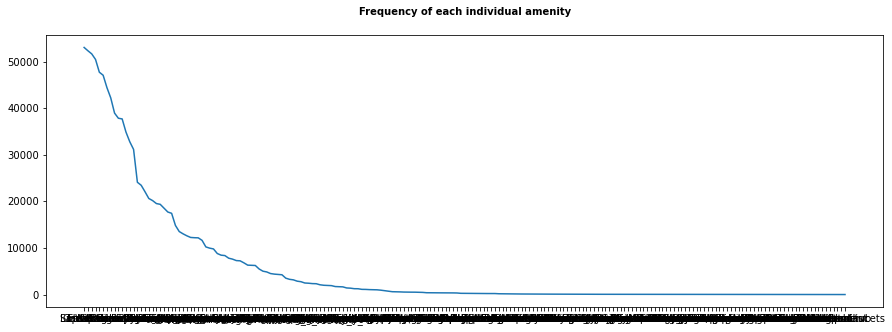

In [98]:
amenities_df = amenities_df.sort_values(by = 'amenities_count_list', ascending = False)



fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(amenities_df['unique amenities'], amenities_df['amenities_count_list'])
plt.title('Frequency of each individual amenity', fontsize=10, fontweight='bold', pad=20)


plt.show()

It could be possible to check via regression the individual *price premium* of each single amenity and whether it is statistically significant (a standard amenity like a toilet may not be, a whirlpool rather), but doing so would be a lot of work considering the 201 dummy variables and further work with the calculated factors from the regression. Another possibility could be to use each dummy and the respective `amenities_count` value as a regression, but doing 201 regressions and extracting their outputs seems also a bit expensive. NLP models should promise a better result for less work and they are needed for other text variables anyway.

## Generate word count features of text features

The number of words in text features and the number of amenities in `amenities` can be used as a possible indicator of quality. For example, a listing with a long description might offer more than one with a short description. Also, a longer list of amenities might offer more and possibly "better" ones than a short list, as value-giving amenities are expected to be rather in a long than a short list. Therefore, each text feature receives a respective count feature. 

In [99]:
def generate_amenities_count(input_df, output_df, feature = 'amenities_cleaned'):
    amenities_count = []
    for list in input_df[feature]:
        amenities_count.append(len(list))
    output_df[feature + '_count'] = amenities_count

In [100]:
#count amenities
generate_amenities_count(train_text, train_tabular)
generate_amenities_count(test_text, test_tabular)

In [101]:
#get an exception for amenities, count words and fill missing values with 0
def get_count(input_df, output_df): 
    for column in input_df:
        output_df[column + '_count'] = input_df[column].apply(lambda x: len(str(x).split()))
        output_df[column + '_count'].fillna(0, inplace=True)

        

get_count(train_text.drop('amenities_cleaned', axis = 1), train_tabular)
get_count(test_text.drop('amenities_cleaned', axis = 1), test_tabular)

In [102]:
train_tabular

host_total_listings_count  latitude  longitude  accommodates  \
listing_id                                                                 
9Q1RD6H7IO                        1.0  51.47457   -0.01062             2   
6XDPZPGLSR                        1.0  51.58329   -0.12416             2   
SND9OPN6IY                        2.0  51.41634   -0.18567             5   
SE3B7BXN9G                        1.0  51.45622   -0.14137             1   
E0C82VK0VF                        2.0  51.48114   -0.11219             3   
...                               ...       ...        ...           ...   
HSY40NEHOI                        2.0  51.47078   -0.10048             2   
XZXB1NS63Y                        1.0  51.53341   -0.00913             2   
Z2T8G6D82D                        4.0  51.57463   -0.14177             7   
8B1Q8UJWLH                        1.0  51.56586   -0.10193             2   
BKSRYBXCFL                        2.0  51.48549   -0.26685             2   

            bathrooms  bedrooms  beds  price  guests_included  \
listing_id                                                      
9Q1RD6H7IO        1.0       1.0   1.0   35.0                1   
6XDPZPGLSR        1.0       1.0   1.0   75.0                2   
SND9OPN6IY        1.0       1.0   2.0  120.0                2   
SE3B7BXN9G        1.0       1.0   1.0   50.0                1   
E0C82VK0VF        1.0       2.0   2.0  104.0                1   
...               ...       ...   ...    ...              ...   
HSY40NEHOI        1.0       1.0   1.0   65.0                1   
XZXB1NS63Y        1.0       1.0   0.0   40.0                1   
Z2T8G6D82D        2.0       3.0   4.0   89.0                2   
8B1Q8UJWLH        1.0       1.0   1.0   80.0                2   
BKSRYBXCFL        1.0       1.0   1.0  110.0                1   

            review_scores_rating  review_scores_accuracy  \
listing_id                                                 
9Q1RD6H7IO                  95.0                    10.0   
6XDPZPGLSR                  99.0                    10.0   
SND9OPN6IY                  84.0                     9.0   
SE3B7BXN9G                  96.0                     6.0   
E0C82VK0VF                 100.0                    10.0   
...                          ...                     ...   
HSY40NEHOI                 100.0                    10.0   
XZXB1NS63Y                 100.0                    10.0   
Z2T8G6D82D                  96.0                    10.0   
8B1Q8UJWLH                  94.0                    10.0   
BKSRYBXCFL                 100.0                    10.0   

            review_scores_cleanliness  review_scores_checkin  \
listing_id                                                     
9Q1RD6H7IO                       10.0                   10.0   
6XDPZPGLSR                       10.0                   10.0   
SND9OPN6IY                        9.0                   10.0   
SE3B7BXN9G                        6.0                    6.0   
E0C82VK0VF                       10.0                   10.0   
...                               ...                    ...   
HSY40NEHOI                       10.0                   10.0   
XZXB1NS63Y                       10.0                   10.0   
Z2T8G6D82D                       10.0                   10.0   
8B1Q8UJWLH                       10.0                    9.0   
BKSRYBXCFL                       10.0                   10.0   

            review_scores_communication  review_scores_location  \
listing_id                                                        
9Q1RD6H7IO                         10.0                    10.0   
6XDPZPGLSR                         10.0                    10.0   
SND9OPN6IY                         10.0                     9.0   
SE3B7BXN9G                          6.0                     6.0   
E0C82VK0VF                         10.0                    10.0   
...                                 ...                     ...   
HSY40NEHOI                 

In [118]:
with open('train_tabular_no_text_pred.pickle', 'wb') as f:
    pickle.dump(train_tabular, f)


In [119]:
train_tabular = pd.read_pickle('train_tabular_no_text_pred.pickle')

In [120]:
with open('test_tabular_no_text_pred.pickle', 'wb') as f:
    pickle.dump(test_tabular, f)


In [121]:
test_tabular = pd.read_pickle('test_tabular_no_text_pred.pickle')

In [123]:
test_tabular

host_total_listings_count  latitude  longitude  accommodates  \
listing_id                                                                 
0FEMC4VA5U                        1.0  51.51837   -0.21065             2   
PQ2BYEO0QR                       14.0  51.51734   -0.19712             2   
3FP6WFHUBN                        1.0  51.54288   -0.14720             2   
GG0V2KDG90                        1.0  51.51159   -0.06358             1   
TZVVK4YSIO                        3.0  51.48379   -0.18498             3   
...                               ...       ...        ...           ...   
SCRJ69GZPK                        1.0  51.50031   -0.21055             8   
ILZN192SUC                        0.0  51.55838   -0.06695             2   
A44OQ7GPYY                       22.0  51.51378   -0.12772             4   
KZ742YLH4X                        1.0  51.52683   -0.07794             2   
YOCQ63ZYYD                        1.0  51.52935   -0.08729             2   

            bathrooms  bedrooms  beds  guests_included  review_scores_rating  \
listing_id                                                                     
0FEMC4VA5U        1.0       1.0   1.0                1                  96.0   
PQ2BYEO0QR        1.0       1.0   1.0                1                  97.0   
3FP6WFHUBN        2.5       1.0   1.0                1                  96.0   
GG0V2KDG90        1.5       1.0   1.0                1                  96.0   
TZVVK4YSIO        1.0       1.0   2.0                2                  98.0   
...               ...       ...   ...              ...                   ...   
SCRJ69GZPK        3.5       4.0   7.0                1                 100.0   
ILZN192SUC        1.5       1.0   1.0                1                  96.0   
A44OQ7GPYY        1.0       1.0   2.0                1                  89.0   
KZ742YLH4X        1.0       1.0   1.0                1                 100.0   
YOCQ63ZYYD        1.0       1.0   1.0                1                  97.0   

            review_scores_accuracy  review_scores_cleanliness  \
listing_id                                                      
0FEMC4VA5U                    10.0                       10.0   
PQ2BYEO0QR                    10.0                       10.0   
3FP6WFHUBN                     6.0                        6.0   
GG0V2KDG90                     6.0                        6.0   
TZVVK4YSIO                    10.0                       10.0   
...                            ...                        ...   
SCRJ69GZPK                    10.0                        9.0   
ILZN192SUC                     6.0                        6.0   
A44OQ7GPYY                     9.0                        9.0   
KZ742YLH4X                     8.0                       10.0   
YOCQ63ZYYD                    10.0                       10.0   

            review_scores_checkin  review_scores_communication  \
listing_id                                                       
0FEMC4VA5U                   10.0                         10.0   
PQ2BYEO0QR                   10.0                         10.0   
3FP6WFHUBN                    6.0                          6.0   
GG0V2KDG90                    6.0                          6.0   
TZVVK4YSIO                   10.0                         10.0   
...                           ...                          ...   
SCRJ69GZPK                   10.0                         10.0   
ILZN192SUC                    6.0                          6.0   
A44OQ7GPYY                   10.0                          9.0   
KZ742YLH4X                   10.0                         10.0   
YOCQ63ZYYD                   10.0                         10.0   

            review_scores_location  review_scores_value  reviews_per_month  \
listing_id                                                                   
0FEMC4VA5U                    10.0                 10.0               1.89   
PQ2BYEO0QR                    10.0         

In [141]:
name = pd.read_csv(r"C:\Users\Max\Documents\Master\Advanced Data Analytics for Management Support\Assignment/name.csv", 
                   sep = "\t")

In [146]:
name = pd.read_pickle('results_name.pickle')

In [147]:
name

host_total_listings_count  latitude  longitude  accommodates  \
listing_id                                                                 
31P8ZEKX27                       21.0  51.52613   -0.07430             2   
24DNWUU6G3                        2.0  51.52777   -0.04221             1   
7S2ZEJDSWI                        3.0  51.46181   -0.21230             2   
6FZVIK0V6L                        1.0  51.54286   -0.19467             1   
80BZSPZG79                       30.0  51.52292   -0.15980             6   
...                               ...       ...        ...           ...   
ZQEAHDQPCJ                        1.0  51.48871   -0.17310             2   
B2UQD1VE36                       36.0  51.51603   -0.06801             4   
IZ15QXOTRF                        1.0  51.50152   -0.06971             4   
0E8A1XGMKY                        1.0  51.53924   -0.29768             3   
SLNH9P2SCI                        1.0  51.43645   -0.16697             4   

            bathrooms  bedrooms  beds  price  guests_included  \
listing_id                                                      
31P8ZEKX27        1.0       1.0   1.0   49.0                1   
24DNWUU6G3        1.0       1.0   1.0   28.0                1   
7S2ZEJDSWI        1.0       1.0   1.0   45.0                1   
6FZVIK0V6L        1.0       1.0   1.0   50.0                1   
80BZSPZG79        1.0       2.0   2.0  225.0                4   
...               ...       ...   ...    ...              ...   
ZQEAHDQPCJ        1.0       1.0   1.0   88.0                1   
B2UQD1VE36        1.0       1.0   2.0   85.0                2   
IZ15QXOTRF        1.0       2.0   2.0   76.0                2   
0E8A1XGMKY        1.0       1.0   1.0   36.0                1   
SLNH9P2SCI        2.0       2.0   2.0  100.0                1   

            review_scores_rating  review_scores_accuracy  \
listing_id                                                 
31P8ZEKX27                  89.0                     9.0   
24DNWUU6G3                  94.0                    10.0   
7S2ZEJDSWI                 100.0                    10.0   
6FZVIK0V6L                  96.0                     6.0   
80BZSPZG79                  96.0                     6.0   
...                          ...                     ...   
ZQEAHDQPCJ                  83.0                     9.0   
B2UQD1VE36                  93.0                    10.0   
IZ15QXOTRF                  91.0                     9.0   
0E8A1XGMKY                  96.0                     6.0   
SLNH9P2SCI                 100.0                    10.0   

            review_scores_cleanliness  review_scores_checkin  \
listing_id                                                     
31P8ZEKX27                        9.0                    9.0   
24DNWUU6G3                       10.0                   10.0   
7S2ZEJDSWI                       10.0                   10.0   
6FZVIK0V6L                        6.0                    6.0   
80BZSPZG79                        6.0                    6.0   
...                               ...                    ...   
ZQEAHDQPCJ                        9.0                    9.0   
B2UQD1VE36                       10.0                   10.0   
IZ15QXOTRF                        9.0                    9.0   
0E8A1XGMKY                        6.0                    6.0   
SLNH9P2SCI                       10.0                   10.0   

            review_scores_communication  review_scores_location  \
listing_id                                                        
31P8ZEKX27                         10.0                    10.0   
24DNWUU6G3                         10.0                     9.0   
7S2ZEJDSWI                         10.0                    10.0   
6FZVIK0V6L                          6.0                     6.0   
80BZSPZG79                          6.0                     6.0   
...                                 ...                     ...   
ZQEAHDQPCJ                 

In [149]:
with open('train_text.pickle', 'wb') as f:
    pickle.dump(train_text, f)

In [150]:
with open('test_text.pickle', 'wb') as f:
    pickle.dump(test_text, f)

## Clean text features

In order to be put into a NLP-model, text data needs to be prepared. This in includes basic procedures like filling empty cells, but also more expensive ones like translating or spellchecking. These longer taking procedures are commented again, the transformed dataframes can be loaded with pickle.

In [103]:
train_text

name  \
listing_id                                                      
9Q1RD6H7IO                   Attic Room in historic Greenwich   
6XDPZPGLSR                Lovely Garden Studio Private Access   
SND9OPN6IY  Comfi apartment 2 close to wimbledon tennis court   
SE3B7BXN9G           Luxury room in the heart of London - SW4   
E0C82VK0VF        Excellent city Apartment with Private Patio   
...                                                       ...   
HSY40NEHOI     Brixton/Camberwell DBL bedroom, brand new flat   
XZXB1NS63Y  End suite with private bathroom. Close to the ...   
Z2T8G6D82D                   The place full of a good energy!   
8B1Q8UJWLH  Amazing 1BD apartment right next to Finsbury Park   
BKSRYBXCFL                   Serene Private Room with Ensuite   

                                                      summary  \
listing_id                                                      
9Q1RD6H7IO  The room does not have a door but its own disc...   
6XDPZPGLSR  Garden studio with private entrance, 5 minutes...   
SND9OPN6IY                                                NaN   
SE3B7BXN9G  Luxury first floor Victorian split level maiso...   
E0C82VK0VF  NEW luxury apartment, with private outside pat...   
...                                                       ...   
HSY40NEHOI  Large private double bedroom available in a br...   
XZXB1NS63Y                                                NaN   
Z2T8G6D82D  3 double bedroom APARTMENT for families and fr...   
8B1Q8UJWLH  This amazing 1 bed apartment offers an ideal b...   
BKSRYBXCFL  This spacious bedroom with its beautiful ensui...   

                                                        space  \
listing_id                                                      
9Q1RD6H7IO  Double room available in historic royal Greenw...   
6XDPZPGLSR  Beautiful studio with a king size bed, a sofa ...   
SND9OPN6IY                                                NaN   
SE3B7BXN9G  Your room will be fully furnished, and it will...   
E0C82VK0VF  A modern, well-equipped, cosy apartment close ...   
...                                                       ...   
HSY40NEHOI                                                NaN   
XZXB1NS63Y  Private end suite with smart TV and PlayStatio...   
Z2T8G6D82D  Warm, clean and safe, close to city atractions...   
8B1Q8UJWLH  Welcome to this modern and bright apartment in...   
BKSRYBXCFL  This beautiful bedroom has recently been refur...   

                                                  description  \
listing_id                                                      
9Q1RD6H7IO  The room does not have a door but its own disc...   
6XDPZPGLSR  Garden studio with private entrance, 5 minutes...   
SND9OPN6IY                                                NaN   
SE3B7BXN9G  Luxury first floor Victorian split level maiso...   
E0C82VK0VF  NEW luxury apartment, with private outside pat...   
...                                                       ...   
HSY40NEHOI  Large private double bedroom available in a br...   
XZXB1NS63Y  Private end suite with smart TV and PlayStatio...   
Z2T8G6D82D  3 double bedroom APARTMENT for families and fr...   
8B1Q8UJWLH  This amazing 1 bed apartment offers an ideal b...   
BKSRYBXCFL  This spacious bedroom with its beautiful ensui...   

                                        neighborhood_overview  \
listing_id                                                      
9Q1RD6H7IO                                                NaN   
6XDPZPGLSR  Crouch End is a very hip and friendly neighbou...   
SND9OPN6IY                                                NaN   
SE3B7BXN9G  Gail coffee shop, just round the corner as wel...   
E0C82VK0VF                                                NaN   
...                                                       ...   
HSY40NEHOI  Situated smack bang in the centre of south Lon...   
XZXB1NS63Y                                                NaN   
Z2T8G6D82D  Location, l

In [104]:
def text_fillna (df):
    for feature in df:
        df[feature].fillna('empty', inplace = True)
        df.loc[df[feature].str.len() < 3, feature] = df.loc[df[feature].str.len()< 3, feature].str.strip()

        df.loc[df[feature].str.len()< 2, feature] = 'empty' 



It is also important to fill not only cells empty punctuation marks, but also those empty of meaning. Detecting these cells is rather hard and may even be impossible to be done completely without removing meaning from other cells. The English language offers words short as up to only one character, as for example the word "I". This however is the only non-slang word consiting of only one letter. Cells with only one character or less can hence be treated as empty cells, as they are equivalently empty of meaning. Same goes for cells containing character less than 3 while including whitespaces, therefore the whitespaces are removes as well.

In [105]:
text_fillna(train_text)
text_fillna(test_text)
train_text

name  \
listing_id                                                      
9Q1RD6H7IO                   Attic Room in historic Greenwich   
6XDPZPGLSR                Lovely Garden Studio Private Access   
SND9OPN6IY  Comfi apartment 2 close to wimbledon tennis court   
SE3B7BXN9G           Luxury room in the heart of London - SW4   
E0C82VK0VF        Excellent city Apartment with Private Patio   
...                                                       ...   
HSY40NEHOI     Brixton/Camberwell DBL bedroom, brand new flat   
XZXB1NS63Y  End suite with private bathroom. Close to the ...   
Z2T8G6D82D                   The place full of a good energy!   
8B1Q8UJWLH  Amazing 1BD apartment right next to Finsbury Park   
BKSRYBXCFL                   Serene Private Room with Ensuite   

                                                      summary  \
listing_id                                                      
9Q1RD6H7IO  The room does not have a door but its own disc...   
6XDPZPGLSR  Garden studio with private entrance, 5 minutes...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Luxury first floor Victorian split level maiso...   
E0C82VK0VF  NEW luxury apartment, with private outside pat...   
...                                                       ...   
HSY40NEHOI  Large private double bedroom available in a br...   
XZXB1NS63Y                                              empty   
Z2T8G6D82D  3 double bedroom APARTMENT for families and fr...   
8B1Q8UJWLH  This amazing 1 bed apartment offers an ideal b...   
BKSRYBXCFL  This spacious bedroom with its beautiful ensui...   

                                                        space  \
listing_id                                                      
9Q1RD6H7IO  Double room available in historic royal Greenw...   
6XDPZPGLSR  Beautiful studio with a king size bed, a sofa ...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Your room will be fully furnished, and it will...   
E0C82VK0VF  A modern, well-equipped, cosy apartment close ...   
...                                                       ...   
HSY40NEHOI                                              empty   
XZXB1NS63Y  Private end suite with smart TV and PlayStatio...   
Z2T8G6D82D  Warm, clean and safe, close to city atractions...   
8B1Q8UJWLH  Welcome to this modern and bright apartment in...   
BKSRYBXCFL  This beautiful bedroom has recently been refur...   

                                                  description  \
listing_id                                                      
9Q1RD6H7IO  The room does not have a door but its own disc...   
6XDPZPGLSR  Garden studio with private entrance, 5 minutes...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Luxury first floor Victorian split level maiso...   
E0C82VK0VF  NEW luxury apartment, with private outside pat...   
...                                                       ...   
HSY40NEHOI  Large private double bedroom available in a br...   
XZXB1NS63Y  Private end suite with smart TV and PlayStatio...   
Z2T8G6D82D  3 double bedroom APARTMENT for families and fr...   
8B1Q8UJWLH  This amazing 1 bed apartment offers an ideal b...   
BKSRYBXCFL  This spacious bedroom with its beautiful ensui...   

                                        neighborhood_overview  \
listing_id                                                      
9Q1RD6H7IO                                              empty   
6XDPZPGLSR  Crouch End is a very hip and friendly neighbou...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Gail coffee shop, just round the corner as wel...   
E0C82VK0VF                                              empty   
...                                                       ...   
HSY40NEHOI  Situated smack bang in the centre of south Lon...   
XZXB1NS63Y                                              empty   
Z2T8G6D82D  Location, l

NLP models can process text, but not integers. Written text however contains integers frequently and so does the dataset at hand. In order to minimize the loss of information, numbers are written out by using the below function.

In [106]:
def numbers_to_words (df):
    for feature in df:
        list_=[]
        for text in df[feature].apply(str): #convert numbers to words
            list_.append(re.sub('\d+', lambda x: str(' ' + num2word.word(int(x.group(0))) + ' ') , text))
        df[feature] = list_
        



In [107]:
numbers_to_words(train_text)
numbers_to_words(test_text)
train_text

name  \
listing_id                                                      
9Q1RD6H7IO                   Attic Room in historic Greenwich   
6XDPZPGLSR                Lovely Garden Studio Private Access   
SND9OPN6IY  Comfi apartment  Two  close to wimbledon tenni...   
SE3B7BXN9G      Luxury room in the heart of London - SW Four    
E0C82VK0VF        Excellent city Apartment with Private Patio   
...                                                       ...   
HSY40NEHOI     Brixton/Camberwell DBL bedroom, brand new flat   
XZXB1NS63Y  End suite with private bathroom. Close to the ...   
Z2T8G6D82D                   The place full of a good energy!   
8B1Q8UJWLH  Amazing  One BD apartment right next to Finsbu...   
BKSRYBXCFL                   Serene Private Room with Ensuite   

                                                      summary  \
listing_id                                                      
9Q1RD6H7IO  The room does not have a door but its own disc...   
6XDPZPGLSR  Garden studio with private entrance,  Five  mi...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Luxury first floor Victorian split level maiso...   
E0C82VK0VF  NEW luxury apartment, with private outside pat...   
...                                                       ...   
HSY40NEHOI  Large private double bedroom available in a br...   
XZXB1NS63Y                                              empty   
Z2T8G6D82D   Three  double bedroom APARTMENT for families ...   
8B1Q8UJWLH  This amazing  One  bed apartment offers an ide...   
BKSRYBXCFL  This spacious bedroom with its beautiful ensui...   

                                                        space  \
listing_id                                                      
9Q1RD6H7IO  Double room available in historic royal Greenw...   
6XDPZPGLSR  Beautiful studio with a king size bed, a sofa ...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Your room will be fully furnished, and it will...   
E0C82VK0VF  A modern, well-equipped, cosy apartment close ...   
...                                                       ...   
HSY40NEHOI                                              empty   
XZXB1NS63Y  Private end suite with smart TV and PlayStatio...   
Z2T8G6D82D  Warm, clean and safe, close to city atractions...   
8B1Q8UJWLH  Welcome to this modern and bright apartment in...   
BKSRYBXCFL  This beautiful bedroom has recently been refur...   

                                                  description  \
listing_id                                                      
9Q1RD6H7IO  The room does not have a door but its own disc...   
6XDPZPGLSR  Garden studio with private entrance,  Five  mi...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Luxury first floor Victorian split level maiso...   
E0C82VK0VF  NEW luxury apartment, with private outside pat...   
...                                                       ...   
HSY40NEHOI  Large private double bedroom available in a br...   
XZXB1NS63Y  Private end suite with smart TV and PlayStatio...   
Z2T8G6D82D   Three  double bedroom APARTMENT for families ...   
8B1Q8UJWLH  This amazing  One  bed apartment offers an ide...   
BKSRYBXCFL  This spacious bedroom with its beautiful ensui...   

                                        neighborhood_overview  \
listing_id                                                      
9Q1RD6H7IO                                              empty   
6XDPZPGLSR  Crouch End is a very hip and friendly neighbou...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Gail coffee shop, just round the corner as wel...   
E0C82VK0VF                                              empty   
...                                                       ...   
HSY40NEHOI  Situated smack bang in the centre of south Lon...   
XZXB1NS63Y                                              empty   
Z2T8G6D82D  Location, l

While the NLP model to be used needs punctuation in order to tokenize the text appropriately in detecting when a sentence starts and end, cells containing only non-alphanumeric characters and / or only whitespace cause problems when translating and spellchecking the text, which needs to be done before modeling. Removing these problem-causing cells without removing meaning from others is challenging, if not even impossible to do in general. The function below was accustomed to the train and test dataset to have their error causing cells all removed.

In [108]:
def delete_punctuation(df): 
     for feature in df:
        list_=[]
        
        #'´' not contained in string
        df[feature] = df[feature].replace('´', ' ') 
        
        #delete double non-alphanumeric character (uncommon in standard English)
        for text in df[feature].apply(str): 
            list_.append(re.sub('['+string.punctuation+']''['+string.punctuation+']', ' ', text))
        list2=[]
        
        #delete whitespace in front of a non-alphanumeric character
        for text in list_: 
            list2.append(re.sub('[^a-zA-Z:]''['+string.punctuation+']', ' ', text))
        
        df[feature] = list2


In [109]:
delete_punctuation(train_text)
delete_punctuation(test_text)
train_text

name  \
listing_id                                                      
9Q1RD6H7IO                   Attic Room in historic Greenwich   
6XDPZPGLSR                Lovely Garden Studio Private Access   
SND9OPN6IY  Comfi apartment  Two  close to wimbledon tenni...   
SE3B7BXN9G       Luxury room in the heart of London  SW Four    
E0C82VK0VF        Excellent city Apartment with Private Patio   
...                                                       ...   
HSY40NEHOI     Brixton/Camberwell DBL bedroom, brand new flat   
XZXB1NS63Y  End suite with private bathroom. Close to the ...   
Z2T8G6D82D                   The place full of a good energy!   
8B1Q8UJWLH  Amazing  One BD apartment right next to Finsbu...   
BKSRYBXCFL                   Serene Private Room with Ensuite   

                                                      summary  \
listing_id                                                      
9Q1RD6H7IO  The room does not have a door but its own disc...   
6XDPZPGLSR  Garden studio with private entrance,  Five  mi...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Luxury first floor Victorian split level maiso...   
E0C82VK0VF  NEW luxury apartment, with private outside pat...   
...                                                       ...   
HSY40NEHOI  Large private double bedroom available in a br...   
XZXB1NS63Y                                              empty   
Z2T8G6D82D   Three  double bedroom APARTMENT for families ...   
8B1Q8UJWLH  This amazing  One  bed apartment offers an ide...   
BKSRYBXCFL  This spacious bedroom with its beautiful ensui...   

                                                        space  \
listing_id                                                      
9Q1RD6H7IO  Double room available in historic royal Greenw...   
6XDPZPGLSR  Beautiful studio with a king size bed, a sofa ...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Your room will be fully furnished, and it will...   
E0C82VK0VF  A modern, well-equipped, cosy apartment close ...   
...                                                       ...   
HSY40NEHOI                                              empty   
XZXB1NS63Y  Private end suite with smart TV and PlayStatio...   
Z2T8G6D82D  Warm, clean and safe, close to city atractions...   
8B1Q8UJWLH  Welcome to this modern and bright apartment in...   
BKSRYBXCFL  This beautiful bedroom has recently been refur...   

                                                  description  \
listing_id                                                      
9Q1RD6H7IO  The room does not have a door but its own disc...   
6XDPZPGLSR  Garden studio with private entrance,  Five  mi...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Luxury first floor Victorian split level maiso...   
E0C82VK0VF  NEW luxury apartment, with private outside pat...   
...                                                       ...   
HSY40NEHOI  Large private double bedroom available in a br...   
XZXB1NS63Y  Private end suite with smart TV and PlayStatio...   
Z2T8G6D82D   Three  double bedroom APARTMENT for families ...   
8B1Q8UJWLH  This amazing  One  bed apartment offers an ide...   
BKSRYBXCFL  This spacious bedroom with its beautiful ensui...   

                                        neighborhood_overview  \
listing_id                                                      
9Q1RD6H7IO                                              empty   
6XDPZPGLSR  Crouch End is a very hip and friendly neighbou...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Gail coffee shop, just round the corner as wel...   
E0C82VK0VF                                              empty   
...                                                       ...   
HSY40NEHOI  Situated smack bang in the centre of south Lon...   
XZXB1NS63Y                                              empty   
Z2T8G6D82D  Location, l

By now, whitespaces have been inserted left and right everytime a string was removed in order to ensure words not to become one. These blow up the length of a cell, making a meaningless cell containing only a letter not be removed by the earlier defined function. Multiple space is therefore removed by the following function.

In [110]:
def remove_multiple_space(df):
     for feature in df:
        list_=[]
        
        #remove all series of whitespace and replace it with a single one
        for text in df[feature].apply(str):
            list_.append(re.sub(' +', ' ', text))
        df[feature] = list_

In [111]:
remove_multiple_space(train_text)
remove_multiple_space(test_text)
train_text

name  \
listing_id                                                      
9Q1RD6H7IO                   Attic Room in historic Greenwich   
6XDPZPGLSR                Lovely Garden Studio Private Access   
SND9OPN6IY  Comfi apartment Two close to wimbledon tennis ...   
SE3B7BXN9G        Luxury room in the heart of London SW Four    
E0C82VK0VF        Excellent city Apartment with Private Patio   
...                                                       ...   
HSY40NEHOI     Brixton/Camberwell DBL bedroom, brand new flat   
XZXB1NS63Y  End suite with private bathroom. Close to the ...   
Z2T8G6D82D                   The place full of a good energy!   
8B1Q8UJWLH  Amazing One BD apartment right next to Finsbur...   
BKSRYBXCFL                   Serene Private Room with Ensuite   

                                                      summary  \
listing_id                                                      
9Q1RD6H7IO  The room does not have a door but its own disc...   
6XDPZPGLSR  Garden studio with private entrance, Five minu...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Luxury first floor Victorian split level maiso...   
E0C82VK0VF  NEW luxury apartment, with private outside pat...   
...                                                       ...   
HSY40NEHOI  Large private double bedroom available in a br...   
XZXB1NS63Y                                              empty   
Z2T8G6D82D   Three double bedroom APARTMENT for families a...   
8B1Q8UJWLH  This amazing One bed apartment offers an ideal...   
BKSRYBXCFL  This spacious bedroom with its beautiful ensui...   

                                                        space  \
listing_id                                                      
9Q1RD6H7IO  Double room available in historic royal Greenw...   
6XDPZPGLSR  Beautiful studio with a king size bed, a sofa ...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Your room will be fully furnished, and it will...   
E0C82VK0VF  A modern, well-equipped, cosy apartment close ...   
...                                                       ...   
HSY40NEHOI                                              empty   
XZXB1NS63Y  Private end suite with smart TV and PlayStatio...   
Z2T8G6D82D  Warm, clean and safe, close to city atractions...   
8B1Q8UJWLH  Welcome to this modern and bright apartment in...   
BKSRYBXCFL  This beautiful bedroom has recently been refur...   

                                                  description  \
listing_id                                                      
9Q1RD6H7IO  The room does not have a door but its own disc...   
6XDPZPGLSR  Garden studio with private entrance, Five minu...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Luxury first floor Victorian split level maiso...   
E0C82VK0VF  NEW luxury apartment, with private outside pat...   
...                                                       ...   
HSY40NEHOI  Large private double bedroom available in a br...   
XZXB1NS63Y  Private end suite with smart TV and PlayStatio...   
Z2T8G6D82D   Three double bedroom APARTMENT for families a...   
8B1Q8UJWLH  This amazing One bed apartment offers an ideal...   
BKSRYBXCFL  This spacious bedroom with its beautiful ensui...   

                                        neighborhood_overview  \
listing_id                                                      
9Q1RD6H7IO                                              empty   
6XDPZPGLSR  Crouch End is a very hip and friendly neighbou...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Gail coffee shop, just round the corner as wel...   
E0C82VK0VF                                              empty   
...                                                       ...   
HSY40NEHOI  Situated smack bang in the centre of south Lon...   
XZXB1NS63Y                                              empty   
Z2T8G6D82D  Location, l

To insure meaningless cells are filled out (in this example primarily cells containing non-alphanumeric strings and whitespace in all different combinations), the delete_punctuation function is used once more and followed by the text_fillna function to fill out new empty cells.

In [112]:
delete_punctuation(train_text)
delete_punctuation(test_text)
train_text

name  \
listing_id                                                      
9Q1RD6H7IO                   Attic Room in historic Greenwich   
6XDPZPGLSR                Lovely Garden Studio Private Access   
SND9OPN6IY  Comfi apartment Two close to wimbledon tennis ...   
SE3B7BXN9G        Luxury room in the heart of London SW Four    
E0C82VK0VF        Excellent city Apartment with Private Patio   
...                                                       ...   
HSY40NEHOI     Brixton/Camberwell DBL bedroom, brand new flat   
XZXB1NS63Y  End suite with private bathroom. Close to the ...   
Z2T8G6D82D                   The place full of a good energy!   
8B1Q8UJWLH  Amazing One BD apartment right next to Finsbur...   
BKSRYBXCFL                   Serene Private Room with Ensuite   

                                                      summary  \
listing_id                                                      
9Q1RD6H7IO  The room does not have a door but its own disc...   
6XDPZPGLSR  Garden studio with private entrance, Five minu...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Luxury first floor Victorian split level maiso...   
E0C82VK0VF  NEW luxury apartment, with private outside pat...   
...                                                       ...   
HSY40NEHOI  Large private double bedroom available in a br...   
XZXB1NS63Y                                              empty   
Z2T8G6D82D   Three double bedroom APARTMENT for families a...   
8B1Q8UJWLH  This amazing One bed apartment offers an ideal...   
BKSRYBXCFL  This spacious bedroom with its beautiful ensui...   

                                                        space  \
listing_id                                                      
9Q1RD6H7IO  Double room available in historic royal Greenw...   
6XDPZPGLSR  Beautiful studio with a king size bed, a sofa ...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Your room will be fully furnished, and it will...   
E0C82VK0VF  A modern, well-equipped, cosy apartment close ...   
...                                                       ...   
HSY40NEHOI                                              empty   
XZXB1NS63Y  Private end suite with smart TV and PlayStatio...   
Z2T8G6D82D  Warm, clean and safe, close to city atractions...   
8B1Q8UJWLH  Welcome to this modern and bright apartment in...   
BKSRYBXCFL  This beautiful bedroom has recently been refur...   

                                                  description  \
listing_id                                                      
9Q1RD6H7IO  The room does not have a door but its own disc...   
6XDPZPGLSR  Garden studio with private entrance, Five minu...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Luxury first floor Victorian split level maiso...   
E0C82VK0VF  NEW luxury apartment, with private outside pat...   
...                                                       ...   
HSY40NEHOI  Large private double bedroom available in a br...   
XZXB1NS63Y  Private end suite with smart TV and PlayStatio...   
Z2T8G6D82D   Three double bedroom APARTMENT for families a...   
8B1Q8UJWLH  This amazing One bed apartment offers an ideal...   
BKSRYBXCFL  This spacious bedroom with its beautiful ensui...   

                                        neighborhood_overview  \
listing_id                                                      
9Q1RD6H7IO                                              empty   
6XDPZPGLSR  Crouch End is a very hip and friendly neighbou...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Gail coffee shop, just round the corner as wel...   
E0C82VK0VF                                              empty   
...                                                       ...   
HSY40NEHOI  Situated smack bang in the centre of south Lon...   
XZXB1NS63Y                                              empty   
Z2T8G6D82D  Location, l

In [113]:
text_fillna(train_text)
text_fillna(test_text)
train_text

name  \
listing_id                                                      
9Q1RD6H7IO                   Attic Room in historic Greenwich   
6XDPZPGLSR                Lovely Garden Studio Private Access   
SND9OPN6IY  Comfi apartment Two close to wimbledon tennis ...   
SE3B7BXN9G        Luxury room in the heart of London SW Four    
E0C82VK0VF        Excellent city Apartment with Private Patio   
...                                                       ...   
HSY40NEHOI     Brixton/Camberwell DBL bedroom, brand new flat   
XZXB1NS63Y  End suite with private bathroom. Close to the ...   
Z2T8G6D82D                   The place full of a good energy!   
8B1Q8UJWLH  Amazing One BD apartment right next to Finsbur...   
BKSRYBXCFL                   Serene Private Room with Ensuite   

                                                      summary  \
listing_id                                                      
9Q1RD6H7IO  The room does not have a door but its own disc...   
6XDPZPGLSR  Garden studio with private entrance, Five minu...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Luxury first floor Victorian split level maiso...   
E0C82VK0VF  NEW luxury apartment, with private outside pat...   
...                                                       ...   
HSY40NEHOI  Large private double bedroom available in a br...   
XZXB1NS63Y                                              empty   
Z2T8G6D82D   Three double bedroom APARTMENT for families a...   
8B1Q8UJWLH  This amazing One bed apartment offers an ideal...   
BKSRYBXCFL  This spacious bedroom with its beautiful ensui...   

                                                        space  \
listing_id                                                      
9Q1RD6H7IO  Double room available in historic royal Greenw...   
6XDPZPGLSR  Beautiful studio with a king size bed, a sofa ...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Your room will be fully furnished, and it will...   
E0C82VK0VF  A modern, well-equipped, cosy apartment close ...   
...                                                       ...   
HSY40NEHOI                                              empty   
XZXB1NS63Y  Private end suite with smart TV and PlayStatio...   
Z2T8G6D82D  Warm, clean and safe, close to city atractions...   
8B1Q8UJWLH  Welcome to this modern and bright apartment in...   
BKSRYBXCFL  This beautiful bedroom has recently been refur...   

                                                  description  \
listing_id                                                      
9Q1RD6H7IO  The room does not have a door but its own disc...   
6XDPZPGLSR  Garden studio with private entrance, Five minu...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Luxury first floor Victorian split level maiso...   
E0C82VK0VF  NEW luxury apartment, with private outside pat...   
...                                                       ...   
HSY40NEHOI  Large private double bedroom available in a br...   
XZXB1NS63Y  Private end suite with smart TV and PlayStatio...   
Z2T8G6D82D   Three double bedroom APARTMENT for families a...   
8B1Q8UJWLH  This amazing One bed apartment offers an ideal...   
BKSRYBXCFL  This spacious bedroom with its beautiful ensui...   

                                        neighborhood_overview  \
listing_id                                                      
9Q1RD6H7IO                                              empty   
6XDPZPGLSR  Crouch End is a very hip and friendly neighbou...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Gail coffee shop, just round the corner as wel...   
E0C82VK0VF                                              empty   
...                                                       ...   
HSY40NEHOI  Situated smack bang in the centre of south Lon...   
XZXB1NS63Y                                              empty   
Z2T8G6D82D  Location, l

Last, since cleaned amenities are used as a text-feature, a cell should contain a string rather than a list of strings. The elements making it a list are removed, leaving a list-like ready-to-go string in each cell.

In [114]:
train_text['amenities_cleaned'] = train_text['amenities_cleaned'].replace('[', '')
train_text['amenities_cleaned'] = train_text['amenities_cleaned'].replace(']', '')

In [115]:
test_text['amenities_cleaned'] = test_text['amenities_cleaned'].replace('[', '')
test_text['amenities_cleaned'] = test_text['amenities_cleaned'].replace(']', '')

### Language Detection

Before translating the text, it might be interesting to know if the language of a listing is affecting the price. Defining the language of a listing is not easy, since colums of a listing seem to be not necessarily in one language only. Continuing on my hypothesis of AirBnB translating certain parts of the listing automatically, I define a listing to be not in English if at least one column in a row is not in English. This definition builds on the assumption, that longer columns like `summary` or `description` should be the ones happening to be in another language rather than eg. `name`. It also builds on the assumption that a customer might be affected in her willingness to pay by the language used in the listing, as after all the task is to predict a price using relevant features.

Inspired by `deep_translator`'s `batch_detection`, I defined my own function which returns a 1 if at least one element in a series is deteced as non-English and a 0 if all elements are in English. The reason why I defined my own function is because deep_translator requires a personal API to use Google Translator's language detection, and this in turn does not allow it to have it used to often in a short timeframe. I will therefore use `langid` for detecting the language inside my own defined function.

In [116]:
#define function which returns the list of all languages per element
def own_batch_detection(list_):
    output_=[]
    for element in list_:
        output_.append(langid.classify(element)[0])
    return output_

In [117]:
def new_dec_test(input_):
    #transform the dataframe row to a list
    languages=own_batch_detection(input_.values.ravel().tolist()) 
    #return 1 if a language different than 'en' is contained, else 0
    if  True in (ele !='en' for ele in languages):
        output = 1
    else:
        output= 0
    return output

In [106]:
own_batch_detection(train_text.loc[['WKIUKOS5BJ']].values.ravel().tolist())

['en', 'es', 'en', 'es', 'en', 'en', 'en', 'en']

In [107]:
new_dec_test(train_text.loc[['WKIUKOS5BJ']])

1

In [108]:
#train_tabular['non_en'] = train_text.progress_apply(new_dec_test, axis=1)


In [109]:
#with open('train_non_en.pickle', 'wb') as f:
#    pickle.dump(train_tabular['non_en'], f)
train_tabular['non_en'] = pd.read_pickle('train_non_en.pickle')

In [110]:
#number of non_English listings
train_tabular['non_en'].sum()

12013

In [111]:
#test_tabular['non_en'] = test_tabular.progress_apply(new_dec_test, axis=1)


In [112]:
#with open('test_non_en.pickle', 'wb') as f:
#    pickle.dump(test_tabular['non_en'], f)

In [113]:
test_tabular['non_en'] = pd.read_pickle('test_non_en.pickle')

In [114]:
#number of non_English listings
test_tabular['non_en'].sum()

6358

In [115]:
#example of non-English listing
train_text.loc[['WKIUKOS5BJ']]

name  \
listing_id                           
WKIUKOS5BJ  Nice apartment Chelsea   

                                                      summary  space  \
listing_id                                                             
WKIUKOS5BJ  Nos encontramos con este precioso apartamento ...  empty   

                                                  description  \
listing_id                                                      
WKIUKOS5BJ  Nos encontramos con este precioso apartamento ...   

           neighborhood_overview transit house_rules  \
listing_id                                             
WKIUKOS5BJ                 empty   empty       empty   

                                            amenities_cleaned  
listing_id                                                     
WKIUKOS5BJ   TV Internet Wifi Air conditioning Kitchen Hea...

In [116]:
#detection
new_dec_test(train_text.loc[['WKIUKOS5BJ']]) 

1

In [117]:
#indices of all non-English listings
non_en_listings=train_tabular['non_en'].loc[train_tabular['non_en'] ==1].index

In [118]:
non_en_listings.tolist()

['6XDPZPGLSR',
 'MJJG3JOEYC',
 'DPLUJLHNCB',
 'EQVVBKKAGJ',
 'HUQL7SD2IJ',
 'FR8F57GPI0',
 '2RIBQN805V',
 'XU8TRFMZIF',
 'JMJZE6PH6F',
 'F1ZEDI346U',
 'IFSRRRQ1CE',
 'LCVHSJLSFC',
 'P96NGJR9DV',
 'KY7B5CMV2L',
 '77LUXW22R5',
 'H69BQMU6T8',
 'LR7CMYLY54',
 '8Y9MIU673I',
 '3KWAUE0AJW',
 'Y1CC7SZ6O0',
 '16IU91IVVP',
 'TMSV81V1DV',
 '96MSB3XHAU',
 'E6XKP5TSZO',
 '3P78HTTW0Q',
 'JETX757OIR',
 '7SY6SXC73P',
 '7XSRD5UP87',
 'PBEE97ZDOU',
 'DADJ9OBMLM',
 'T5CUJCGEN0',
 'EEY7S4JRYF',
 'OXRCIGAQM6',
 'CP3CNMIF01',
 'UMSVKTLEWU',
 'QC8UIEV18H',
 '1W2VFWA78M',
 '7IK4GH1ZT2',
 '24Z074FN7S',
 '0XHZW917JO',
 'YMN4LYKH4W',
 '2U0LZEXISL',
 'D6KYS1KKQM',
 '99UO85R8YA',
 '5UHO94W7RR',
 '6HOKEYYIHM',
 '3YX8HQQ5DN',
 '805HRROZXY',
 '4GES61KLK2',
 '0QDS1S8ETB',
 '5HPE6HIWAZ',
 'B9EFT750RF',
 '8GZA7TQYXS',
 'KKILS1KCDP',
 'W6OGYCCVR4',
 'BMZQLTTJST',
 'L0EAUI2QX9',
 'BQD8VZZVQ9',
 'DPXRS5AOPK',
 'V820WPWGIH',
 '2TMHQV13KS',
 'PQ85RFEYGE',
 'PCD8AYMEM7',
 'DRGAEG7TBU',
 '6QXWP9V8K8',
 'W3JPZSVXKV',
 'T4R5FI4M

In [119]:
train_text.loc[non_en_listings.tolist()]

name  \
listing_id                                                      
6XDPZPGLSR                Lovely Garden Studio Private Access   
MJJG3JOEYC                   Two Bedroom Duplex With Terraces   
DPLUJLHNCB                 Stylish, comfortable flat for Two    
EQVVBKKAGJ  Park Views Two BD Apt in Victorian Villa nr Br...   
HUQL7SD2IJ                          Holmdale House Suite Six    
...                                                       ...   
YDRM30XEAG                         Perfect cozy london studio   
3O68WRJ7V9                Little studio in Shoreditch/Dalston   
SPCNFIJREV         Large Boutique Double Room Near Shoreditch   
OGM4XZ1K4W                                          Spa Green   
HSY40NEHOI     Brixton/Camberwell DBL bedroom, brand new flat   

                                                      summary  \
listing_id                                                      
6XDPZPGLSR  Garden studio with private entrance, Five minu...   
MJJG3JOEYC  Luxurious, two double bedroom apartment situat...   
DPLUJLHNCB  A stylishly furnished flat with one double bed...   
EQVVBKKAGJ  We want your stay in our apartment to feel lik...   
HUQL7SD2IJ  Quiet self catering ground floor studio with k...   
...                                                       ...   
YDRM30XEAG  Cozy studio with fridge microwave and washing ...   
3O68WRJ7V9  Small, cute, artsy, unpretentious basement stu...   
SPCNFIJREV  Large Double Room in a second floor flat close...   
OGM4XZ1K4W  Hey, We're a couple in central London and this...   
HSY40NEHOI  Large private double bedroom available in a br...   

                                                        space  \
listing_id                                                      
6XDPZPGLSR  Beautiful studio with a king size bed, a sofa ...   
MJJG3JOEYC  Luxurious Development Great Location Split Lev...   
DPLUJLHNCB  My flat is my pride and joy so please treat it...   
EQVVBKKAGJ  Great space for four guests to enjoy their sta...   
HUQL7SD2IJ  There are no gas appliances in this studio hen...   
...                                                       ...   
YDRM30XEAG  Comfortable bed set your own temperature with ...   
3O68WRJ7V9                                              empty   
SPCNFIJREV                                              empty   
OGM4XZ1K4W                                              empty   
HSY40NEHOI                                              empty   

                                                  description  \
listing_id                                                      
6XDPZPGLSR  Garden studio with private entrance, Five minu...   
MJJG3JOEYC  Luxurious, two double bedroom apartment situat...   
DPLUJLHNCB  A stylishly furnished flat with one double bed...   
EQVVBKKAGJ  We want your stay in our apartment to feel lik...   
HUQL7SD2IJ  Quiet self catering ground floor studio with k...   
...                                                       ...   
YDRM30XEAG  Cozy studio with fridge microwave and washing ...   
3O68WRJ7V9  Small, cute, artsy, unpretentious basement stu...   
SPCNFIJREV  Large Double Room in a second floor flat close...   
OGM4XZ1K4W  Hey, We're a couple in central London and this...   
HSY40NEHOI  Large private double bedroom available in a br...   

                                        neighborhood_overview  \
listing_id                                                      
6XDPZPGLSR  Crouch End is a very hip and friendly neighbou...   
MJJG3JOEYC                                              empty   
DPLUJLHNCB  My flat is on a beautifully well maintained es...   
EQVVBKKAGJ  Brixton embraces its unapologetically unpolish...   
HUQL7SD2IJ  West Hampstead is a beautiful area with a love...   
...                                                       ...   
YDRM30XEAG  Supermarket pharmacy restaurants and coffee sh...   
3O68WRJ7V9  Unbeatable location. Ideally located between b...   
SPCNFIJREV  Quite and v

This is odd, all visible listings are entirely in English, yet still they are detected as non-English. It is a common phenomen for language detectors to make wrong detections, especially if the text is rather short. I tried out all language detectors in python I could find and can ensure that this is the best one for this task, a performance like this is therefore disappointing.

Analyzing this case in more detail, I found that at least the non-English listing spotted earlier is contained in this dataframe. What's more puzzling however is that all listings visible above have the column `neighborhood_overview` detected as German while the text inside is more than clearly in English. Detecting the language of the cell alone in turn yields a correct detection. What is even more puzzling is that the classification of a listing does not change when applying `new_dec_test` on a row with `neighborhood_overview` dropped, even though an individual treatment of the cell yields a list containing 'en' only.

As I could not find a solution for this issue, I will have to accept this new biased feature. It may still be of use depending on the ratio of real non-English listings and falsely classified non-English listings as well as whether the language of a listing does even have an impact on the price. Feature Assessment at a later part of this paper will give the answer to this.

In [120]:
#non-English listing
train_text.loc[non_en_listings.tolist()].loc['WKIUKOS5BJ']

name                                                Nice apartment Chelsea
summary                  Nos encontramos con este precioso apartamento ...
space                                                                empty
description              Nos encontramos con este precioso apartamento ...
neighborhood_overview                                                empty
transit                                                              empty
house_rules                                                          empty
amenities_cleaned         TV Internet Wifi Air conditioning Kitchen Hea...
Name: WKIUKOS5BJ, dtype: object

In [121]:
#English listing falsely classified
new_dec_test(train_text.loc[['6XDPZPGLSR']]) 

1

In [122]:
#list of detected languages with the fifth one being the language for neighborhood_overview
own_batch_detection(train_text.loc[['6XDPZPGLSR']])

['en', 'en', 'en', 'en', 'de', 'en', 'en', 'en']

In [123]:
#list of detected languages for non-English listing
own_batch_detection(train_text.loc[['WKIUKOS5BJ']])

['en', 'en', 'en', 'en', 'de', 'en', 'en', 'en']

In [124]:
#classification when neighborhood_overview is dropped for non-English listing
new_dec_test(train_text.drop('neighborhood_overview', axis=1).loc[['WKIUKOS5BJ']])

1

In [125]:
#language classification of English neighborhood_overview text for non-English listing
langid.classify(train_text.loc[['WKIUKOS5BJ']].values.ravel().tolist()[4])

('en', 9.061840057373047)

In [126]:
#language classification of neighborhood_overview text for English listing
langid.classify(train_text.loc[['BKSRYBXCFL']].values.ravel()[4])

('en', -1274.8439853191376)

### Translation

As I had the impression that `deep_translator` is the library with the best language detection and translation results, I will use its `GoogleTranslator` for translating the dataframe. I rely on its automatic language detection rather than using the biased results from previous language detection which did not allow to use the detector from this library.

In [127]:
def translate_df(df):
    for feature in df:
        df[feature] = df[feature].apply(GoogleTranslator(source='auto', target = 'english').translate)



In [128]:
#translate_df(train_text)
#translate_df(test_text)


In [129]:
#check again the spotted non-English listing
train_text.loc[['WKIUKOS5BJ']]

name  \
listing_id                           
WKIUKOS5BJ  Nice apartment Chelsea   

                                                      summary  space  \
listing_id                                                             
WKIUKOS5BJ  Nos encontramos con este precioso apartamento ...  empty   

                                                  description  \
listing_id                                                      
WKIUKOS5BJ  Nos encontramos con este precioso apartamento ...   

           neighborhood_overview transit house_rules  \
listing_id                                             
WKIUKOS5BJ                 empty   empty       empty   

                                            amenities_cleaned  
listing_id                                                     
WKIUKOS5BJ   TV Internet Wifi Air conditioning Kitchen Hea...

In [130]:
#with open('train_text_translated_bert.pickle', 'wb') as f:
#    pickle.dump(train_text, f)


In [131]:
#with open('test_text_translated_bert.pickle', 'wb') as f:
#    pickle.dump(test_text, f)


In [132]:
train_text = pd.read_pickle('train_text_translated_bert.pickle')

In [133]:
train_text

name  \
listing_id                                                      
9Q1RD6H7IO                   Attic Room in historic Greenwich   
6XDPZPGLSR                Lovely Garden Studio Private Access   
SND9OPN6IY  Comfi apartment Two close to wimbledon tennis ...   
SE3B7BXN9G        Luxury room in the heart of London  SW Four   
E0C82VK0VF        Excellent city Apartment with Private Patio   
...                                                       ...   
HSY40NEHOI     Brixton/Camberwell DBL bedroom, brand new flat   
XZXB1NS63Y  End suite with private bathroom. Close to the ...   
Z2T8G6D82D                   The place full of a good energy!   
8B1Q8UJWLH  Amazing One BD apartment right next to Finsbur...   
BKSRYBXCFL                   Serene Private Room with Ensuite   

                                                      summary  \
listing_id                                                      
9Q1RD6H7IO  The room does not have a door but its own disc...   
6XDPZPGLSR  Garden studio with private entrance, Five minu...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Luxury first floor Victorian split level maiso...   
E0C82VK0VF  NEW luxury apartment, with private outside pat...   
...                                                       ...   
HSY40NEHOI  Large private double bedroom available in a br...   
XZXB1NS63Y                                              empty   
Z2T8G6D82D  Three double bedroom APARTMENT for families an...   
8B1Q8UJWLH  This amazing One bed apartment offers an ideal...   
BKSRYBXCFL  This spacious bedroom with its beautiful ensui...   

                                                        space  \
listing_id                                                      
9Q1RD6H7IO  Double room available in historic royal Greenw...   
6XDPZPGLSR  Beautiful studio with a king size bed, a sofa ...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Your room will be fully furnished, and it will...   
E0C82VK0VF  A modern, well-equipped, cosy apartment close ...   
...                                                       ...   
HSY40NEHOI                                              empty   
XZXB1NS63Y  Private end suite with smart TV and PlayStatio...   
Z2T8G6D82D  Warm, clean and safe, close to city atractions...   
8B1Q8UJWLH  Welcome to this modern and bright apartment in...   
BKSRYBXCFL  This beautiful bedroom has recently been refur...   

                                                  description  \
listing_id                                                      
9Q1RD6H7IO  The room does not have a door but its own disc...   
6XDPZPGLSR  Garden studio with private entrance, Five minu...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Luxury first floor Victorian split level maiso...   
E0C82VK0VF  NEW luxury apartment, with private outside pat...   
...                                                       ...   
HSY40NEHOI  Large private double bedroom available in a br...   
XZXB1NS63Y  Private end suite with smart TV and PlayStatio...   
Z2T8G6D82D  Three double bedroom APARTMENT for families an...   
8B1Q8UJWLH  This amazing One bed apartment offers an ideal...   
BKSRYBXCFL  This spacious bedroom with its beautiful ensui...   

                                        neighborhood_overview  \
listing_id                                                      
9Q1RD6H7IO                                              empty   
6XDPZPGLSR  Crouch End is a very hip and friendly neighbou...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Gail coffee shop, just round the corner as wel...   
E0C82VK0VF                                              empty   
...                                                       ...   
HSY40NEHOI  Situated smack bang in the centre of south Lon...   
XZXB1NS63Y                                              empty   
Z2T8G6D82D  Location, l

In [134]:
test_text = pd.read_pickle('test_text_translated_bert.pickle')

In [135]:
#test if translation was successfull
train_text.loc[['WKIUKOS5BJ']]

name  \
listing_id                           
WKIUKOS5BJ  Nice apartment Chelsea   

                                                      summary  space  \
listing_id                                                             
WKIUKOS5BJ  We find this beautiful one bedroom apartment w...  empty   

                                                  description  \
listing_id                                                      
WKIUKOS5BJ  We find this beautiful one bedroom apartment w...   

           neighborhood_overview transit house_rules  \
listing_id                                             
WKIUKOS5BJ                 empty   empty       empty   

                                            amenities_cleaned  
listing_id                                                     
WKIUKOS5BJ   TV Internet Wifi Air conditioning Kitchen Hea...

### Spellchecking

As seen already in amenities, there seem to be some misspellings. As commonly known from using a smartphone keyboard, misspellings can be handled very well, also in Python. In order to formalize the degree of a misspelling of a word, the *Levenshtein distance* is to be computed. The formula for two words $a$ and $b$ with characters $i$ and $j$ is 

$lev_{a,b} (i,j) = \begin{cases}
    max(i,j) &  \text{if } min(i,j) = 0\\
    min\begin{cases}
    lev_{a,b} (i-1,j) + 1 & \\
    lev_{a,b} (i,j-1) + 1 & \\
    lev_{a,b} (i-1,j-1) + 1_{(a\neq b)} & \\
\end{cases}              & \text{otherwise}
\end{cases}$

Essentially, this formula calculates the number of letters that are different between two words, the more characters, the worse spelled is a written word. For an excellent and detailed explanation of this overwhelming formula, I refer to (Nam, 2019). 

I will check all cells in the dataset using the `autocorrect` package. Compared to other packages, it is faster, corrects better and is easier to implement for this task. While other packages offer a parameter for the exact Levenshtein distance to use, this package offers only the option to correct words *fast* with a Levenshtein distance of 1, or not, with no distance given. From trying out many packages in different settings and with different parameters, `autocorrect` has always outperformed no matter how high I set the Levenshtein distance for the other packages, hence I stick to it. I also included a little demonstration below of how the two modes differ in practice.

In [136]:
check = Speller(lang='en', fast = False)
quick_check = Speller(lang='en', fast = True)

In [137]:
#list of misspellingss with 'Consanguineous' (correct spelling) representing a longer and more exotic word
bad_spelling = ['literally jsut typed zthis', 'thks wad on purposr thouzh', 'another time jsut tpyed super wuickl', 'Consanguineous conanginueos']


In [138]:
for sentence in bad_spelling:
    print (check(sentence) )

literally just typed this
this wad on purpose though
another time just typed super quickly
Consanguineous conanginueos


In [139]:
for sentence in bad_spelling:
    print (quick_check(sentence) )

literally just typed this
this wad on purpose though
another time just typed super wuickl
Consanguineous conanginueos


In [140]:
def test_spell_check(df):
    for feature in df:
        df[feature] = df[feature].progress_apply(lambda x: check(str(x)))
        print (str(feature) + ' ready!')

In [141]:


#test_spell_check(df = train_text.drop('amenities_cleaned_translated', axis = 1)) #as this feature is practically just a list of amenities, it is excluded because autocorrection assumes sentences (resulting in eg "WC" being changed to "We")

In [142]:


#test_spell_check(df = test_text.drop('amenities_cleaned_translated', axis = 1)) #as this feature is practically just a list of amenities, it is excluded because autocorrection assumes sentences (resulting in eg "WC" being changed to "We")

In [143]:
#with open('train_text_translated_and_checked_bert.pickle', 'wb') as f:
#    pickle.dump(train_text, f)


train_text

name  \
listing_id                                                      
9Q1RD6H7IO                   Attic Room in historic Greenwich   
6XDPZPGLSR                Lovely Garden Studio Private Access   
SND9OPN6IY  Comfi apartment Two close to wimbledon tennis ...   
SE3B7BXN9G        Luxury room in the heart of London  SW Four   
E0C82VK0VF        Excellent city Apartment with Private Patio   
...                                                       ...   
HSY40NEHOI     Brixton/Camberwell DBL bedroom, brand new flat   
XZXB1NS63Y  End suite with private bathroom. Close to the ...   
Z2T8G6D82D                   The place full of a good energy!   
8B1Q8UJWLH  Amazing One BD apartment right next to Finsbur...   
BKSRYBXCFL                   Serene Private Room with Ensuite   

                                                      summary  \
listing_id                                                      
9Q1RD6H7IO  The room does not have a door but its own disc...   
6XDPZPGLSR  Garden studio with private entrance, Five minu...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Luxury first floor Victorian split level maiso...   
E0C82VK0VF  NEW luxury apartment, with private outside pat...   
...                                                       ...   
HSY40NEHOI  Large private double bedroom available in a br...   
XZXB1NS63Y                                              empty   
Z2T8G6D82D  Three double bedroom APARTMENT for families an...   
8B1Q8UJWLH  This amazing One bed apartment offers an ideal...   
BKSRYBXCFL  This spacious bedroom with its beautiful ensui...   

                                                        space  \
listing_id                                                      
9Q1RD6H7IO  Double room available in historic royal Greenw...   
6XDPZPGLSR  Beautiful studio with a king size bed, a sofa ...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Your room will be fully furnished, and it will...   
E0C82VK0VF  A modern, well-equipped, cosy apartment close ...   
...                                                       ...   
HSY40NEHOI                                              empty   
XZXB1NS63Y  Private end suite with smart TV and PlayStatio...   
Z2T8G6D82D  Warm, clean and safe, close to city atractions...   
8B1Q8UJWLH  Welcome to this modern and bright apartment in...   
BKSRYBXCFL  This beautiful bedroom has recently been refur...   

                                                  description  \
listing_id                                                      
9Q1RD6H7IO  The room does not have a door but its own disc...   
6XDPZPGLSR  Garden studio with private entrance, Five minu...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Luxury first floor Victorian split level maiso...   
E0C82VK0VF  NEW luxury apartment, with private outside pat...   
...                                                       ...   
HSY40NEHOI  Large private double bedroom available in a br...   
XZXB1NS63Y  Private end suite with smart TV and PlayStatio...   
Z2T8G6D82D  Three double bedroom APARTMENT for families an...   
8B1Q8UJWLH  This amazing One bed apartment offers an ideal...   
BKSRYBXCFL  This spacious bedroom with its beautiful ensui...   

                                        neighborhood_overview  \
listing_id                                                      
9Q1RD6H7IO                                              empty   
6XDPZPGLSR  Crouch End is a very hip and friendly neighbou...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Gail coffee shop, just round the corner as wel...   
E0C82VK0VF                                              empty   
...                                                       ...   
HSY40NEHOI  Situated smack bang in the centre of south Lon...   
XZXB1NS63Y                                              empty   
Z2T8G6D82D  Location, l

In [144]:
#with open('test_text_translated_and_checked_bert.pickle', 'wb') as f:
#    pickle.dump(test_text, f)


In [145]:
train_text = pd.read_pickle('train_text_translated_and_checked_bert.pickle')


In [146]:
test_text = pd.read_pickle('test_text_translated_and_checked_bert.pickle')


# Exploratory Text-Data Analysis

Once the text features are prepared, they can be analyzed for exploration. However, text preparation needs to be very specific when using DistillBert, which requires relatively little preparation to be done by oneself. I will therefore save a copy of the pre-processed dataset and process it further to allow giving some insights about what is inside the ~55,500 listing's text.

In [147]:
def delete_all_punctuation(df): 
     for feature in df:
        list=[]
        df[feature] = df[feature].replace('´', ' ')
        for text in df[feature].apply(str):
            list.append(re.sub('['+string.punctuation+']', ' ', text))
        df[feature] = list
        return df

In [148]:
#save copy
train_text_eda = delete_all_punctuation(train_text)

In [149]:
train_text_eda

name  \
listing_id                                                      
9Q1RD6H7IO                   Attic Room in historic Greenwich   
6XDPZPGLSR                Lovely Garden Studio Private Access   
SND9OPN6IY  Comfi apartment Two close to wimbledon tennis ...   
SE3B7BXN9G       Luxury room in the heart of London   SW Four   
E0C82VK0VF        Excellent city Apartment with Private Patio   
...                                                       ...   
HSY40NEHOI     Brixton Camberwell DBL bedroom  brand new flat   
XZXB1NS63Y  End suite with private bathroom  Close to the ...   
Z2T8G6D82D                   The place full of a good energy    
8B1Q8UJWLH  Amazing One BD apartment right next to Finsbur...   
BKSRYBXCFL                   Serene Private Room with Ensuite   

                                                      summary  \
listing_id                                                      
9Q1RD6H7IO  The room does not have a door but its own disc...   
6XDPZPGLSR  Garden studio with private entrance, Five minu...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Luxury first floor Victorian split level maiso...   
E0C82VK0VF  NEW luxury apartment, with private outside pat...   
...                                                       ...   
HSY40NEHOI  Large private double bedroom available in a br...   
XZXB1NS63Y                                              empty   
Z2T8G6D82D  Three double bedroom APARTMENT for families an...   
8B1Q8UJWLH  This amazing One bed apartment offers an ideal...   
BKSRYBXCFL  This spacious bedroom with its beautiful ensui...   

                                                        space  \
listing_id                                                      
9Q1RD6H7IO  Double room available in historic royal Greenw...   
6XDPZPGLSR  Beautiful studio with a king size bed, a sofa ...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Your room will be fully furnished, and it will...   
E0C82VK0VF  A modern, well-equipped, cosy apartment close ...   
...                                                       ...   
HSY40NEHOI                                              empty   
XZXB1NS63Y  Private end suite with smart TV and PlayStatio...   
Z2T8G6D82D  Warm, clean and safe, close to city atractions...   
8B1Q8UJWLH  Welcome to this modern and bright apartment in...   
BKSRYBXCFL  This beautiful bedroom has recently been refur...   

                                                  description  \
listing_id                                                      
9Q1RD6H7IO  The room does not have a door but its own disc...   
6XDPZPGLSR  Garden studio with private entrance, Five minu...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Luxury first floor Victorian split level maiso...   
E0C82VK0VF  NEW luxury apartment, with private outside pat...   
...                                                       ...   
HSY40NEHOI  Large private double bedroom available in a br...   
XZXB1NS63Y  Private end suite with smart TV and PlayStatio...   
Z2T8G6D82D  Three double bedroom APARTMENT for families an...   
8B1Q8UJWLH  This amazing One bed apartment offers an ideal...   
BKSRYBXCFL  This spacious bedroom with its beautiful ensui...   

                                        neighborhood_overview  \
listing_id                                                      
9Q1RD6H7IO                                              empty   
6XDPZPGLSR  Crouch End is a very hip and friendly neighbou...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Gail coffee shop, just round the corner as wel...   
E0C82VK0VF                                              empty   
...                                                       ...   
HSY40NEHOI  Situated smack bang in the centre of south Lon...   
XZXB1NS63Y                                              empty   
Z2T8G6D82D  Location, l

In [150]:
def text_fillna_only (df):
    for feature in df:
        df[feature].fillna('empty', inplace = True)
        
text_fillna_only(train_text_eda)
train_text_eda

name  \
listing_id                                                      
9Q1RD6H7IO                   Attic Room in historic Greenwich   
6XDPZPGLSR                Lovely Garden Studio Private Access   
SND9OPN6IY  Comfi apartment Two close to wimbledon tennis ...   
SE3B7BXN9G       Luxury room in the heart of London   SW Four   
E0C82VK0VF        Excellent city Apartment with Private Patio   
...                                                       ...   
HSY40NEHOI     Brixton Camberwell DBL bedroom  brand new flat   
XZXB1NS63Y  End suite with private bathroom  Close to the ...   
Z2T8G6D82D                   The place full of a good energy    
8B1Q8UJWLH  Amazing One BD apartment right next to Finsbur...   
BKSRYBXCFL                   Serene Private Room with Ensuite   

                                                      summary  \
listing_id                                                      
9Q1RD6H7IO  The room does not have a door but its own disc...   
6XDPZPGLSR  Garden studio with private entrance, Five minu...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Luxury first floor Victorian split level maiso...   
E0C82VK0VF  NEW luxury apartment, with private outside pat...   
...                                                       ...   
HSY40NEHOI  Large private double bedroom available in a br...   
XZXB1NS63Y                                              empty   
Z2T8G6D82D  Three double bedroom APARTMENT for families an...   
8B1Q8UJWLH  This amazing One bed apartment offers an ideal...   
BKSRYBXCFL  This spacious bedroom with its beautiful ensui...   

                                                        space  \
listing_id                                                      
9Q1RD6H7IO  Double room available in historic royal Greenw...   
6XDPZPGLSR  Beautiful studio with a king size bed, a sofa ...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Your room will be fully furnished, and it will...   
E0C82VK0VF  A modern, well-equipped, cosy apartment close ...   
...                                                       ...   
HSY40NEHOI                                              empty   
XZXB1NS63Y  Private end suite with smart TV and PlayStatio...   
Z2T8G6D82D  Warm, clean and safe, close to city atractions...   
8B1Q8UJWLH  Welcome to this modern and bright apartment in...   
BKSRYBXCFL  This beautiful bedroom has recently been refur...   

                                                  description  \
listing_id                                                      
9Q1RD6H7IO  The room does not have a door but its own disc...   
6XDPZPGLSR  Garden studio with private entrance, Five minu...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Luxury first floor Victorian split level maiso...   
E0C82VK0VF  NEW luxury apartment, with private outside pat...   
...                                                       ...   
HSY40NEHOI  Large private double bedroom available in a br...   
XZXB1NS63Y  Private end suite with smart TV and PlayStatio...   
Z2T8G6D82D  Three double bedroom APARTMENT for families an...   
8B1Q8UJWLH  This amazing One bed apartment offers an ideal...   
BKSRYBXCFL  This spacious bedroom with its beautiful ensui...   

                                        neighborhood_overview  \
listing_id                                                      
9Q1RD6H7IO                                              empty   
6XDPZPGLSR  Crouch End is a very hip and friendly neighbou...   
SND9OPN6IY                                              empty   
SE3B7BXN9G  Gail coffee shop, just round the corner as wel...   
E0C82VK0VF                                              empty   
...                                                       ...   
HSY40NEHOI  Situated smack bang in the centre of south Lon...   
XZXB1NS63Y                                              empty   
Z2T8G6D82D  Location, l

So-called stopwords contain little to no meaning and appear quite often, as for example the word "the". These common stopwords can be downloaded using the Nltk package. As I had the impression, that some of the listing's text is really dirty, I also included all single letters besidess "I", as in standard English these are not words but just singlee letters. Further, I also included English language contractions, as they blow up the list of words used in the dataset while containing no significant. I did so also, because the meaning depends highly on context. For example, *'s* could stand for "is", "has" or the Genitive of a Noun. the work required to transform the whole text' contractions correclty outweights the possible information gain.

In [151]:

nltk.download('stopwords')


stop = stopwords.words('english')

# Add single letters and contractions
stop.extend(['q', 'w', 'e', 'r', 't', 'z', 'u', 'o', 'p', 's', 'd', 'f', 'g', 'h',
                  'j', 'k','l', 'y', 'x', 'c', 'v', 'b' ,'n', 'm', 've', 'll', 're'] )  # you can apply all the functions for lists

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Max\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Next I tokenize and lemmatize the text. Tokenization refers to mconverting a string to a list of words contained in the string. Lemmatization transforms a word into its default state. For example, *runs* and *running* would both be converted to *run*, a different word, but with essentially the same meaning. It is important to know the Parts of Speech (POS), as a word might be lemmatized differently depending on whether it represents for example a noun rather than a verb etc.

In [152]:
def tokenize_it(df):
    for feature in df:
        df[feature] = df[feature].progress_apply(lambda x: nltk.word_tokenize((x)))
        print (str(feature) + ' ready!')

In [153]:
tokenize_it(train_text_eda)

  0%|▏                                                                           | 108/55284 [00:00<00:53, 1039.14it/s]

name ready!


 50%|█████████████████████████████████████▎                                    | 27907/55284 [00:22<00:22, 1237.09it/s]


KeyboardInterrupt: 

In [154]:
lemmatizer = WordNetLemmatizer()



In [155]:

# Lemmatize with POS Tag
def get_wordnet_pos(word):
    """Map POS tag to first character for lemmatization"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)



In [156]:
#clean up function
def group(text):
    text = [word.lower() for word in text if word.isalpha()]
    stop = stopwords.words('english')
    text_filtered = [w for w in text if w not in stop]
    lemma_words =[lemmatizer.lemmatize(i, get_wordnet_pos(i)) for i in text_filtered]
    
    return lemma_words



In [157]:
#implementation function for whole dataset
def noise_removal(df):
    for feature in df:
        df[feature] = df[feature].progress_apply(lambda x: group(x))
        print (str(feature) + ' ready!')

In [158]:
#noise_removal(train_text_eda)

In [159]:
#with open('train_text_eda.pickle', 'wb') as f:
#    pickle.dump(train_text_eda, f)

In [160]:
train_text_eda = pd.read_pickle('train_text_eda.pickle')

Now that the text-dataset is fully prepared, EDA can be performed. I will first plot the 20 most used single words and double words, so-called bigrams for each text-feature. Code was partly borrowed from 
(Li, 2019).


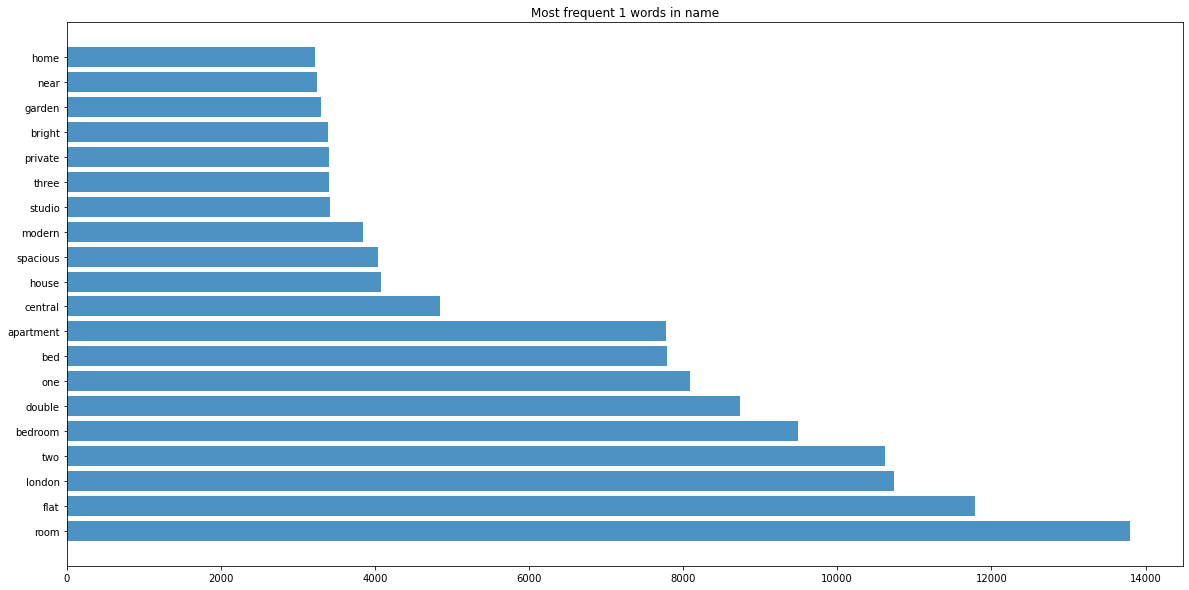

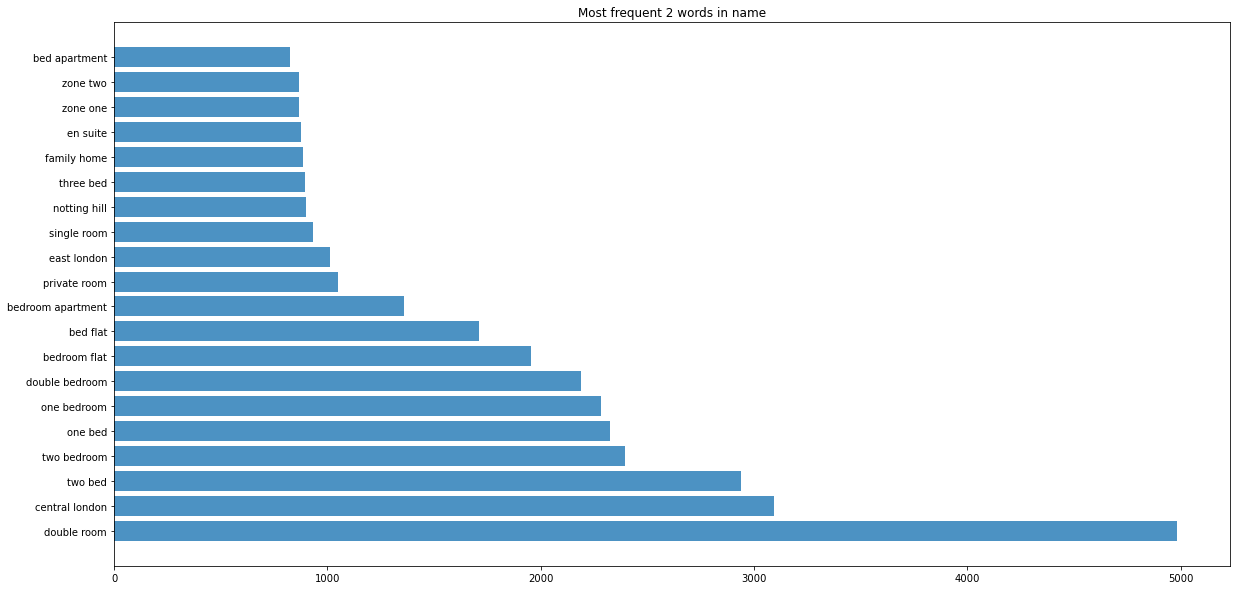

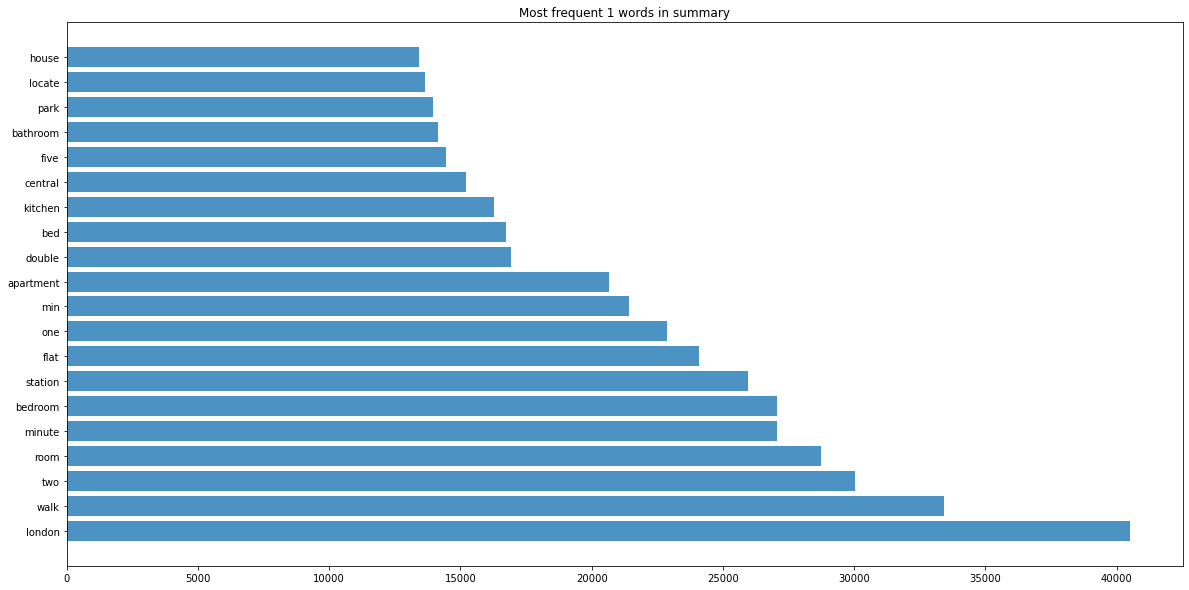

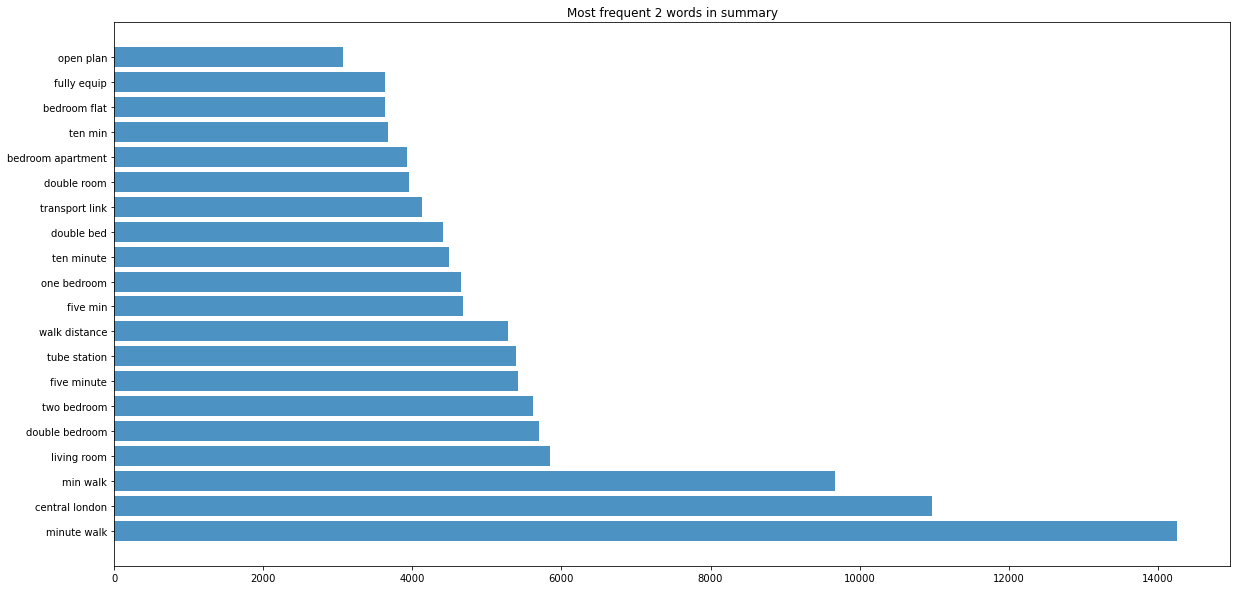

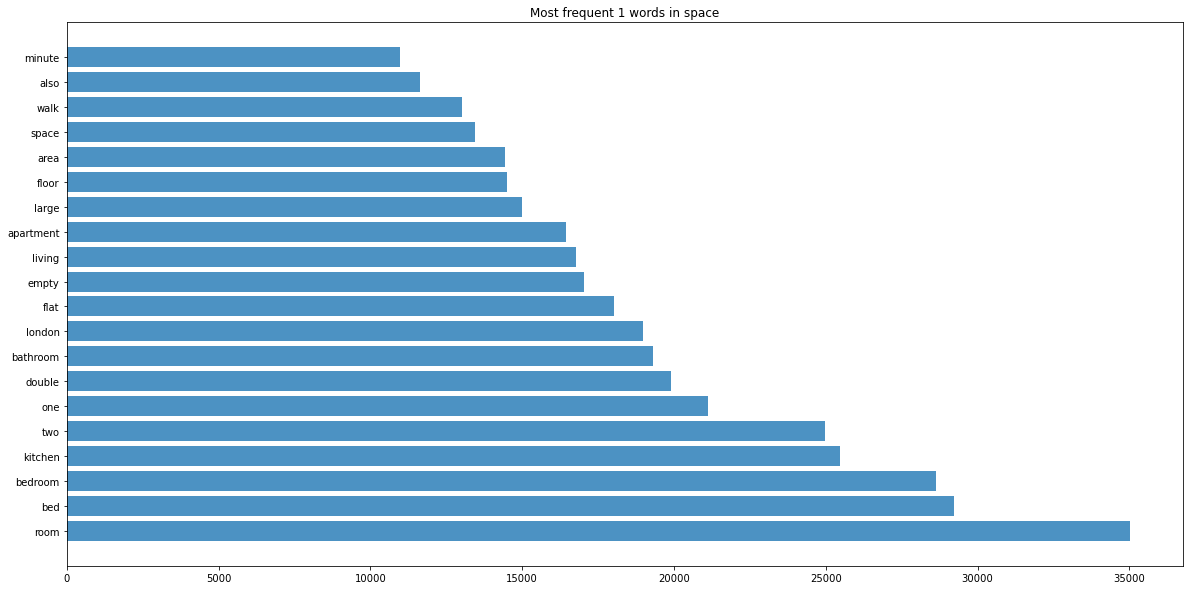

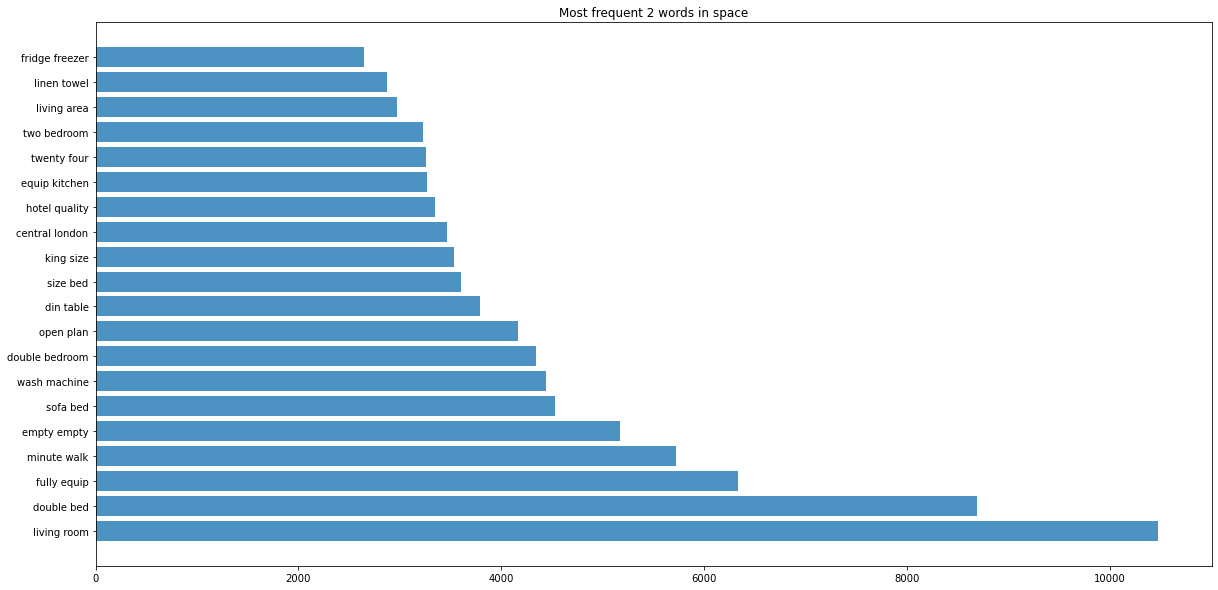

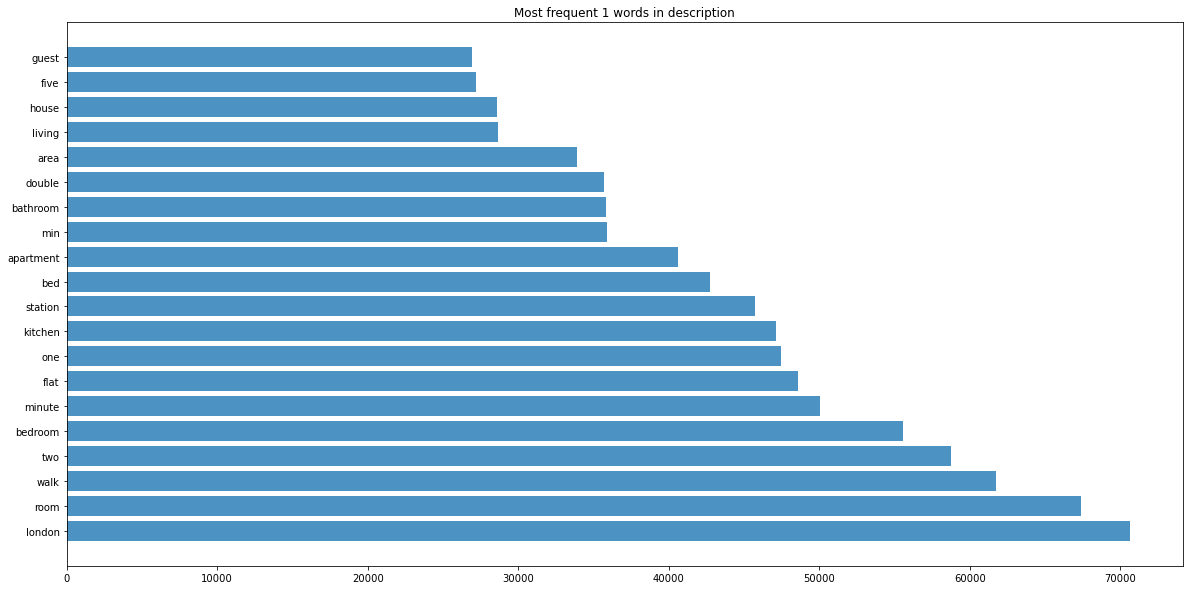

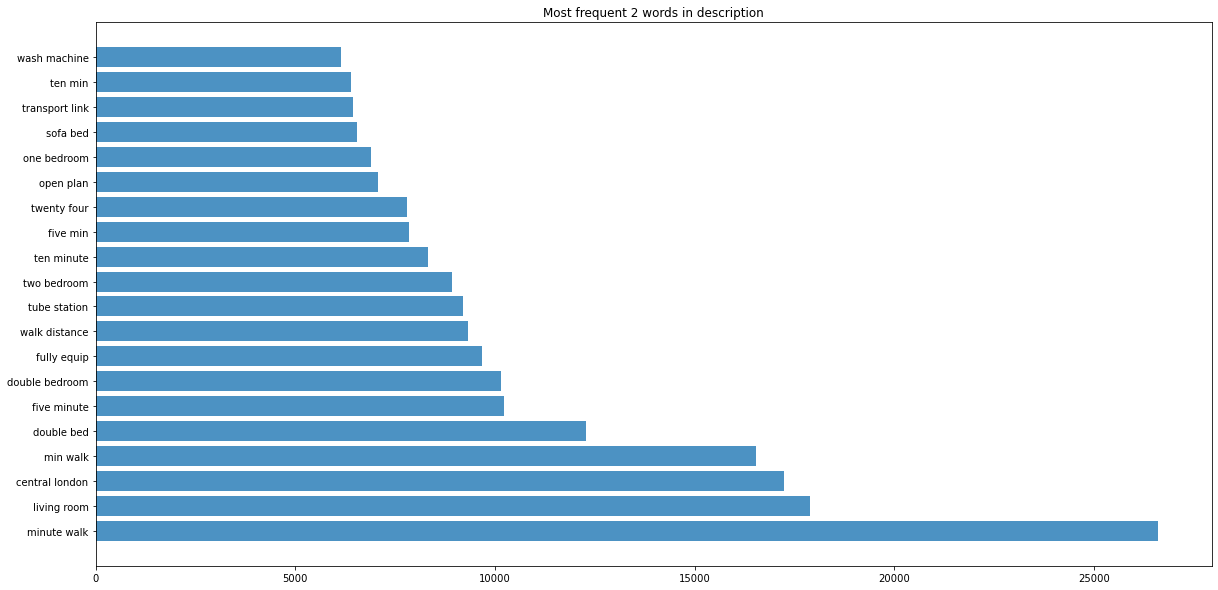

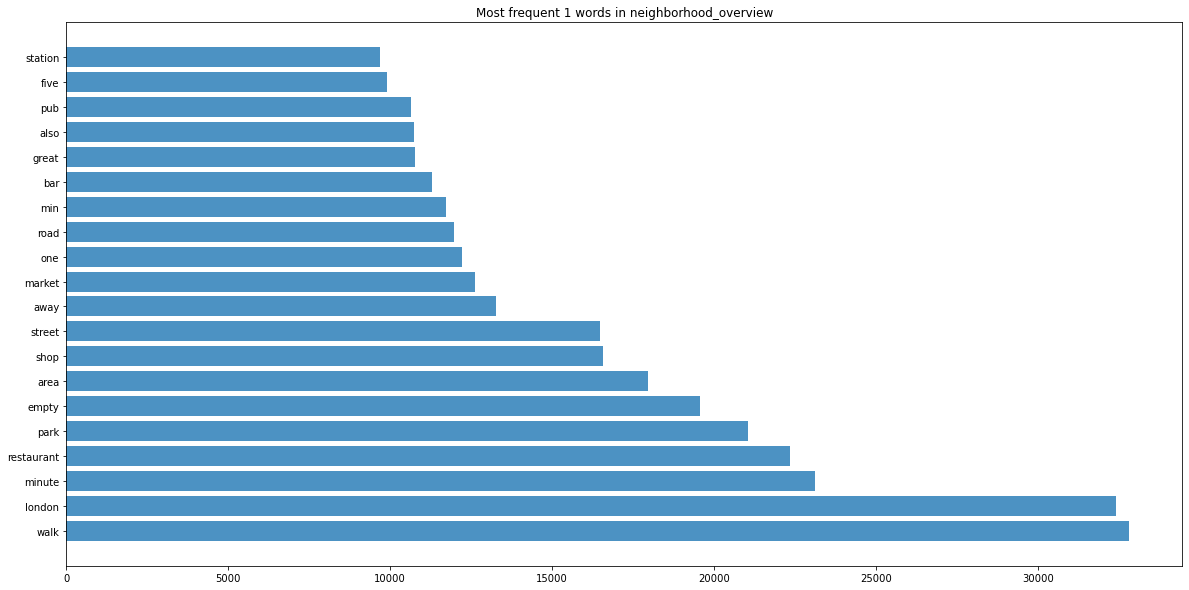

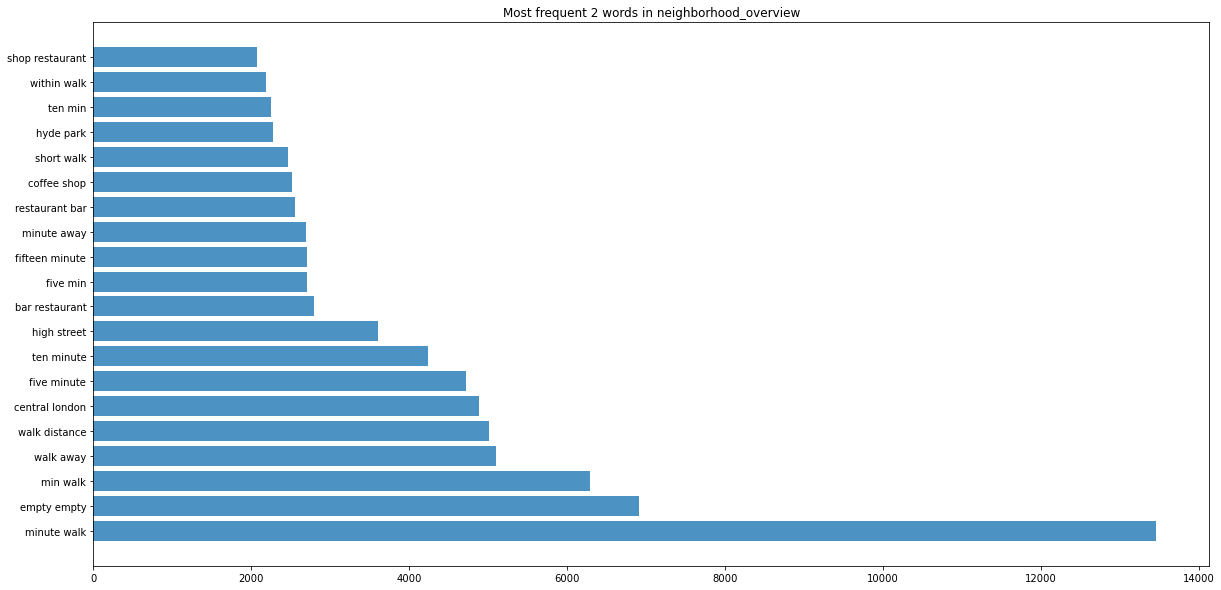

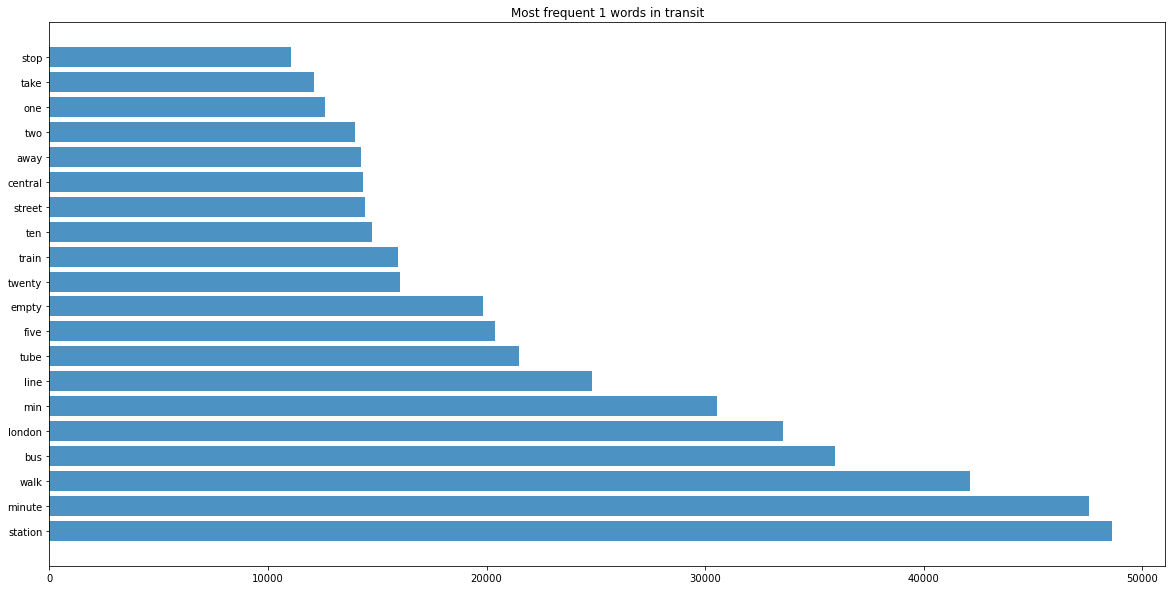

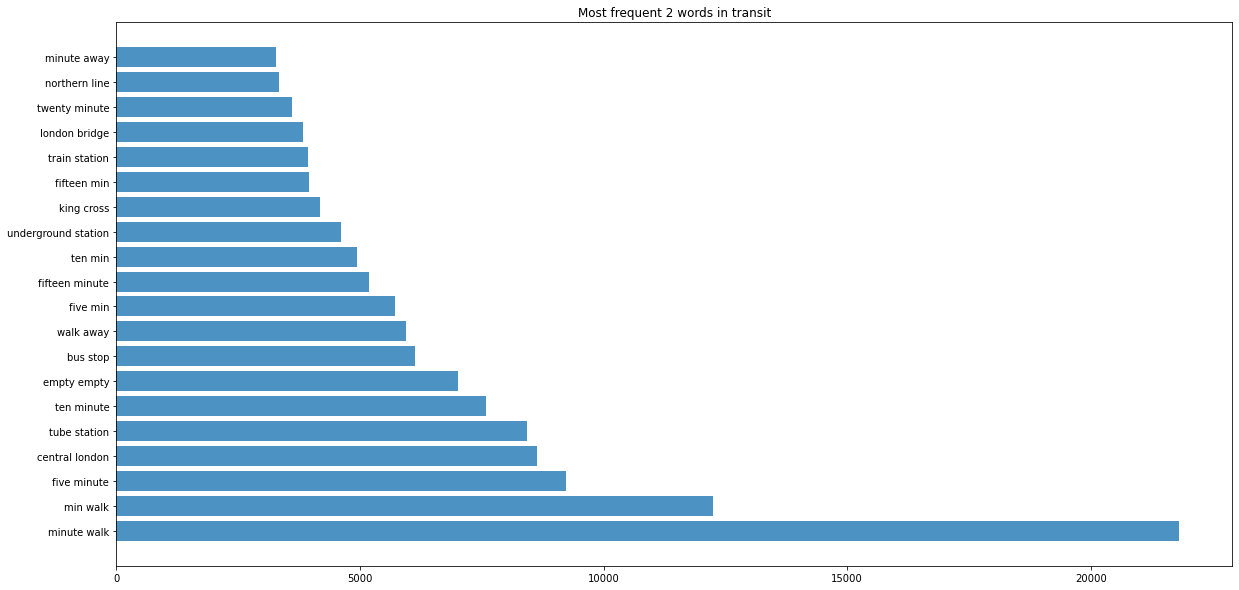

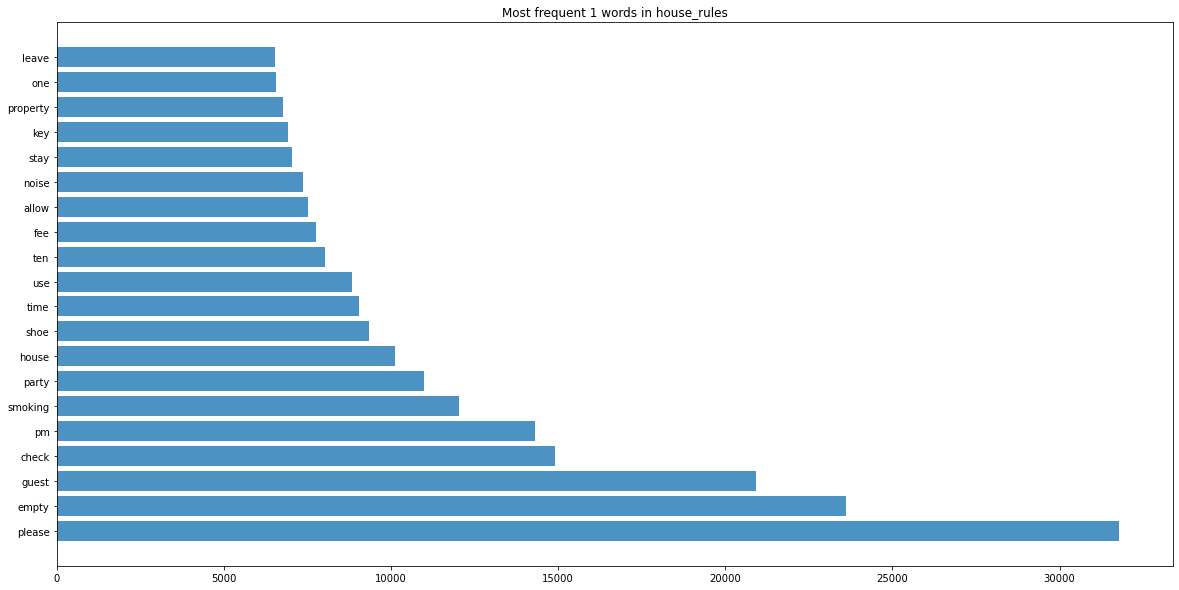

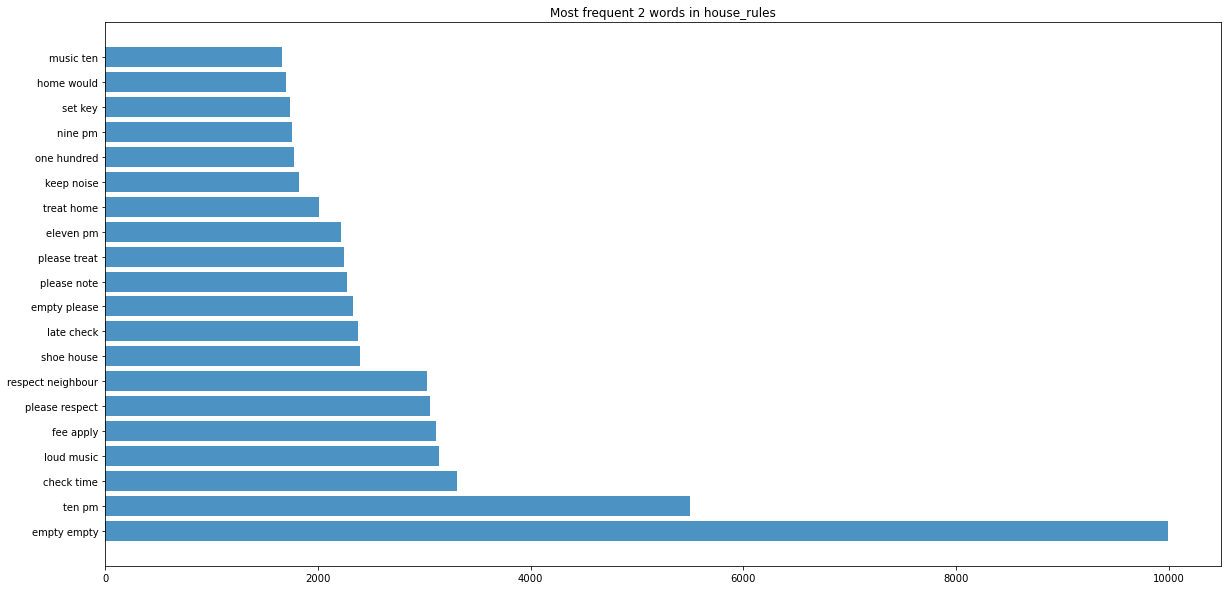

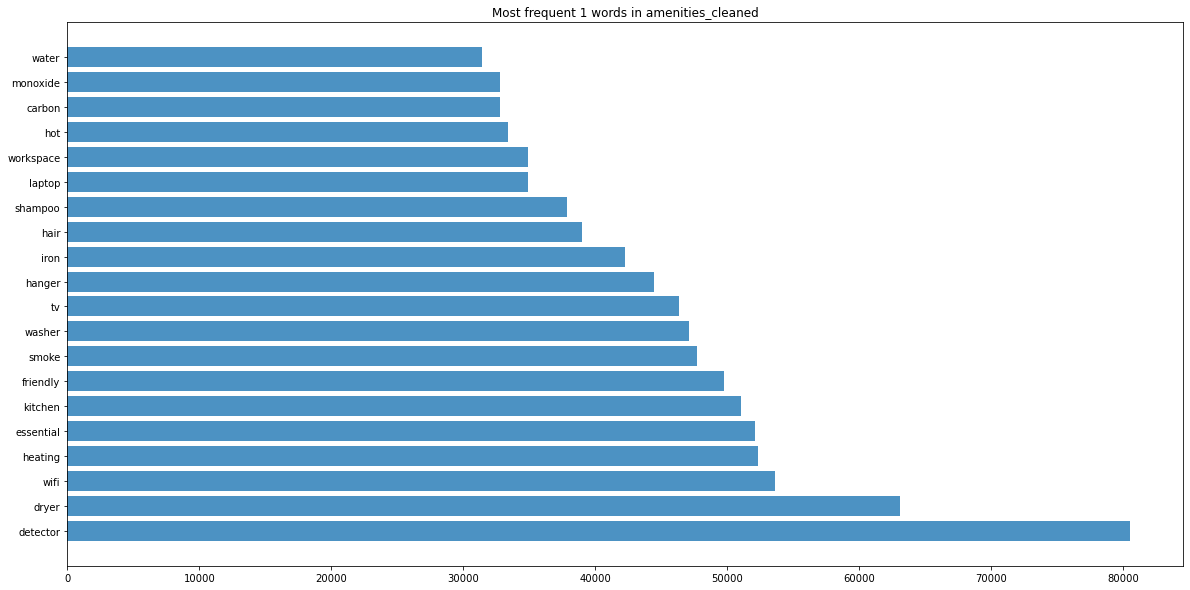

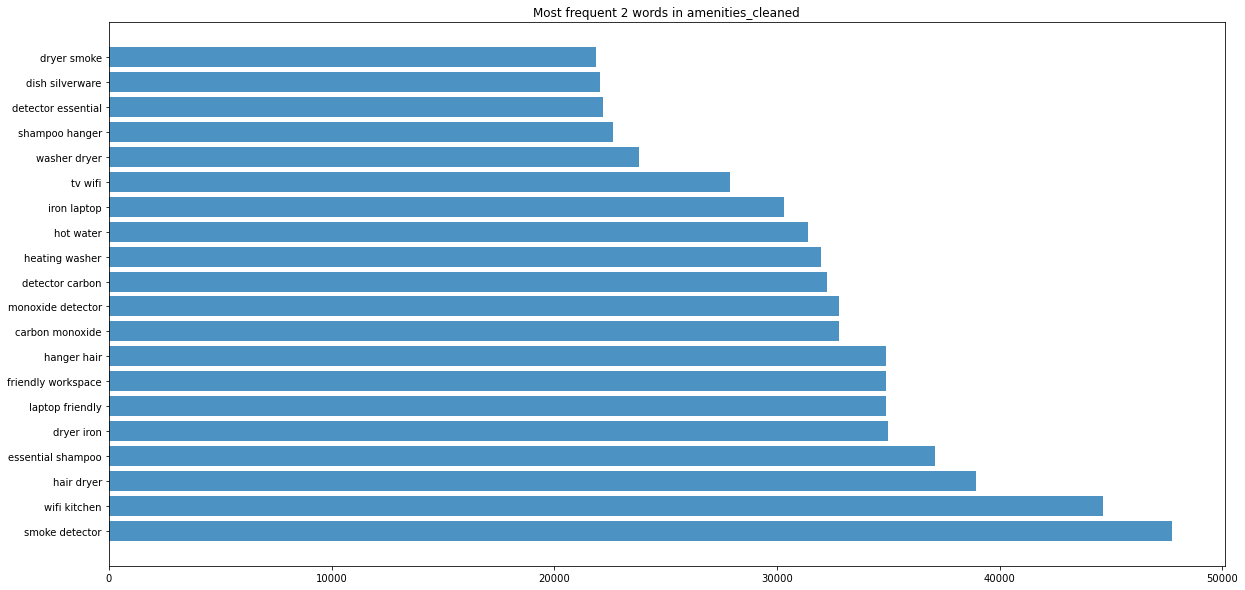

In [161]:

def print_top_20(df, feature ,ngram=1):

    if ngram==1:
        text=flatten(df[feature])
        freq = FreqDist(text)
        most_freq = freq.most_common(20)
        words = [w[0] for w in most_freq]
    else:
        higher_gram = list(ngrams(flatten(df[feature]),ngram))
        freq = FreqDist(higher_gram)
        most_freq = freq.most_common(20)
        words = [' '.join(w[0]) for w in most_freq]
        
    num = [n[1] for n in most_freq]
    plt.figure(figsize=(20,10))
    plt.title('Most frequent '+ str(ngram) + ' words in ' + feature)
    plt.barh(words,num,alpha=0.8)
    
for feature in train_text_eda:

    print_top_20(train_text_eda, feature)

    print_top_20(train_text_eda, feature,2)


The words most frequently are not of any big surprise overall, the words that one would expect to be used for an AirBnB are also used the most. However it is worth to note how often "empty" is used in the variable `space` and `neighborhood_overview`. `transit` is comprised of many numbers, which should not be a surprise as well. Hosts seem to try to be polite when writing about their `house_rules`, as "please" is used the very most. "empty" follows right after and is even the most frequent bigram.

Although not more informative and less structured, I also include a Wordcloud below for each text-feature, as it appears to be a more visually appealing presentation of most frequent words in a feature.

Wordcloud for name


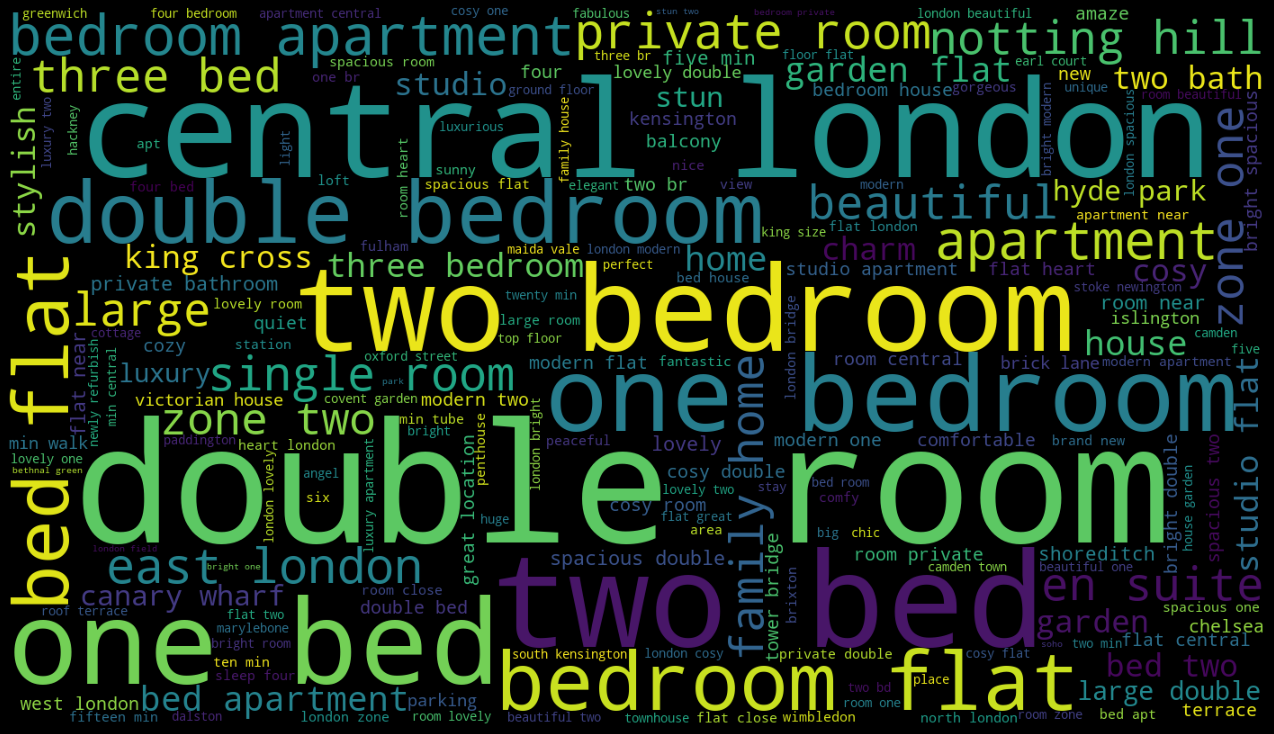

Wordcloud for summary


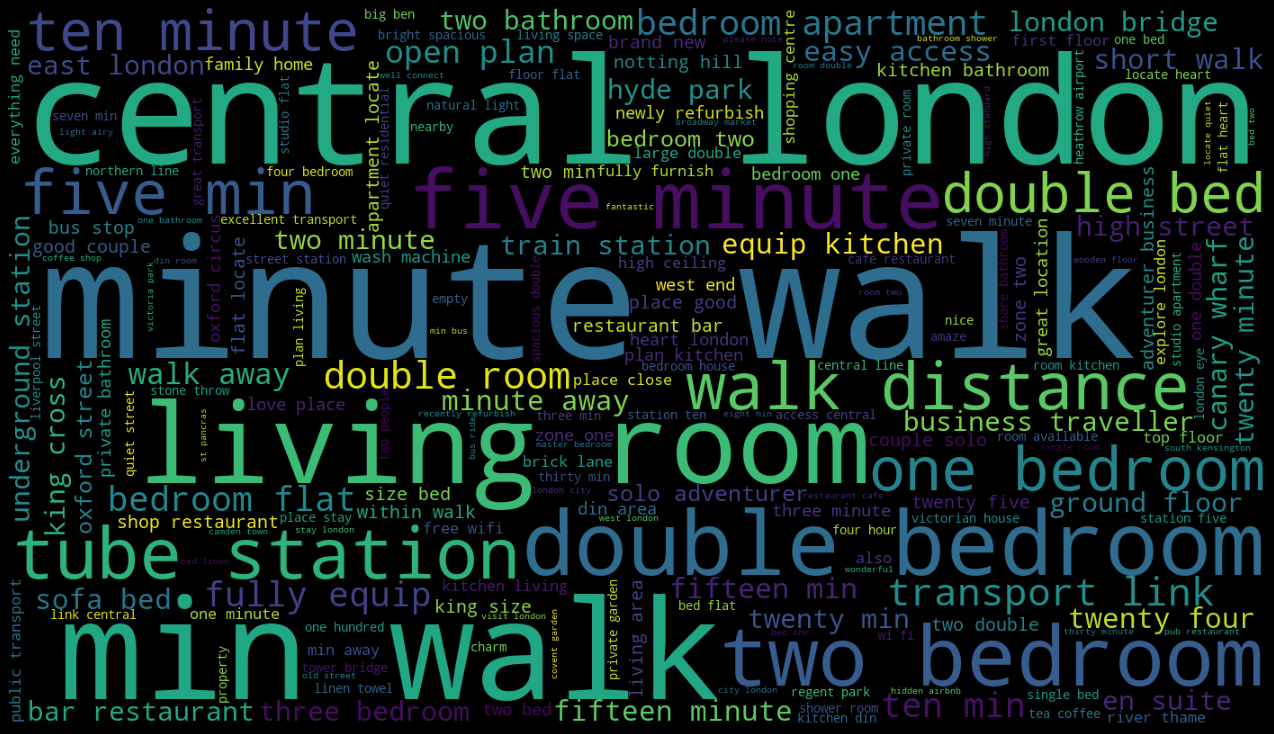

Wordcloud for space


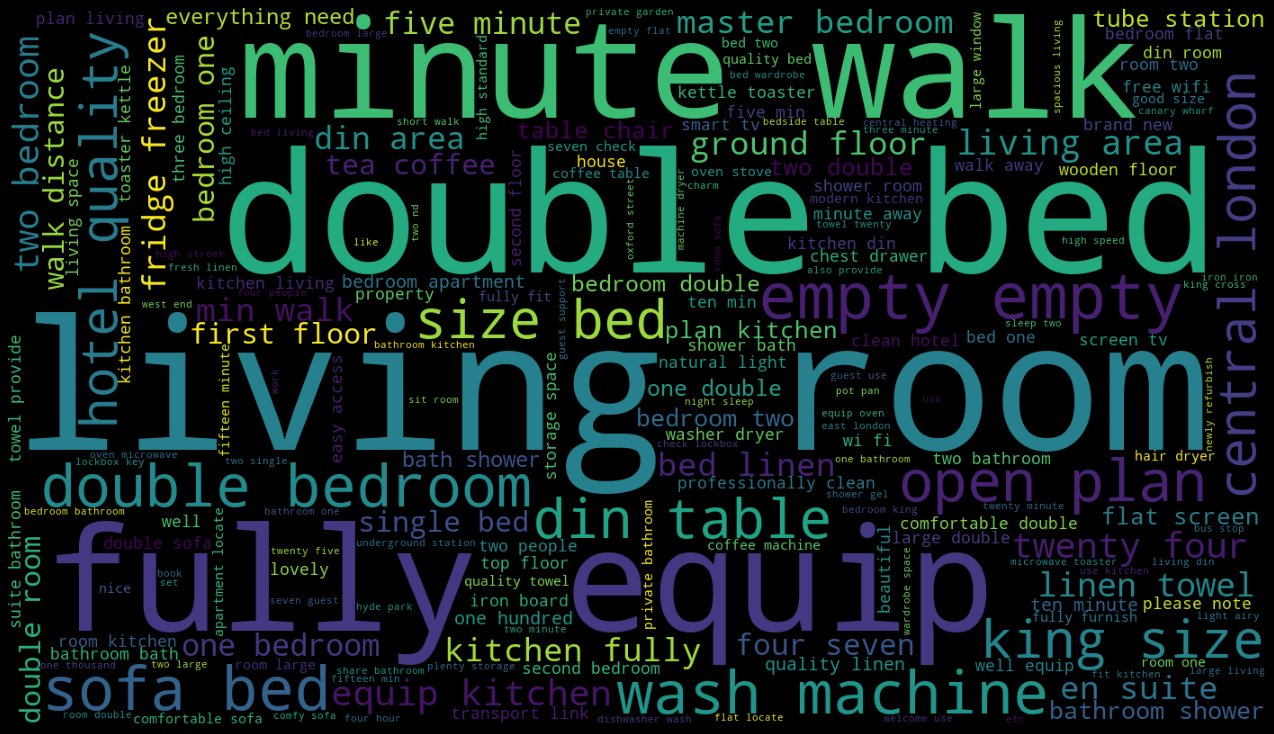

MemoryError: 

In [162]:


def wordcloud(df, feature,stopwords,ngram=1):
    text=flatten(df[feature])
    wordcloud = WordCloud(width=1400, 
                          height=800,
                          background_color='black',
                          stopwords=stop)
    
    wordc = wordcloud.generate(' '.join(text))
    
    plt.figure(figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    print('Wordcloud for ' + str(feature)) #title not available for wordcloud
    plt.show()
    
for feature in train_text_eda:    
    wordcloud(train_text_eda, feature,stop)

Last, I want to display the distribution of words used in each text-feature, as done by (Burukin, 2019). The graphs will look similar to the one from `amenities_cleaned`, only that now it is preprocessed text that is being analyzed rather than a list of amenities. The list of words used in each text-feature is very long and plotting the whole list does not give much insight, as it is not of any surprise that words like "rooms" or "london" are most frequently used in a dataset made up of London AirBnB listings. I therefore cut off the 5% most and least frequent words to give a more meaningful insight about the distribution of words in each text-feature.



In [ ]:
def words_distribution (feature):
    #generate Series with frequencies
    freq_d = pd.Series(flatten(train_text_eda[feature])).value_counts()
    
    #filter out the 5% least and most frequent words
    freq_d1 = freq_d.loc[(freq_d < freq_d.head(round(len(freq_d)*0.05)).min()) & (freq_d > freq_d.tail(round(len(freq_d)*0.05)).max())]

    #Plot the words distribution
    plt.figure()

    freq_d1.plot(kind='line', figsize=(15,5), use_index=True,
                title='Word frequency graph for ' +str(feature) )

for feature in train_text_eda:
    words_distribution(feature)

Even though the 5% least and most frequent words were cut off, the distribution graphs show that all features besides `amenities_cleaned` consist of a few very frequent words and many less frequent words.

# NLP Predictions

While it is not impossible to incorprate text and numerical data in one model and make one final prediction with it, this approach is restricted to Neural Networks. I will therefore use a simpler approach in first predicting the price of the train dataset using the text part alone and then using these predictions as numerical features together with the remaining tabular data to train another model, including the possibility of using a non-NN model.

With the text-data being readily prepared, the NLP model needs to be trained now. One could either merge the eight features into one and fit a model using the whole AirBnB listing as a covariate and predict one price per listing, or use each feature individually for a seperate model per feature and predict eight prices in total. The first approach takes into consideration interaction between the text-features, but makes a filtering of text-features impossible since all are incorporated in the only input-variable at hand. A reason for a significant interaction between the text-features is hard to find and even harder to measure, other than for their predicted prices. Further, I hypothesize that some of the text-features are more or less important than the others, for example `name`  possibly less while `amenites_cleaned` eventually more. While this is hard to be done to text-data, feature importance is easy to estimate for numerical data. I will therefore fit a model for each feature individually and make eight predictions in total which are then to be used for another model in a second round of fitting and predicting together with the remaining tabular data.

I use the pre-trained DistilBert model from huggingface in this task. The main reason why I chose this model is because of its effciency: it runs 60% faster while only losing 5% of performance compared to the original BERT model (Sanh, et al., 2020). For a brief description of what is happening inside the model, I refer to (Horev, 2018).

Although more efficient and pre-trained, training it on this task requires a lot of computational power, more than I was able to make work with the required packages. While time may be a solution to the lack of ressources on first glance, a computation of this dimension on inappropriate hardware is prone to crashes and the wipe out of all intermediate calculations, all experienced while working on this notebook. I will therefore use a small subset of the text-dataset for training the model. This offers the possibility to use use a different sample for predicting than training, which might contribute in decreasing the risk of overfitting.

In [163]:
train_text['price'] = train_tabular['price']

In [ ]:
#downsample and split
train_text_sample = train_text.sample(frac = 1/16, random_state=888, axis=0)
train_tabular_sample = train_tabular.sample(frac = 1/16, random_state=888, axis=0)

test_text_sample = test_text.sample(frac = 1/32, random_state=888, axis=0)
test_tabular_sample = test_tabular.sample(frac = 1/32, random_state=888, axis=0)

sets3 = train_test_split(train_text_sample, train_tabular_sample, test_size=0.5, random_state=888) 
train_text_sample_fit, train_text_sample_pred, train_tabular_sample_fit, train_tabular_sample_pred = sets3




In [ ]:

#split the dataframe into independent and dependent variable
sets = train_test_split(train_text_sample_fit ,test_size=0.3, random_state=888) 
text_train, text_valid = sets

In [ ]:
#create dictionary required for the model
sets = {'train':text_train, 'validation':text_valid}

In [ ]:
sets

In [ ]:

#get the tokenizer with which the original model was trained on
checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_dataset(dataset, feature):
    encoded = tokenizer(
        dataset[feature].apply(str).tolist(),
        padding=True,
        truncation=True,
        return_tensors='np',
    )
    return encoded.data

tokenized_datasets = {}
for feature in train_text_sample.drop('price', axis=1):
    tokenized_datasets[feature]= {
        split: tokenize_dataset(sets[split], feature) for split in sets.keys()
    }

In [ ]:
tokenized_datasets

In [ ]:
BATCH_SIZE = 32
N_EPOCHS = 3

In [ ]:
## train the model 
#models = {}
#for feature in tokenized_datasets:
    
#    #set n_labels to 1 as it is a Regression problem
#    model = TFDistilBertForSequenceClassification.from_pretrained(checkpoint, num_labels=1)
    
#    #choose the optimizer
#    optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
    
#    #define the loss function 
#    loss = tf.keras.losses.MeanSquaredError()
    
#    #build the model
#    model.compile(optimizer=optimizer,
#              loss=loss,
#              metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
#    print('start training for ' + str(feature))
    
#    model.fit(tokenized_datasets[feature]['train'],
#              np.array(sets['train']['price']),
#              epochs=N_EPOCHS,
#              batch_size=BATCH_SIZE,
#              validation_split=0.2)
#    models[feature] = model
#    train_tabular_sample_pred[feature + '_pred'] = model.predict(tokenize_dataset(train_text_sample_pred, feature)).logits
    
#    print(str(feature) + ' finished.')


        

#with open('train_nlp_predictions.pickle', 'wb') as f:
#        pickle.dump(train_tabular_sample_pred[train_tabular_sample_pred.columns[-8:]], f)


In [ ]:
#for feature in models:
    
#    test_tabular[feature + '_pred'] = models[feature].predict(tokenize_dataset(test_text, feature)).logits
    
#with open('test_nlp_predictions.pickle', 'wb') as f:
#        pickle.dump(test_tabular_sample[test_tabular_sample.columns[-8:]], f)

The lack of computational ressources has forced me to approach this task with less finetuning than ideally done. While it could well be that each text-feature would require an individual model, I have not assessed each model individually, also because of the large training time differences between features. According to my own research, there is also no method at the moment to automize hyperparameter tuning of DistillBert, which still does not solve the running time issue. As a result, I used the same model with only slightly adjusted parameters from experiments.

In [ ]:

#split the dataframe into independent and dependent variable
sets4 = train_test_split(train_text ,test_size=0.3, random_state=888) 
text_train, text_valid = sets4

sets4 = {'train':text_train, 'validation':text_valid}

In [ ]:
#get the tokenizer with which the original model was trained on
checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_dataset(dataset, feature):
    encoded = tokenizer(
        dataset[feature].apply(str).tolist(),
        padding=True,
        truncation=True,
        return_tensors='np',
    )
    return encoded.data

tokenized_datasets = {}
tokenized_datasets['name']= {
    split: tokenize_dataset(sets4[split], 'name') for split in sets4.keys()
}

In [ ]:
train_nlp_predictions = pd.read_pickle("train_nlp_predictions_sample.pickle")

In [ ]:
train_nlp_predictions

In [ ]:
train_nlp_predictions.hist(figsize=(20, 20), bins=10, xlabelsize=8, ylabelsize=8)
plt.show()

The results above unfortunately display a very poor performance, as the models essentially predict the same price nearly everytime. This is a result from not enough data being fed into the model. To demonstrate, I do a prediction using the whole dataset using only `name`, the shortest feature in the dataset. In later parts of this notebook I could confirm that the NLP predictions using a downsampled dataset are not of any use, I will therefore keep working with the whole dataset including the price prediction using `name`.


In [ ]:
##set n_labels to 1 as it is a Regression problem
#model = TFDistilBertForSequenceClassification.from_pretrained(checkpoint, num_labels=1)

##choose the optimizer
#optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)

##define the loss function 
#loss = tf.keras.losses.MeanSquaredError()

##build the model
#model.compile(optimizer=optimizer,
#          loss=loss,
#          metrics=[tf.keras.metrics.RootMeanSquaredError()])


#model.fit(tokenized_datasets['name']['train'],
#          np.array(sets4['train']['price']),
#          epochs=N_EPOCHS,
#          batch_size=BATCH_SIZE,
#          validation_split=0.2)

#train_tabular['name_pred'] = model.predict(tokenize_dataset(train_text, 'name')).logits
#test_tabular['name_pred'] = model.predict(tokenize_dataset(test_text, 'name')).logits

#with open('train_name_pred.pickle', 'wb') as f:
#    pickle.dump(train_tabular['name_pred'], f)
train_tabular['name_pred'] = pd.read_pickle('train_name_pred.pickle')

#with open('test_name_pred.pickle', 'wb') as f:
#    pickle.dump(test_tabular['name_pred'], f)
test_tabular['name_pred'] = pd.read_pickle('test_name_pred.pickle')


In [ ]:
#Indeed looking much better
train_tabular['name_pred']

In [ ]:
mean_squared_error(train_tabular['price'],train_tabular['name_pred'], squared=False)

A RMSE of around 60 is astonishing given that only the name of an AirBnB listing was considered. It is assumed that incorprating other text features would have been improved performance substantionally.

# Outlier handling

As seen below, the target variable `price` has many upper outliers according to Tuckey's rule. Outliers, particulary upper ones are also ominpresent in the other features, particularly the ones that are not a transformation of a categorical variable. While outliers may cause problems for some models, especially parametric ones, they contain also information. It is probably of no coincidence that most covariates have many upper outliers, while the same being the case for the target variable. As a result, I will leave outliers untouched here. I will also take this opportunity to show the distribution of the downsampled text predictions, despite being already excluded from  further modeling.

In [ ]:
train_tabular_sample_pred = pd.concat([train_tabular_sample_pred, train_nlp_predictions], axis=1)
train_tabular_sample_pred

In [ ]:
train_tabular.boxplot(['price'])

In [ ]:
for column in train_tabular.drop(['price', 'non_en'], axis=1):
    plt.figure()
    train_tabular.boxplot([column])

In [ ]:
for column in train_tabular_sample_pred[train_tabular_sample_pred.columns[-8:]]:
    plt.figure()
    train_tabular_sample_pred[train_tabular_sample_pred.columns[-8:]].boxplot([column])
    
    

# Pre-Modeling Feature Selection

As mentioned earlier, WoE features allow a clear classification of relevance of a feature by using Information Value and the popular rule of thumb borders. Additional evaluation metrics that also comprise non-WoE features include the Extra Tree Regressor (Brownlee, 2020) and Mutual Information. Further, a correlation map shows all "relevant" Pearson's correlation between all variables with each other. I defined "relevant" as +/- 30% or higher/lower, hence fields with a correlation between -30% and 30% are empty.

In [ ]:
for  feature in itertools.chain(train_non_text.select_dtypes('object').columns , [train_non_text['host_id'].name]):
        woe_ = IV_Calc(df=train_non_text, feature=feature, target="price")
        woe_.final_assessment()

In [ ]:
#select all input features
X = train_tabular.drop(['price'], axis=1) 
y = train_tabular[['price']].values.ravel()

#fit the Extra Trees Regressor to obtain feature importances
model = ExtraTreesRegressor()
model.fit(X,y) 

##plot graph of feature importances 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(100).plot(kind='barh', figsize=(20,30)) #plot all features, as the input needs to be a number, the number 100 was chosen to ensure all features are selected
plt.show()

In [ ]:
#top features till latitude, WoE over freq and Zip over rest
keep_tree = ['host_id_woe', 'zipcode_woe', 'name_pred', 'room_type_woe', 'accommodates', 'bedrooms', 'bathrooms', 'host_total_listings_count', 'beds', 'cancellation_policy_woe', 'amenities_cleaned_count', 'review_scores_rating', 'guests_included', 'latitude', 'longitude']


In [ ]:
#apply SelectKBest class to extract best features
bestfeatures = SelectKBest(score_func=mutual_info_regression, k='all') 
fit = bestfeatures.fit(X,y)

#save the scores as columns of a Dataframe
dfscores = pd.DataFrame(fit.scores_) 
#save the feature names as columns of a Dataframe
dfcolumns = pd.DataFrame(X.columns) 

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1) 
#naming the dataframe columns
featureScores.columns = ['Features','Score']  

print(featureScores.nlargest(31,'Score'))
print(featureScores.nsmallest(31,'Score').sort_values('Score', ascending=False))#print all features ordered by their score. 100 was again chosen to ensure all features are selected as a number is needed as an input

In [ ]:

#room_type_feq close to woe here while in trees much lower and it is also not missing in test set, go till host_total_listings_count because of following cut
keep_m_info = ['host_id_woe', 'zipcode_woe','name_pred', 'room_type_woe', 'accommodates', 'bedrooms', 'beds', 'longitude', 'latitude', 'bathrooms', 'image_quality', 'guests_included', 'host_total_listings_count']

Looking at the results, it is tempting to kick all but the four best features. One has to keep in mind however, that quite a few observations are missing in the test-set for the two best features `host_id_woe` and `zipcode_woe`. The results displayed need hence to be taken with a grain of salt. `name_pred` comes even on third place, although being the text-feature hypothesized to be the least predictive.

In [ ]:
corr = train_tabular.corr()
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr[(corr >= 0.30) | (corr <= -0.30)], #plot a correlation heatmap with only values exceeding absolute 0.30
            annot=True);

In [ ]:
keep_all = []
[keep_all.append(x) for x in keep_tree if x not in keep_all]
[keep_all.append(x) for x in keep_m_info if x not in keep_all]
keep_all

all major correlated with price features inside


In [ ]:
train_tabular_pre = train_tabular[keep_all]

In [ ]:
corr = train_tabular_pre.corr()
f,ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr ,
            annot=True);

All features selected by now are quite heavily correlated with each other. Further feature selection after modelling is expected to imporve performance further.

# Numerical data predictions

I will use a simple Deep Feed Forward Neural Network for predicting the price of each listing. For comparison, I will also use the ensemble learners Random Forest and XGBoost. In order to find out a possible best set of features using a wrapper, I will first tune the Ensemble Learners and then perform Recursive Feature Elimination on them. Using the results and some trial and error, I will then determine the set of features used for the Feed Forward Neural Network which I will then use for tuning it. The model with the best evaluated prediction is then to be used for predicting the unlabeled listings.

In [ ]:
X = train_tabular_pre 
y = train_tabular[['price']].values.ravel()

## Ensemble Learners

In [ ]:
rf = RandomForestRegressor(random_state=888)  
xgb = XGBRegressor(random_state=888)


### Hyperparameter Tuning

Given the high dimensionality of parameters that can be chosen for the models, I will make use of algorithms to find the best hyperparameters. I discarded Grid Search as this would be too inefficient given the amount of hyperparameters. The alternatives are Random Search and Bayesian Optimization. As the name suggests, Random Search takes samples of the given set of hyperparameters and tries them n_iter times while tracking performance. While this may be less "thorough" than Grid Search, results are still impressive. The alternative is Bayesian Optimization which gets its name from making use of the Bayes Theorem. Doing so, the algorithm essentially tries a set of hyperparameters and then digs itself into the direction where better results are expected, rather than just taking another random sample of hyperparameters. While this makes results expected to be better than when using Random Search (Pham, 2021), this does not necessarily have to be the case (Kuhn, 2016). I will use the analogy of a dart player shooting her shot at a target with unknown point spots. Random Search corresponds to a dart player shooting blindly many times and then evaluating her best shot. Bayesian Optimization corresponds to a dart player shooting randomly first and then trying to improve from there in order to achieve one optimal result, several times. As this analogy also suggests, the same optimal result is expected to be achieved faster by Bayesian Optimization than Random Search, after all Random Search would achieve it solely "by luck". However it is important to stress, that both dart players do not know the global optimum. While Random Search is trying around all possibilities, Bayesian Optimization might "get stuck" at an area where there is an optimum, but not one giving the most points for the whole dart board. However, this can be solved by increasing n_iter, the number of times Bayesian Optimization guesses randomly as well.

Giving the expected better efficiency, I gave Bayesian Optimization a try and implemented it using the `Scikit-Optimize` library. However, it was not possible to be used for the ensemble learners, due to a mismatch of arguments. According to my own research, this is because of an updated version of `Scikit_Learn` and can be solved by installing an older version. Despite correct implementation of the older version, the error has not disappeared. I therefore sticked to Random Search and applied it to both ensemble learners as well as the Deep Feed Forward NN for uniformity. 

In [ ]:
params_rf = {'n_estimators': [50, 100, 200, 500, 1000], 
             'max_features': [1, 2, 3, 4, 5, 6],
             'max_depth': [3, 5, 7, 10],
             'max_samples': [10, 50, 100],
             'min_samples_split': [2, 5, 10, 15, 100],
             'min_samples_leaf':[1, 2, 5, 10]
              }

params_xgb = {'n_estimators': [50, 100, 200, 500, 1000],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
    }

In [ ]:
cv = KFold(n_splits=10, shuffle=True, random_state=888)

# define the search
search_rf = RandomizedSearchCV(estimator=rf, param_distributions=params_rf, n_iter=100, scoring= 'neg_mean_squared_error', cv=cv)
search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=params_xgb, n_iter=100, scoring= 'neg_mean_squared_error', cv=cv)

In [ ]:
# perform the search
rf_opt=search_rf.fit(X, y)
# report the best result
rf_optimal_parameters = rf_opt.best_params_
print(rf_optimal_parameters)

# perform the search
xgb_opt=search_xgb.fit(X, y)
# report the best result
xgb_optimal_parameters = xgb_opt.best_params_
print(xgb_optimal_parameters)

In [ ]:
#RFE requires max_features to be a fraction input features
rf_opt = RandomForestRegressor(n_estimators= 200, min_samples_split= 15, min_samples_leaf= 1, max_samples= 100, max_features= 0.4, max_depth= 7, random_state=888)  


In [ ]:
xgb_opt = XGBRegressor(random_state=888, subsample = 0.7, n_estimators = 1000, min_child_weight = 3, max_depth = 10, learning_rate = 0.01, colsample_bytree=0.7)


### Post-Feature Selection

Taking a multivariate approach, I will make use of the wrapper method Recursive Feature Elimination in order to try sets of features for each ensemble learner and track the performance in an automated way. The Deep Feed Forward NN cannot be used, as it does not contain a feature importance score, which comes from Neural Networks being so-called *Black Box Models*. While they can be used for fitting and predicting just as their *White Box Model* counterparts, it is impossible to check what is going on inside, including the importance of features.

I will use the RFE on the ensemble learners first and then use the results as a first approach in manually finding the optimal set of features for the Deep Feed Forward by trial and error. 

In [ ]:
rfecv = RFECV(estimator=rf_opt, step=1, cv=10, scoring='neg_root_mean_squared_error')
X_train_new = rfecv.fit(X,  y)

In [ ]:
print('Optimal number of features of ' + 'Random Forest' + ':' + str(rfecv.n_features_))
print(X.columns[rfecv.support_])

In [ ]:
dset = pd.DataFrame()
X_new_rf = X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=False)

dset['attr'] = X_new_rf.columns
dset['importance'] = X_train_new.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(15, 6))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [ ]:

rfecv = RFECV(estimator=xgb_opt, step=1, cv=10, scoring='neg_root_mean_squared_error')
X_train_new = rfecv.fit(X,  y)

In [ ]:
print('Optimal number of features of ' + 'XGBooster' + ':' + str(rfecv.n_features_))
print(X.columns[rfecv.support_])

In [ ]:
dset = pd.DataFrame()
X_new_xgb = X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=False)

dset['attr'] = X_new_xgb.columns
dset['importance'] = X_train_new.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(15, 6))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

While these bar plots do not differ a lot from those before modelling, they give insight about where to take a possible best cut.

## Feed Forward Neural Network

Given several sets of features, I will tune different Feed Forward Models with feature sets from the ensemble learners and evaluate their performance by uploading predictions on Kaggle. Below is the one presented with the highest score. Most of the codings for the Hyperparameter Tuning for the Deep Feed Forward Neural Network was taken from (Mishra, 2021).

In [ ]:
#numpy array as target
train_labels = np.array(y_train).astype("float64")


#covariates as numpy array
train_samples = np.array(X_train[['accommodates', 'bedrooms', 'zipcode_woe', 'host_id_woe', 'name_pred']]).astype("float64")


train_labels, train_samples = shuffle(train_labels, train_samples, random_state=888)

nb_units=128

train_samples.shape[1]
train_labels = train_labels.reshape(-1,1)
train_labels.shape


In [ ]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(nb_units, input_dim=train_samples.shape[1], activation='relu'))
    for i in range(hp.Int('layers', 2, 10)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(Dense(1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_squared_error'
    )
    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=3,
    directory='rf__rfe',   #add best model here
    project_name='ADAMS_2021'
)
tuner.search_space_summary()
tuner.search(x=train_samples,
             y=train_labels,
             batch_size=128,
             epochs=200,
             validation_split=0.2)
nn_optimal_parameters = tuner.results_summary()
print(nn_optimal_parameters)

In [ ]:
#build model
FFNN = Sequential()
FFNN.add(Dense(32, input_dim=train_samples.shape[1], activation='relu'))
FFNN.add(Dense(288, activation='relu'))
FFNN.add(Dense(352, activation='relu'))
FFNN.add(Dense(480, activation='relu'))
FFNN.add(Dense(384, activation='relu'))
FFNN.add(Dense(384, activation='relu'))
FFNN.add(Dense(224, activation='relu'))
FFNN.add(Dense(512, activation='relu'))
FFNN.add(Dense(1))
FFNN.summary()

# Final Model Evaluation

Now that every model has received its optimal hyperparameters and sets of features, it is time to evaluate their performance. As Kaggle allows to evaluate uploads, the final scores below are those received when uploading the csvs that can be generated with the code below. For grading, I will upload the prediction with the best score from the table at the end of this section.

In [ ]:
rf_pred1 = rf_opt.fit(train_tabular[['accommodates', 'bedrooms', 'zipcode_woe', 'host_id_woe', 'name_pred']], y)           
yhat_rf1 = rf_pred1.predict(test_tabular[['accommodates', 'bedrooms', 'zipcode_woe', 'host_id_woe', 'name_pred']]) 

In [ ]:
test_tabular['price_rf1'] = yhat_rf1

In [ ]:
test_tabular['price_rf1'].to_csv('predictions_rf_rfecv.csv',index = True,)


In [ ]:
rf_pred2 = rf_opt.fit(train_tabular[['accommodates' ,'bedrooms', 'host_id_woe', 'name_pred', 'latitude', 'longitude'
                                    , 'room_type_woe',]], y)

yhat_rf2 = rf_pred2.predict(test_tabular[['accommodates' ,'bedrooms', 'host_id_woe', 'name_pred', 'latitude', 'longitude'
                                    , 'room_type_woe',]]) 


In [ ]:
test_tabular['price_rf2'] = yhat_rf2

In [ ]:
test_tabular['price_rf2'].to_csv('predictions_rf_trial&error.csv',index = True,)


In [ ]:
#running RFE ran beyond the deadline, these are the features used when xgb was tuned without name_pred
xgb_pred1 = xgb_opt.fit(train_tabular[['host_id_woe', 'zipcode_woe', 'room_type_woe', 'accommodates',
       'bedrooms', 'bathrooms', 'host_total_listings_count', 'beds',
       'cancellation_policy_woe', 'guests_included', 'latitude', 'longitude',
       'image_quality']], y)           
yhat_xgb1 = xgb_pred1.predict(test_tabular[['host_id_woe','zipcode_woe', 'room_type_woe', 'accommodates',
       'bedrooms', 'bathrooms', 'host_total_listings_count', 'beds',
       'cancellation_policy_woe', 'guests_included', 'latitude', 'longitude',
       'image_quality', ]]) 

In [ ]:
test_tabular['price_xgb1'] = yhat_xgb1

In [ ]:
test_tabular['price_xgb1'].to_csv('predictions_xgb_rfecv.csv',index = True,)


In [1]:
xgb_pred2 = xgb_opt.fit(train_tabular[['host_id_woe', 'room_type_woe',
         'bedrooms', 'accommodates', 'bathrooms'
        , 'latitude', 'longitude', 'guests_included', 'name_pred'
       ]], y)           
yhat_xgb2 = xgb_pred2.predict(test_tabular[['host_id_woe', 'room_type_woe', 
         'bedrooms', 'accommodates', 'bathrooms',
         'latitude', 'longitude', 'guests_included', 'name_pred'
       ]]) 

NameError: name 'xgb_opt' is not defined

In [ ]:
test_tabular['price_xgb2'] = yhat_xgb2

In [ ]:
test_tabular['price_xgb2'].to_csv('predictions_xgb_trial&error.csv',index = True,)


In [ ]:
#compile NN
FFNN.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['RootMeanSquaredError', 'MeanSquaredError']
             )

#fit NN
FFNN.fit(x=train_samples,
          y=train_labels,
          validation_split=0.2,
          batch_size=10,
          epochs=12,
          shuffle=True,
          verbose=1)

In [ ]:
yhat_nn= model.predict(test_tabular[['accommodates' ,'bedrooms', 'host_id_woe', 'name_pred', 'latitude', 'longitude', 'room_type_woe',]])

In [ ]:
test_tabular['price_nn'] = yhat_nn

In [ ]:
test_tabular['price_nn'].to_csv('predictions_nn_trial&error.csv',index = True,)

In [ ]:
Final_Scores = pd.DataFrame(index=['Recursive Feature Elimination', 'Trial & Error'])
Final_Scores['Random Forest Regressor'] = [58.51504, 55.18544]
Final_Scores['XGB Regressor'] = [58.76654, 53.86256]
Final_Scores['Feed Forward NN'] = ['-', 54.06729]
Final_Scores

The ensemble models improved both from using trial and error, most likely because of the missing `zipcode_woe` values in the test dataset, as replacing it by `longitude` and `latitude` has improved performance a lot. This is also intuitive, both describe the location of the AirBnB, with `longitude` and `latitude` combined even in the most detail. Interestingly, the Deep Feed Forward Neural Network achieved better results using `zipcode_woe` instead of `latitude` and `longitude`, the feature set from RFE was a better choice than the feature sets from trial & error. All models perform similarly well, with XGB Regressor making the run.

# Conclusion

Neural Networks offer a very flexible framework for prediction tasks. While they can be very powerful, as seen from the performance of `name_pred` alone, their training can be extremely exhaustive in regards to computation. Their flexibility is their strength as well as their weakness, working with them requires much time and random guessing for finding the proper model and hyperparameters.

This task has also shed a light on factors important for the price of an AirBnB in London. Very obvious factors like those describing the location or the size of the AirBnB proved indeed to be very important. Other ones that may look important on first sight are not, like review scores. It is also surprising how important it is who is offering the AirBnB, while factors describing the host are completely irrelevant, like the verification of a host.

Although not intended, this notebook also showed the importance of data for modelling. A sample of around 1,700 AirBnB listings does not appear to be very small, yet still predictions from training with the text of this downsampled dataset are totally useless. Even more, it requires to downsample numerical data as well. While fully trained `name_pred` proved to be an important feature, ignoring text-features completely would not have had a large impact on performance, as proved by earlier experiments. However one should keep in mind that the name of a lisiting is maybe not as indicative as for example the much longer description. Incorporating text-features for a task like this is hence a trade-off between performance and time, and decision making is not easy.

# References

AirBnB, 2021. An introduction to Airbnb Experiences. [Online] 
Available at: https://www.airbnb.com/help/article/1581/an-introduction-to-airbnb-experiences

Bhalla, D., 2020. WEIGHT OF EVIDENCE AND INFORMATION VALUE FOR CONTINUOUS DEPENDENT VARIABLE. [Online] 
Available at: https://www.listendata.com/2019/08/WOE-IV-Continuous-Dependent.html#comment-form

BnB Facts, 2020. Airbnb Overall Rating: How Categories Affect It. [Online] 
Available at: https://bnbfacts.com/how-airbnb-category-ratings-affect-overall-rating/

Brownlee, J., 2021. How to Develop an Extra Trees Ensemble with Python. [Online] 
Available at: https://machinelearningmastery.com/extra-trees-ensemble-with-python/

Burukin, S., 2019. NLP-based Data Preprocessing Method to Improve Prediction Model Accuracy. [Online] 
Available at: https://towardsdatascience.com/nlp-based-data-preprocessing-method-to-improve-prediction-model-accuracy-30b408a1865f

Horev, R., 2018. BERT Explained: State of the art language model for NLP. [Online] 
Available at: https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270

Kuhn, M., 2016. Bayesian Optimization of Machine Learning Models. [Online] 
Available at: https://blog.revolutionanalytics.com/2016/06/bayesian-optimization-of-machine-learning-models.html

Längengrad und Breitengrad, 2021. Längengrad, Breitengrad, GPS-Koordinaten von London heathrow airport. [Online] 
Available at: https://www.laengengrad-breitengrad.de/gps-koordinaten-von-london-heathrow-airport

Li, W., 2019. NLP for beginners: How simple machine learning model compete with the complex neural network on Quora task— Part 1. [Online] 
Available at: https://medium.com/natural-language-processing-machine-learning/nlp-for-beginners-how-simple-machine-learning-model-compete-with-the-complex-neural-network-on-b9f7f93c79e6

Mishra, P., 2021. House Price Predictions Using Keras. [Online] 
Available at: https://towardsai.net/p/deep-learning/house-price-predictions-using-keras

Nam, E., 2019. Understanding the Levenshtein Distance Equation for Beginners. [Online] 
Available at: https://medium.com/@ethannam/understanding-the-levenshtein-distance-equation-for-beginners-c4285a5604f0

Pham, V., 2021. Bayesian Optimization for Hyperparameter Tuning. [Online] 
Available at: https://arimo.com/data-science/2016/bayesian-optimization-hyperparameter-tuning/

Sanh, V., Debut, L., Chaumond, J. & Wolf, T., 2020. DistilBERT, a distilled version of BERT: smaller, faster, cheaper and lighter. arXiv, March 1st. 

Xiao, L., 2020. Using Data Science to Make Your Next Trip on Boston Airbnb. [Online] 
Available at: https://towardsdatascience.com/using-data-science-to-make-your-next-trip-on-boston-airbnb-952030cad433


